## Content:
- [**Data Source**](#Data-Source)
- [**Exploratory Data Analysis (EDA)**](#Exploratory-Data-Analysis-(EDA))
- [**Data Preprocessing**](#Data-Preprocessing)
- [**Feature Engineering**](#Feature-Engineering)
- [**Data Modeling**](#Data-Modeling)
- [**Dimensionality Reduction and Clustering Techniques**](#Dimensionality-Reduction-and-Clustering-Techniques)
- [**Model Training**](#Model-Training)
- [**Model Evaluation**](#Model-Evaluation)

# Data source

This data set come from [Anomaly Detection and Machine Learning](https://zenodo.org/record/5527231). It is a New Intrusion Detection Dataset.

# Libraries

In [9]:
from scipy.stats import skew, kurtosis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ydata_profiling
from IPython.display import display
%matplotlib inline

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message="NumbaDeprecationWarning")

## Read data

In [11]:
df = pd.read_csv("cic-ids-2017_10k.csv")

In [12]:
df.head()

Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
0      167339             54748              4                  2   
1     1775852             57351         245115                  2   
2      845679                53          23658                  2   
3      408263             54428             61                  1   
4     1942491                53          53964                  2   

   Total Length of Fwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
0                            0                      0                      0   
1                           37                     37                      0   
2                           78                     39                     39   
3                            0                      0                      0   
4                           78                     39                     39   

   Fwd Packet Length Mean  Bwd Packet Length Max  Bwd Packet Length Min  ...  \
0                     0.0                      0                      0  ...   
1                    18.5                      6                      6  ...   
2                    39.0                    140                    140  ...   
3                     0.0                      0                      0  ...   
4                    39.0                     97                     97  ...   

   Init_Win_bytes_forward  Init_Win_bytes_backward  act_data_pkt_fwd  \
0                     360                       -1                 0   
1                      65                        0                 1   
2                      -1                       -1                 1   
3                    7946                    43440                 0   
4                      -1                       -1                 1   

   min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                    20          0.0         0.0           0           0   
1                    32          0.0         0.0           0           0   
2                    32          0.0         0.0           0           0   
3                    32          0.0         0.0           0           0   
4                    32          0.0         0.0           0           0   

   Idle Std  Label  
0       0.0      0  
1       0.0      0  
2       0.0      0  
3       0.0      0  
4       0.0      0  

[5 rows x 57 columns]

In [13]:
df.shape

(10000, 57)

In [14]:
df.Label.value_counts()

Label
0    8262
1    1738
Name: count, dtype: int64

In [15]:
# Get the list of columns
df.columns

Index(['Unnamed: 0', 'Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Variance', 'FIN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Down/Up Ratio', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd A

### Features description
- **Destination Port** : Port receiving packets
- **Flow Duration** : Length of connection in seconds
- **Flow Bytes/s** : Number of data bytes
- **Flow Packets/s** : Number of data packets
- **Flow IAT Mean** : Packets flow inter arrival time Mean
- **Fwd IAT Mean** : Forward inter arrival time,the time between two packets sent forward direction Mean.
- **Bwd IAT Mean** : Backward inter arrival time, the time between two packets sent backward Mean
- **Active Mean** : The amount of time a flow was active before becoming idle mean.
- **Idle Std** : The amount of time a flow was idle before becoming active Std.

# Exploratory Data Analysis (EDA)

The primary objective of EDA is to analyse the data for distribution, outliers and anomalies in the dataset. It includes analysing the data to find the distribution of data, its main characteristics, identifying patterns and visualizations. It also provides tools for hypothesis generation by visualizing and understanding the data through graphical representation.

In [16]:
# Get some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10000 non-null  int64  
 1   Destination Port             10000 non-null  int64  
 2   Flow Duration                10000 non-null  int64  
 3   Total Fwd Packets            10000 non-null  int64  
 4   Total Length of Fwd Packets  10000 non-null  int64  
 5   Fwd Packet Length Max        10000 non-null  int64  
 6   Fwd Packet Length Min        10000 non-null  int64  
 7   Fwd Packet Length Mean       10000 non-null  float64
 8   Bwd Packet Length Max        10000 non-null  int64  
 9   Bwd Packet Length Min        10000 non-null  int64  
 10  Flow Bytes/s                 9988 non-null   float64
 11  Flow Packets/s               9988 non-null   float64
 12  Flow IAT Mean                10000 non-null  float64
 13  Flow IAT Std     

In [17]:
# Get the statistics of the data
df.describe().T

count          mean           std       min  \
Unnamed: 0                   10000.0  1.275954e+06  7.271501e+05  9.000000   
Destination Port             10000.0  8.782824e+03  1.908700e+04  0.000000   
Flow Duration                10000.0  1.662928e+07  3.506017e+07  0.000000   
Total Fwd Packets            10000.0  7.932300e+00  8.946025e+01  1.000000   
Total Length of Fwd Packets  10000.0  5.801406e+02  2.863341e+03  0.000000   
Fwd Packet Length Max        10000.0  2.306176e+02  7.301956e+02  0.000000   
Fwd Packet Length Min        10000.0  1.729660e+01  4.103758e+01  0.000000   
Fwd Packet Length Mean       10000.0  6.162619e+01  1.847155e+02  0.000000   
Bwd Packet Length Max        10000.0  9.920849e+02  2.057236e+03  0.000000   
Bwd Packet Length Min        10000.0  4.181430e+01  6.895707e+01  0.000000   
Flow Bytes/s                  9988.0  1.476732e+06  2.344960e+07  0.000000   
Flow Packets/s                9988.0  4.654275e+04  1.945787e+05  0.016749   
Flow IAT Mean                10000.0  1.441493e+06  4.675465e+06  0.000000   
Flow IAT Std                 10000.0  3.340804e+06  8.479212e+06  0.000000   
Flow IAT Max                 10000.0  1.055211e+07  2.599645e+07  0.000000   
Flow IAT Min                 10000.0  1.603823e+05  3.048581e+06 -1.000000   
Fwd IAT Mean                 10000.0  2.879788e+06  9.807199e+06  0.000000   
Fwd IAT Std                  10000.0  3.764528e+06  1.018389e+07  0.000000   
Fwd IAT Min                  10000.0  1.079853e+06  8.877758e+06  0.000000   
Bwd IAT Total                10000.0  1.075816e+07  2.960806e+07  0.000000   
Bwd IAT Mean                 10000.0  2.023227e+06  9.439963e+06  0.000000   
Bwd IAT Std                  10000.0  1.618452e+06  6.538987e+06  0.000000   
Bwd IAT Max                  10000.0  5.149228e+06  1.785489e+07  0.000000   
Bwd IAT Min                  10000.0  1.111305e+06  8.881030e+06  0.000000   
Fwd PSH Flags                10000.0  5.100000e-02  2.200087e-01  0.000000   
Bwd PSH Flags                10000.0  0.000000e+00  0.000000e+00  0.000000   
Fwd URG Flags                10000.0  1.000000e-04  1.000000e-02  0.000000   
Bwd URG Flags                10000.0  0.000000e+00  0.000000e+00  0.000000   
Fwd Header Length            10000.0  2.012344e+02  2.122663e+03  0.000000   
Bwd Header Length            10000.0  2.147672e+02  2.368515e+03  0.000000   
Bwd Packets/s                10000.0  6.065516e+03  2.887048e+04  0.000000   
Min Packet Length            10000.0  1.626260e+01  2.309047e+01  0.000000   
Max Packet Length            10000.0  1.079000e+03  2.130773e+03  0.000000   
Packet Length Mean           10000.0  1.934834e+02  3.225091e+02  0.000000   
Packet Length Variance       10000.0  5.620168e+05  1.779369e+06  0.000000   
FIN Flag Count               10000.0  3.130000e-02  1.741360e-01  0.000000   
RST Flag Count               10000.0  1.000000e-04  1.000000e-02  0.000000   
PSH Flag Count               10000.0  3.023000e-01  4.592775e-01  0.000000   
ACK Flag Count               10000.0  3.156000e-01  4.647776e-01  0.000000   
URG Flag Count               10000.0  9.840000e-02  2.978696e-01  0.000000   
Down/Up Ratio                10000.0  6.797000e-01  6.486524e-01  0.000000   
Fwd Avg Bytes/Bulk           10000.0  0.000000e+00  0.000000e+00  0.000000   
Fwd Avg Packets/Bulk         10000.0  0.000000e+00  0.000000e+00  0.000000   
Fwd Avg Bulk Rate            10000.0  0.000000e+00  0.000000e+00  0.000000   
Bwd Avg Bytes/Bulk           10000.0  0.000000e+00  0.000000e+00  0.000000   
Bwd Avg Packets/Bulk         10000.0  0.000000e+00  0.000000e+00  0.000000   
Bwd Avg Bulk Rate            10000.0  0.000000e+00  0.000000e+00  0.000000   
Init_Win_bytes_forward       10000.0  7.547394e+03  1.503044e+04 -1.000000   
Init_Win_bytes_backward      10000.0  2.339381e+03  9.038800e+03 -1.000000   
act_data_pkt_fwd             10000.0  4.322900e+00  6.463864e+01  0.000000   
min_seg_size_forward         10000.0  2.595920e+01  6

In [9]:
# # run the profile report
# profile = df.profile_report(title='Pandas Profiling Report')
   
# # save the report as html file
# profile.to_file(output_file="pandas_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# Check the missing values
df.isnull().sum()

Unnamed: 0                      0
Destination Port                0
Flow Duration                   0
Total Fwd Packets               0
Total Length of Fwd Packets     0
Fwd Packet Length Max           0
Fwd Packet Length Min           0
Fwd Packet Length Mean          0
Bwd Packet Length Max           0
Bwd Packet Length Min           0
Flow Bytes/s                   12
Flow Packets/s                 12
Flow IAT Mean                   0
Flow IAT Std                    0
Flow IAT Max                    0
Flow IAT Min                    0
Fwd IAT Mean                    0
Fwd IAT Std                     0
Fwd IAT Min                     0
Bwd IAT Total                   0
Bwd IAT Mean                    0
Bwd IAT Std                     0
Bwd IAT Max                     0
Bwd IAT Min                     0
Fwd PSH Flags                   0
Bwd PSH Flags                   0
Fwd URG Flags                   0
Bwd URG Flags                   0
Fwd Header Length               0
Bwd Header Len

In [19]:
# Get the total number of rows with at least one missnig value
df.isnull().any(axis = 1).sum()

12

In [20]:
print("Percentage of normal packets : ",np.round(df['Label'].value_counts()[0]/df.shape[0]*100, 2),"%")
print("Percentage of abnormal packets : ",np.round(df['Label'].value_counts()[1]/df.shape[0]*100, 2),"%")

Percentage of normal packets :  82.62 %
Percentage of abnormal packets :  17.38 %


In [21]:
def PlotPie(data, nameOfFeature):
    labels = [str(data[nameOfFeature].unique()[i]) for i in range(data[nameOfFeature].nunique())]
    values = [data[nameOfFeature].value_counts()[i] for i in range(data[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    layout = go.Layout(
        width=500,  # Set the width of the plot in pixels
        height=500,  # Set the height of the plot in pixels
    )

    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)

In [22]:
# Percentage of label data
PlotPie(df, 'Label')

In [23]:
# Vérifier les doublons
print("The nomber of duplicated is : ", df.duplicated().sum())

The nomber of duplicated is :  0


### Univariate analysis

In [24]:
def DescribeFloatSkewKurt(df,variable):
        """
            A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            - Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            - Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would be the extreme case.
        """
        print('--'*25)
        print("{0} -> min : ".format(variable), np.min(df[variable]))
        print("{0} -> max : ".format(variable), np.max(df[variable]))
        print("{0} -> mean : ".format(variable), np.mean(df[variable]))
        print("{0} -> std  : ".format(variable), np.std(df[variable]))
        print("{0} -> skew : ".format(variable), skew(df[variable]))
        print("{0} -> kurt : ".format(variable), kurtosis(df[variable]))
        print('--'*25)

#### Analysis questions:

- **Destination Port Analysis**:
  - What are the most common destination ports in the dataset?
  - Are there specific destination ports that are associated with higher anomaly rates?
  - Can we visualize the distribution of destination ports in normal and anomalous instances?

In [25]:
df_copy = df.copy()
destination_ports_counts = df_copy["Destination Port"].value_counts()
destination_ports_counts.head(20)

Destination Port
53       3409
80       2190
443      1872
123        78
22         45
21         43
88         23
389        21
139        18
465        15
8080       14
137        11
445        11
0          10
3268        6
2107        5
2046        4
2030        4
51103       4
3011        3
Name: count, dtype: int64

- The most common destination ports are 53, 80, 443, 123, 22, 21 

In [26]:
destination_port_anomaly = df_copy.groupby("Destination Port")["Label"].sum()
destination_port_counts = df_copy["Destination Port"].value_counts()

# Align the two Series based on the destination port index
destination_port_anomaly_counts = destination_port_anomaly.reindex(destination_port_counts.index)

# Calculate anomaly rates?
anomaly_rates = destination_port_anomaly_counts / destination_port_counts

# Set a threshold for considering higher anomaly rates (between [0,1])
threshold = 0.98

high_anomaly_ports = anomaly_rates[anomaly_rates > threshold]

# Get a list of destination ports with high anomaly rates
list_high_anomaly_ports = anomaly_rates[anomaly_rates > threshold].index.tolist()

print(list_high_anomaly_ports)

[2030, 3011, 3007, 5666, 1417, 2045, 49158, 3784, 10000, 20005, 514, 3283, 5900, 60020, 4, 1718, 1057, 417, 4321, 1233, 32774, 1092, 5718, 2260, 406, 901, 34572, 1494, 6007, 6839, 10616, 8022, 1088, 3071, 8087, 4129, 1594, 1025, 9290, 1080, 1114, 3351, 1334, 3001, 8099, 1138, 1259, 1556, 119, 5800, 1914, 5825, 4998, 8254, 2179, 5000, 6001, 6901, 340, 5269, 32768, 3301, 5859, 49176, 1130, 2106, 6004, 6666, 912, 5003, 3828, 5357, 50001, 50636, 1328, 636, 1047, 52822, 2035, 646, 48080, 6699, 995, 1009, 3006, 668, 15002, 10215, 2033, 3800, 3052, 4449, 6003, 9002, 6692, 1175, 617, 6, 1042, 1805, 5510, 1583, 513, 1123, 179, 787, 17988, 301, 3370, 6881, 1021, 5102, 8007, 6006, 427, 2190, 8085, 3945, 555, 8200, 100, 9102, 2022, 5999, 65000, 5989, 8402, 7496, 25734, 2605, 5120, 1199, 1078, 53882, 2920, 7741, 1271, 50300, 5214, 256, 4068, 1040, 2608, 4550, 42, 5200, 6667, 14000, 24800, 3260, 41511, 53108, 1433, 15742, 2005, 5555, 999, 1050, 2909, 7778, 33354, 2393, 1107, 1122, 8001, 1045, 9200, 

In [27]:
print("53 ? ",53 in list_high_anomaly_ports)
print("80 ? ",80 in list_high_anomaly_ports)
print("443 ? ",443 in list_high_anomaly_ports)
print("123 ? ",123 in list_high_anomaly_ports)
print("22 ? ",22 in list_high_anomaly_ports)
print("21 ? ",21 in list_high_anomaly_ports)
print("88 ? ",88 in list_high_anomaly_ports)
print("389 ? ",389 in list_high_anomaly_ports)
print("139 ? ",139 in list_high_anomaly_ports)
print("465 ? ",465 in list_high_anomaly_ports)
print("8080 ? ",8080 in list_high_anomaly_ports)
print("137 ? ",137 in list_high_anomaly_ports)
print("445 ? ",445 in list_high_anomaly_ports)
print("0 ? ",0 in list_high_anomaly_ports)
print("3268 ? ",3268 in list_high_anomaly_ports)
print("2107 ? ",2107 in list_high_anomaly_ports)

53 ?  False
80 ?  False
443 ?  False
123 ?  False
22 ?  False
21 ?  False
88 ?  False
389 ?  False
139 ?  False
465 ?  False
8080 ?  False
137 ?  False
445 ?  False
0 ?  False
3268 ?  False
2107 ?  False


- None of the most common 16 first destination ports contain an anomaly.

In [28]:
filtered_df = df_copy[df_copy["Destination Port"] == 2030]
filtered_df.iloc[:,:15]

Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
330      2156714              2030             49                  1   
5571     2140683              2030             65                  1   
6135     2196224              2030             37                  1   
9384     2185348              2030             64                  1   

      Total Length of Fwd Packets  Fwd Packet Length Max  \
330                             0                      0   
5571                            2                      2   
6135                            2                      2   
9384                            0                      0   

      Fwd Packet Length Min  Fwd Packet Length Mean  Bwd Packet Length Max  \
330                       0                     0.0                      6   
5571                      2                     2.0                      6   
6135                      2                     2.0                      6   
9384                      0                     0.0                      6   

      Bwd Packet Length Min  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
330                       6     122448.98       40816.330           49.0   
5571                      6     123076.92       30769.230           65.0   
6135                      6     216216.22       54054.055           37.0   
9384                      6      93750.00       31250.000           64.0   

      Flow IAT Std  Flow IAT Max  
330            0.0            49  
5571           0.0            65  
6135           0.0            37  
9384           0.0            64

In [29]:
filtered_df.iloc[:,-5:]

Active Std  Active Max  Active Min  Idle Std  Label
330          0.0           0           0       0.0      1
5571         0.0           0           0       0.0      1
6135         0.0           0           0       0.0      1
9384         0.0           0           0       0.0      1

In [30]:
filtered_df = df_copy[df_copy["Destination Port"] == 3011]
filtered_df.iloc[:,:15]

Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
2525     2160373              3011             42                  1   
7678     2165647              3011             48                  1   
7812     2129671              3011             54                  1   

      Total Length of Fwd Packets  Fwd Packet Length Max  \
2525                            0                      0   
7678                            0                      0   
7812                            2                      2   

      Fwd Packet Length Min  Fwd Packet Length Mean  Bwd Packet Length Max  \
2525                      0                     0.0                      6   
7678                      0                     0.0                      6   
7812                      2                     2.0                      6   

      Bwd Packet Length Min  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
2525                      6     142857.14       47619.047           42.0   
7678                      6     125000.00       41666.668           48.0   
7812                      6     148148.14       37037.035           54.0   

      Flow IAT Std  Flow IAT Max  
2525           0.0            42  
7678           0.0            48  
7812           0.0            54

In [31]:
filtered_df.iloc[:,-5:]

Active Std  Active Max  Active Min  Idle Std  Label
2525         0.0           0           0       0.0      1
7678         0.0           0           0       0.0      1
7812         0.0           0           0       0.0      1

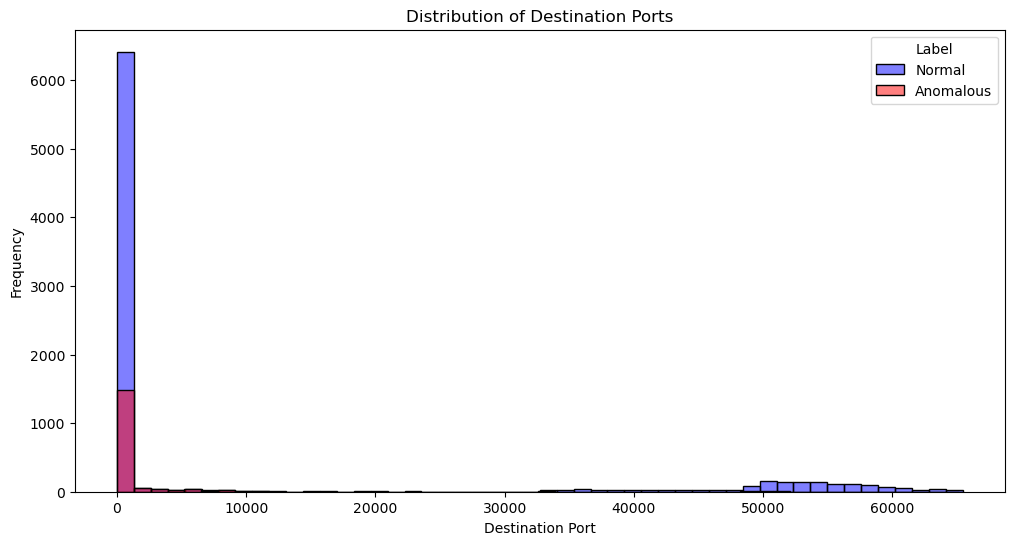

In [32]:
destination_ports_normal = df_copy[df_copy["Label"] == 0]["Destination Port"]
destination_ports_anomalous = df_copy[df_copy["Label"] == 1]["Destination Port"]

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the histograms
sns.histplot(destination_ports_normal, bins=50, label="Normal", color="blue", alpha=0.5)
sns.histplot(destination_ports_anomalous, bins=50, label="Anomalous", color="red", alpha=0.5)

# Set plot labels and title
plt.xlabel("Destination Port")
plt.ylabel("Frequency")
plt.title("Distribution of Destination Ports")
# Show the plot
plt.legend(title="Label", labels=["Normal", "Anomalous"])
plt.show()

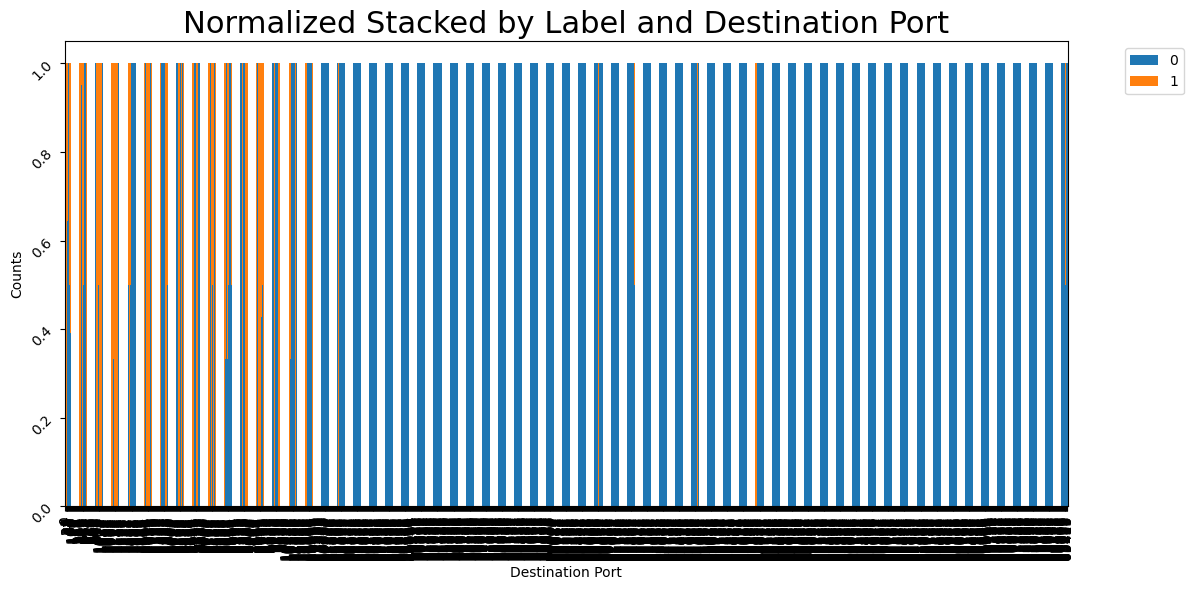

In [33]:
# df2 = df_copy.groupby('Destination Port')['Label'].value_counts(normalize=True).unstack('Label')
df2 = df_copy.groupby('Destination Port')['Label'].value_counts(normalize=True).unstack()

# Create a subplot with custom size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the normalized stacked bar chart
df2.plot.bar(stacked=True, ax=ax, rot=0)

# Add a legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
plt.ylabel('Counts')
# plt.xlabel('Counts')
# plt.ylabel('Destination Port')
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.title('Normalized Stacked by Label and Destination Port', fontsize=22)



# Show the plot
plt.tight_layout()  # Adjust spacing
plt.show()

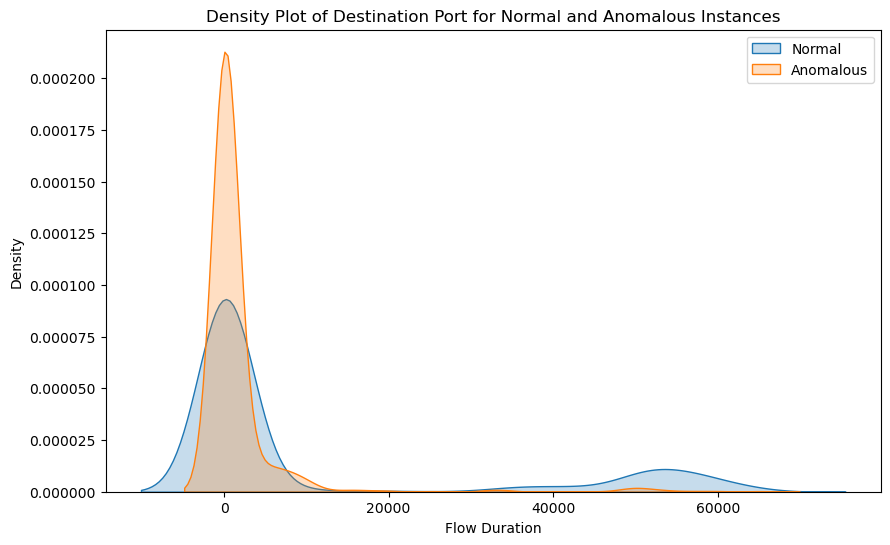

In [34]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_copy[df_copy['Label'] == 0]['Destination Port'], label='Normal', shade=True)
sns.kdeplot(data=df_copy[df_copy['Label'] == 1]['Destination Port'], label='Anomalous', shade=True)
plt.xlabel('Flow Duration')
plt.ylabel('Density')
plt.title('Density Plot of Destination Port for Normal and Anomalous Instances')
plt.legend()

plt.show()

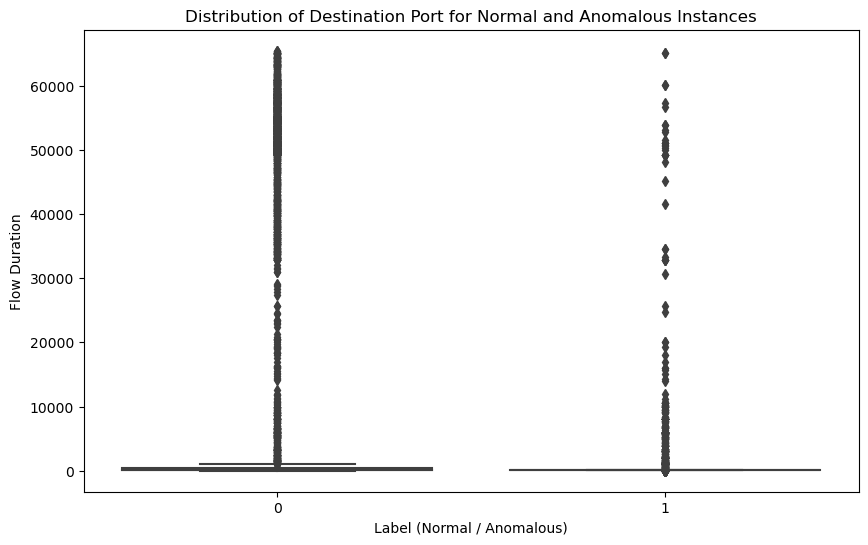

In [37]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Label', y='Destination Port')
plt.xlabel('Label (Normal / Anomalous)')
plt.ylabel('Flow Duration')
plt.title('Distribution of Destination Port for Normal and Anomalous Instances')

plt.show()

In [36]:
DescribeFloatSkewKurt(df,'Destination Port')

--------------------------------------------------
Destination Port -> min :  0
Destination Port -> max :  65430
Destination Port -> mean :  8782.8235
Destination Port -> std  :  19086.042865973017
Destination Port -> skew :  1.9073312933497621
Destination Port -> kurt :  1.8204387999223872
--------------------------------------------------


- The **skewness** value of 1.9 suggest that the distribution of **Destination Port** is positively skewed.
  - This means that the tail of the distribution is longer on the right side.
- The **kurtosis** value of 1.8 indicates that the distribution has more weight in the tails compared to a normal distribution.
  - This suggests that extreme values are relatively more common than in a normal distribution.
- **Potential Outliers? : No!** 
  - The kurtosis < 3 might indicate the lack of outliers values in the **Destination Port** feature.
- Normalization Consideration ?
  - Possible !

In [38]:
DescribeFloatSkewKurt(df,'Flow Duration')

--------------------------------------------------
Flow Duration -> min :  0
Flow Duration -> max :  119984027
Flow Duration -> mean :  16629282.1037
Flow Duration -> std  :  35058418.84465692
Flow Duration -> skew :  1.9512971919724231
Flow Duration -> kurt :  2.1616244640812825
--------------------------------------------------


- The **skewness** value of 1.95 suggest that the distribution of **Flow Duration** is positively skewed.
  - This means that the tail of the distribution is longer on the right side.
- The **kurtosis** value of 2.16 indicates that the distribution has more weight in the tails compared to a normal distribution.
  - This suggests that extreme values are relatively more common than in a normal distribution.
- **Potential Outliers? : No!**
  - The kurtosis < 3 indicate the lack of outliers values in the **Flow Duration** feature.
- Normalization Consideration ?
  - Possible !

In [39]:
DescribeFloatSkewKurt(df,'Total Fwd Packets')

--------------------------------------------------
Total Fwd Packets -> min :  1
Total Fwd Packets -> max :  7136
Total Fwd Packets -> mean :  7.9323
Total Fwd Packets -> std  :  89.45577855403454
Total Fwd Packets -> skew :  63.797788676899295
Total Fwd Packets -> kurt :  4635.1005504187715
--------------------------------------------------


- The **skewness** value of 63.7 suggest that the distribution of **Total Fwd Packets** is positively skewed.
  - This means that the tail of the distribution is longer on the right side.
- The **kurtosis** value of 4635 indicates that the distribution has more weight in the tails compared to a normal distribution.
  - This suggests that extreme values are relatively more common than in a normal distribution.
- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Total Fwd Packets** feature.
- Normalization Consideration ?
  - Possible !

In [40]:
DescribeFloatSkewKurt(df,'Total Length of Fwd Packets')

--------------------------------------------------
Total Length of Fwd Packets -> min :  0
Total Length of Fwd Packets -> max :  132750
Total Length of Fwd Packets -> mean :  580.1406
Total Length of Fwd Packets -> std  :  2863.197521798238
Total Length of Fwd Packets -> skew :  20.120169906874988
Total Length of Fwd Packets -> kurt :  671.1003816502256
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Total Length of Fwd Packets** feature.

In [41]:
DescribeFloatSkewKurt(df,'Fwd Packet Length Max')

--------------------------------------------------
Fwd Packet Length Max -> min :  0
Fwd Packet Length Max -> max :  11595
Fwd Packet Length Max -> mean :  230.6176
Fwd Packet Length Max -> std  :  730.1590725110839
Fwd Packet Length Max -> skew :  8.669712406009955
Fwd Packet Length Max -> kurt :  96.86068154955657
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd Packet Length Max** feature.

In [42]:
DescribeFloatSkewKurt(df,'Fwd Packet Length Min')

--------------------------------------------------
Fwd Packet Length Min -> min :  0
Fwd Packet Length Min -> max :  1472
Fwd Packet Length Min -> mean :  17.2966
Fwd Packet Length Min -> std  :  41.03552641846178
Fwd Packet Length Min -> skew :  22.60517789416046
Fwd Packet Length Min -> kurt :  742.161649725367
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd Packet Length Min** feature.

In [43]:
DescribeFloatSkewKurt(df,'Fwd Packet Length Mean')

--------------------------------------------------
Fwd Packet Length Mean -> min :  0.0
Fwd Packet Length Mean -> max :  2900.0
Fwd Packet Length Mean -> mean :  61.626185850000006
Fwd Packet Length Mean -> std  :  184.70627232060704
Fwd Packet Length Mean -> skew :  8.650684984786112
Fwd Packet Length Mean -> kurt :  83.403703452011
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd Packet Length Mean** feature.

In [44]:
DescribeFloatSkewKurt(df,'Bwd Packet Length Max')

--------------------------------------------------
Bwd Packet Length Max -> min :  0
Bwd Packet Length Max -> max :  11632
Bwd Packet Length Max -> mean :  992.0849
Bwd Packet Length Max -> std  :  2057.1333525301425
Bwd Packet Length Max -> skew :  2.6578966918933964
Bwd Packet Length Max -> kurt :  7.056356961997059
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd Packet Length Max** feature.

In [45]:
DescribeFloatSkewKurt(df,'Bwd Packet Length Min')

--------------------------------------------------
Bwd Packet Length Min -> min :  0
Bwd Packet Length Min -> max :  1460
Bwd Packet Length Min -> mean :  41.8143
Bwd Packet Length Min -> std  :  68.95362510781898
Bwd Packet Length Min -> skew :  4.540261413279606
Bwd Packet Length Min -> kurt :  67.30446473593919
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd Packet Length Min** feature.

- **Flow Duration Analysis**:
  - What is the typical duration of a connection?
  - Are there connections with unusually long or short durations that might indicate anomalies?
  - How do flow durations differ between normal and anomalous instances?

In [46]:
DescribeFloatSkewKurt(df,'Flow Bytes/s')

--------------------------------------------------
Flow Bytes/s -> min :  0.0
Flow Bytes/s -> max :  1040000000.0
Flow Bytes/s -> mean :  1476732.1548925876
Flow Bytes/s -> std  :  23448429.13097242
Flow Bytes/s -> skew :  nan
Flow Bytes/s -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [47]:
df_copy0 = df.copy()
typical_duration = df_copy0["Flow Duration"].mean()

print("Typical Duration of Connection:", typical_duration, "seconds")

Typical Duration of Connection: 16629282.1037 seconds


In [48]:
from scipy import stats

column_data = df_copy0["Flow Duration"]

# Perform Shapiro-Wilk test
stat, p_value = stats.shapiro(column_data)

# Check p-value to determine normality
alpha = 0.05
if p_value > alpha:
    print("Flow Duration data follows a normal distribution\nThen we can use Z-Score Method")
else:
    print("Flow Duration data does not follow a normal distribution\nThen we can not use Z-Score Method")

Flow Duration data does not follow a normal distribution
Then we can not use Z-Score Method


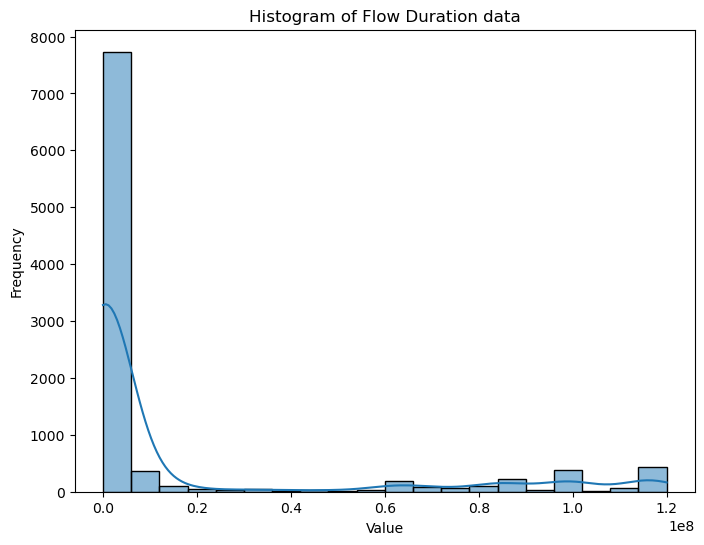

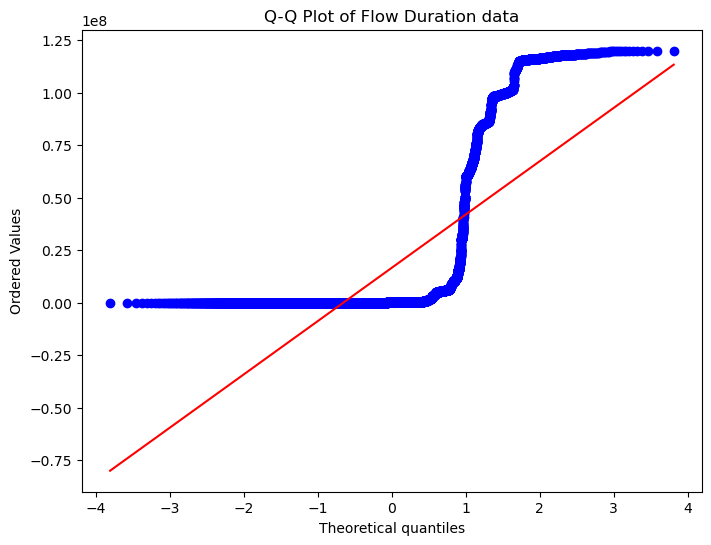

In [49]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(column_data, bins=20, kde=True)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Flow Duration data")

# Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(column_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Flow Duration data")

plt.show()

- The points does not lie approximately along a straight line, then the data does not follows a normal distribution.

In [50]:
data_duration = df_copy0["Flow Duration"]
data_bytes = df_copy0["Flow Bytes/s"].fillna(df_copy0["Flow Bytes/s"].median())

# Calculate Pearson's correlation coefficient
corr_coef, p_val = stats.pearsonr(data_duration, data_bytes)

# Check the p-value to determine significance
if p_val < 0.05:
    print("There is a significant linear relationship between Flow Duration and Flow Bytes/s.\n\
    That's means there is some form of association or dependence between the variables: variables are not independent.")
else:
    print("There is no significant linear relationship between Flow Duration and Flow Bytes/s: variables are independent.")

There is a significant linear relationship between Flow Duration and Flow Bytes/s.
    That's means there is some form of association or dependence between the variables: variables are not independent.


In [51]:
data_duration = df_copy0["Flow Duration"]
data_packets = df_copy0["Flow Packets/s"].fillna(df_copy0["Flow Packets/s"].median())

# Calculate Pearson's correlation coefficient
corr_coef, p_val = stats.pearsonr(data_duration, data_packets)

# Check the p-value to determine significance
if p_val < 0.05:
    print("There is a significant linear relationship between Flow Duration and Flow Packets/s.\n\
    That's means there is some form of association or dependence between the variables: variables are not independent.")
else:
    print("There is no significant linear relationship between Flow Duration and Packets/s: variables are independent.")

There is a significant linear relationship between Flow Duration and Flow Packets/s.
    That's means there is some form of association or dependence between the variables: variables are not independent.


In [52]:
# Calculate percentiles
percentile_5 = column_data.quantile(0.05)
percentile_95 = column_data.quantile(0.95)

print("5th Percentile:", percentile_5)
print("95th Percentile:", percentile_95)

# Identify very short and very long durations
very_short_durations = column_data[column_data < percentile_5]
very_long_durations = column_data[column_data > percentile_95]

5th Percentile: 14.0
95th Percentile: 102997493.99999967


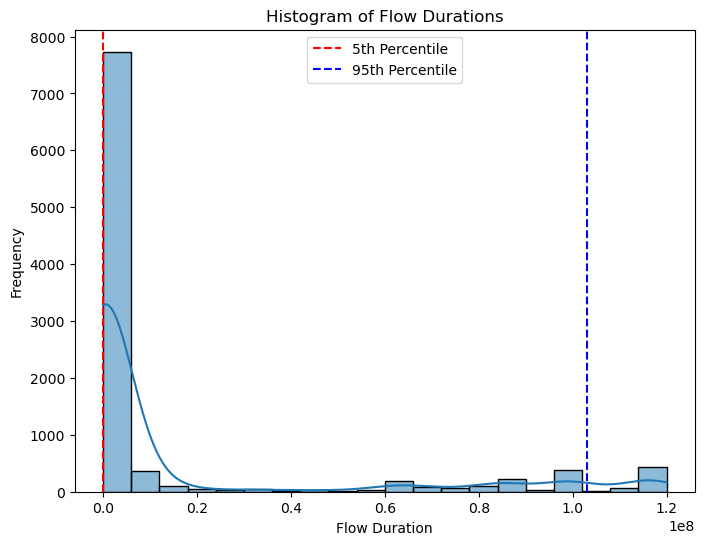

In [53]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(column_data, bins=20, kde=True)
plt.axvline(x=percentile_5, color='red', linestyle='--', label='5th Percentile')
plt.axvline(x=percentile_95, color='blue', linestyle='--', label='95th Percentile')
plt.xlabel("Flow Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Flow Durations")
plt.legend()
plt.show()

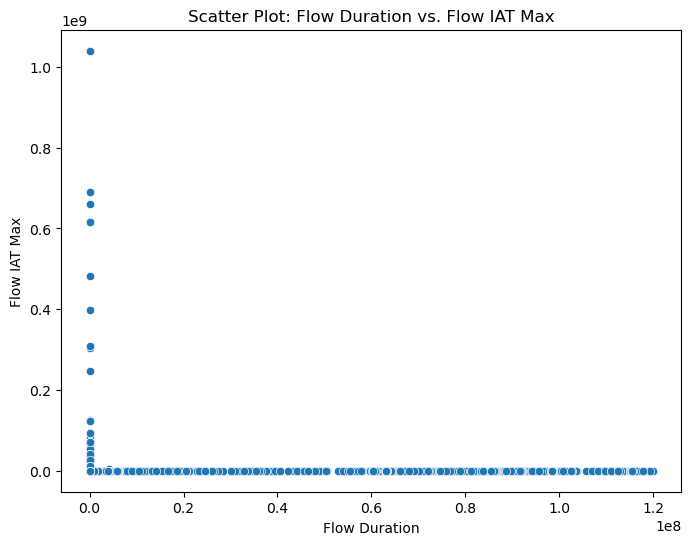

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x="Flow Duration", y="Flow Bytes/s")
plt.xlabel("Flow Duration")
plt.ylabel("Flow IAT Max")
plt.title("Scatter Plot: Flow Duration vs. Flow IAT Max")
plt.show()

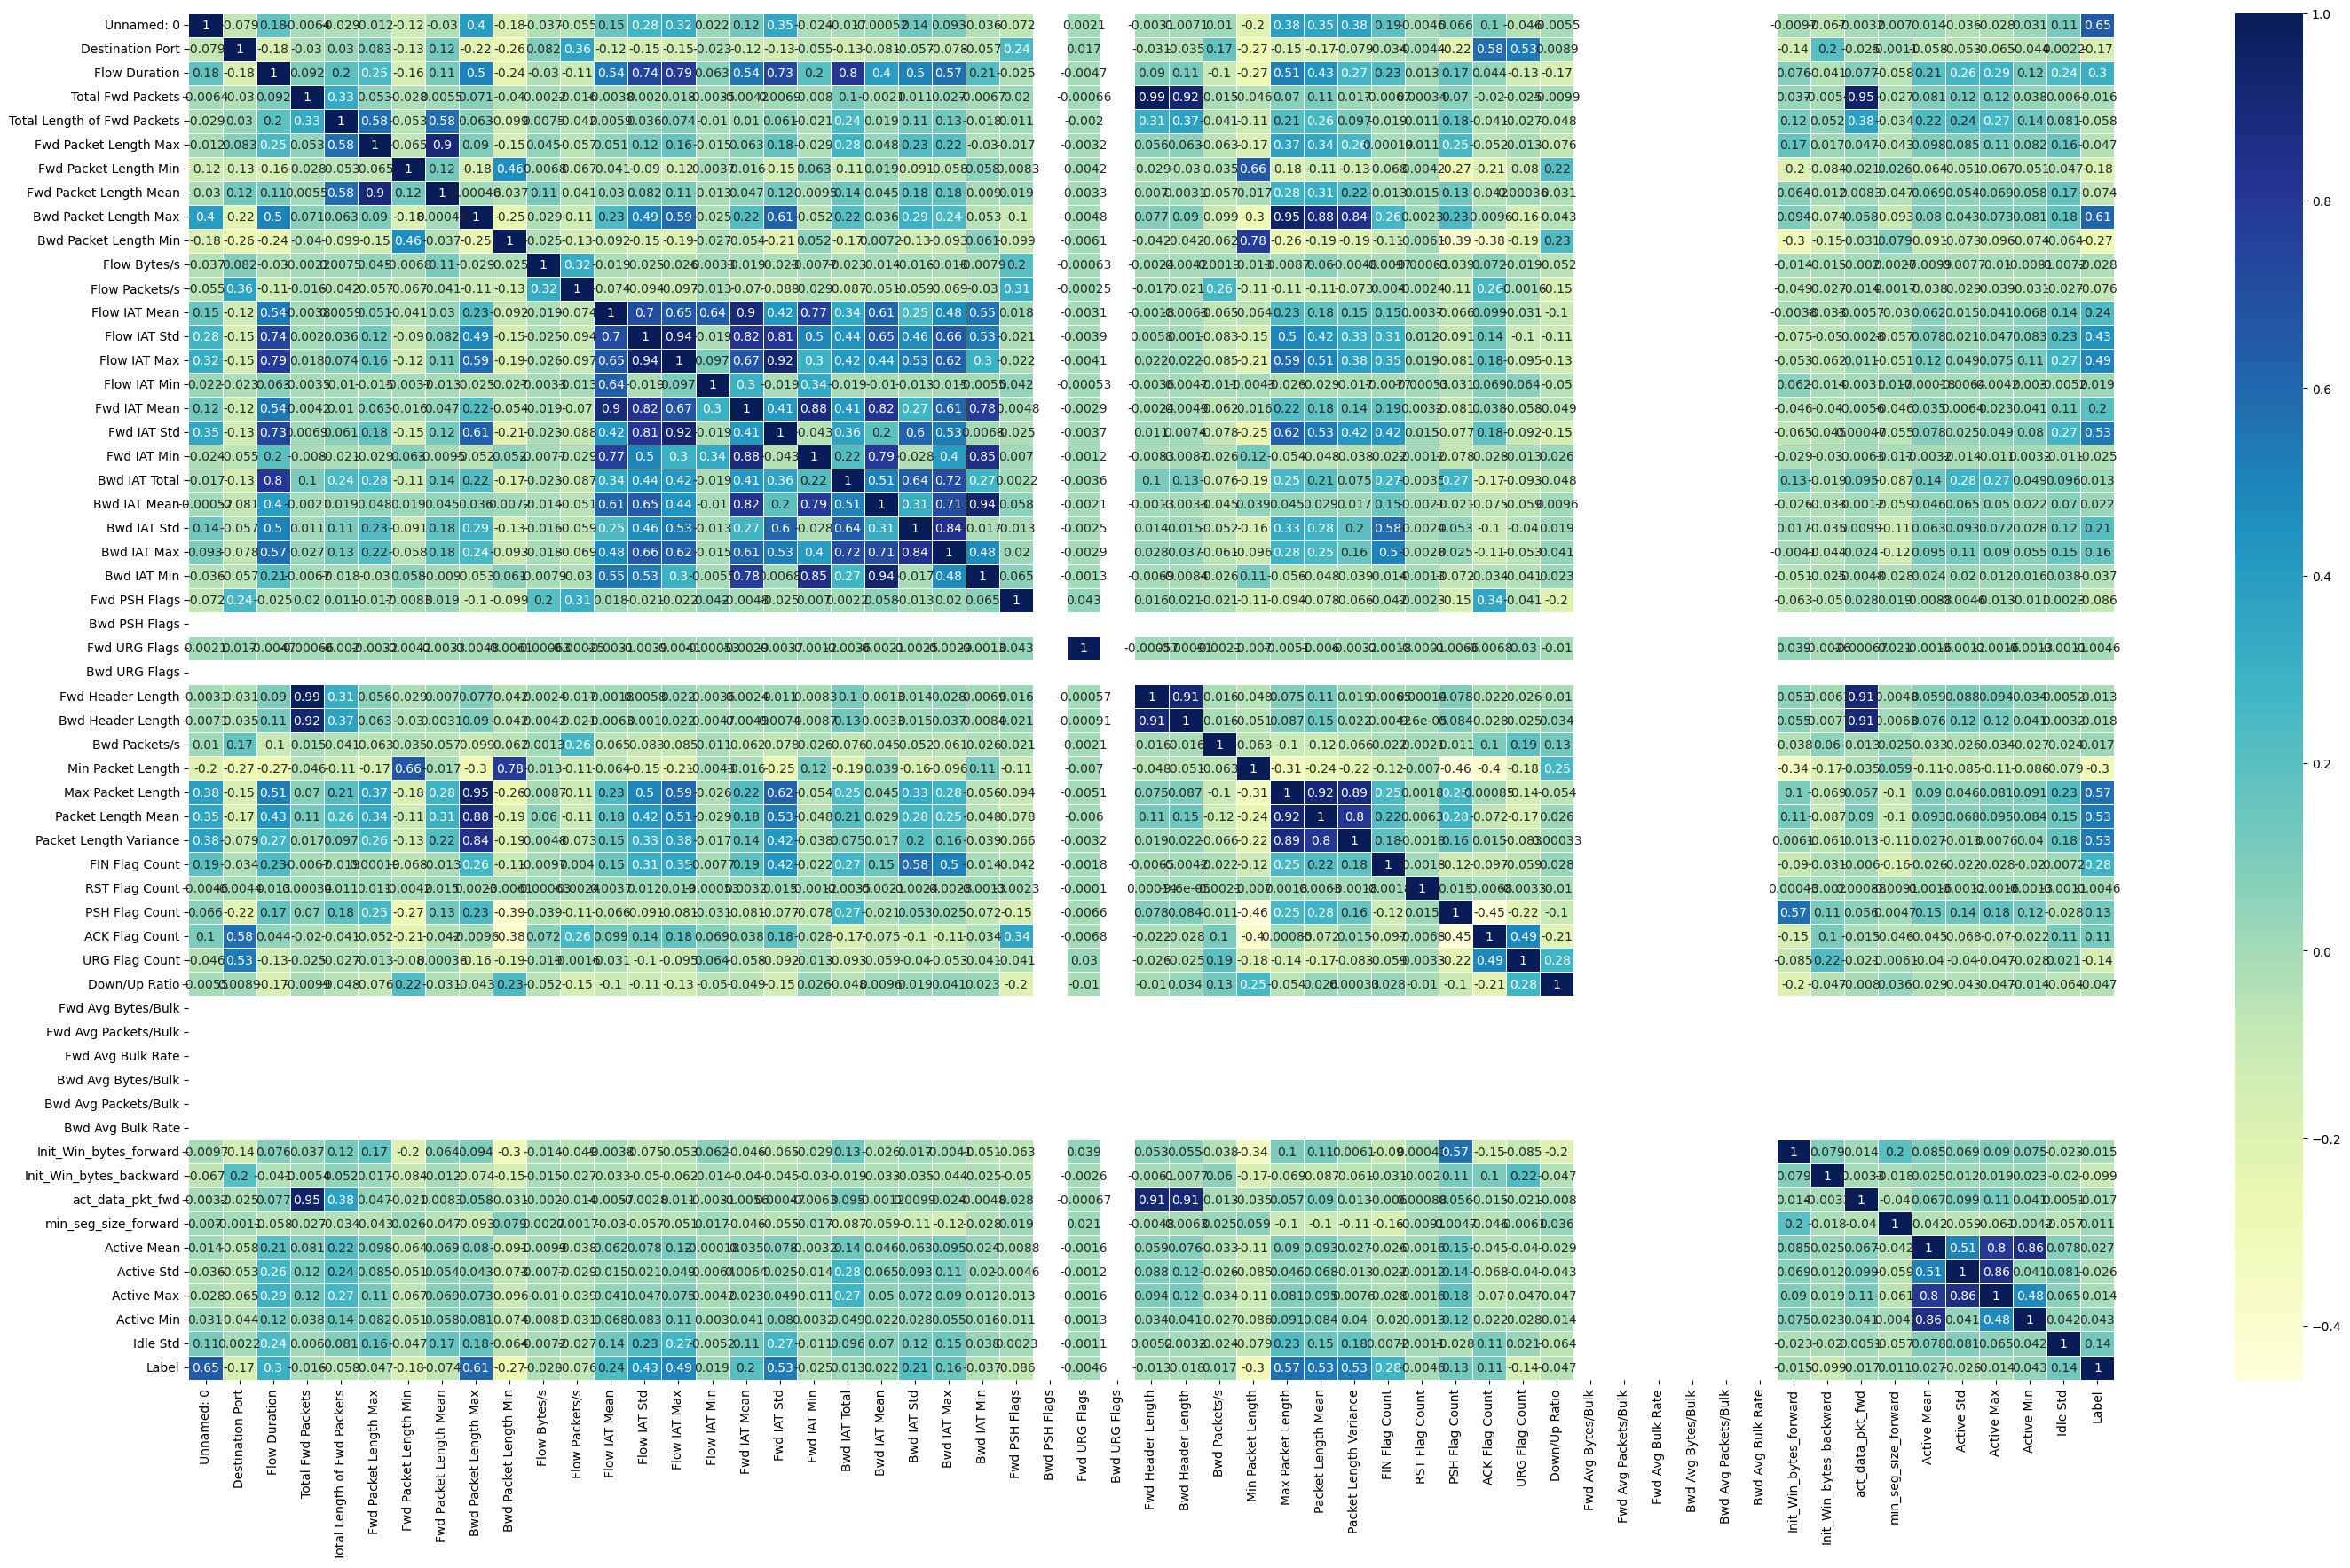

In [55]:
fig, ax = plt.subplots(figsize=(35,20))       
sns.heatmap(df_copy.corr(), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax);

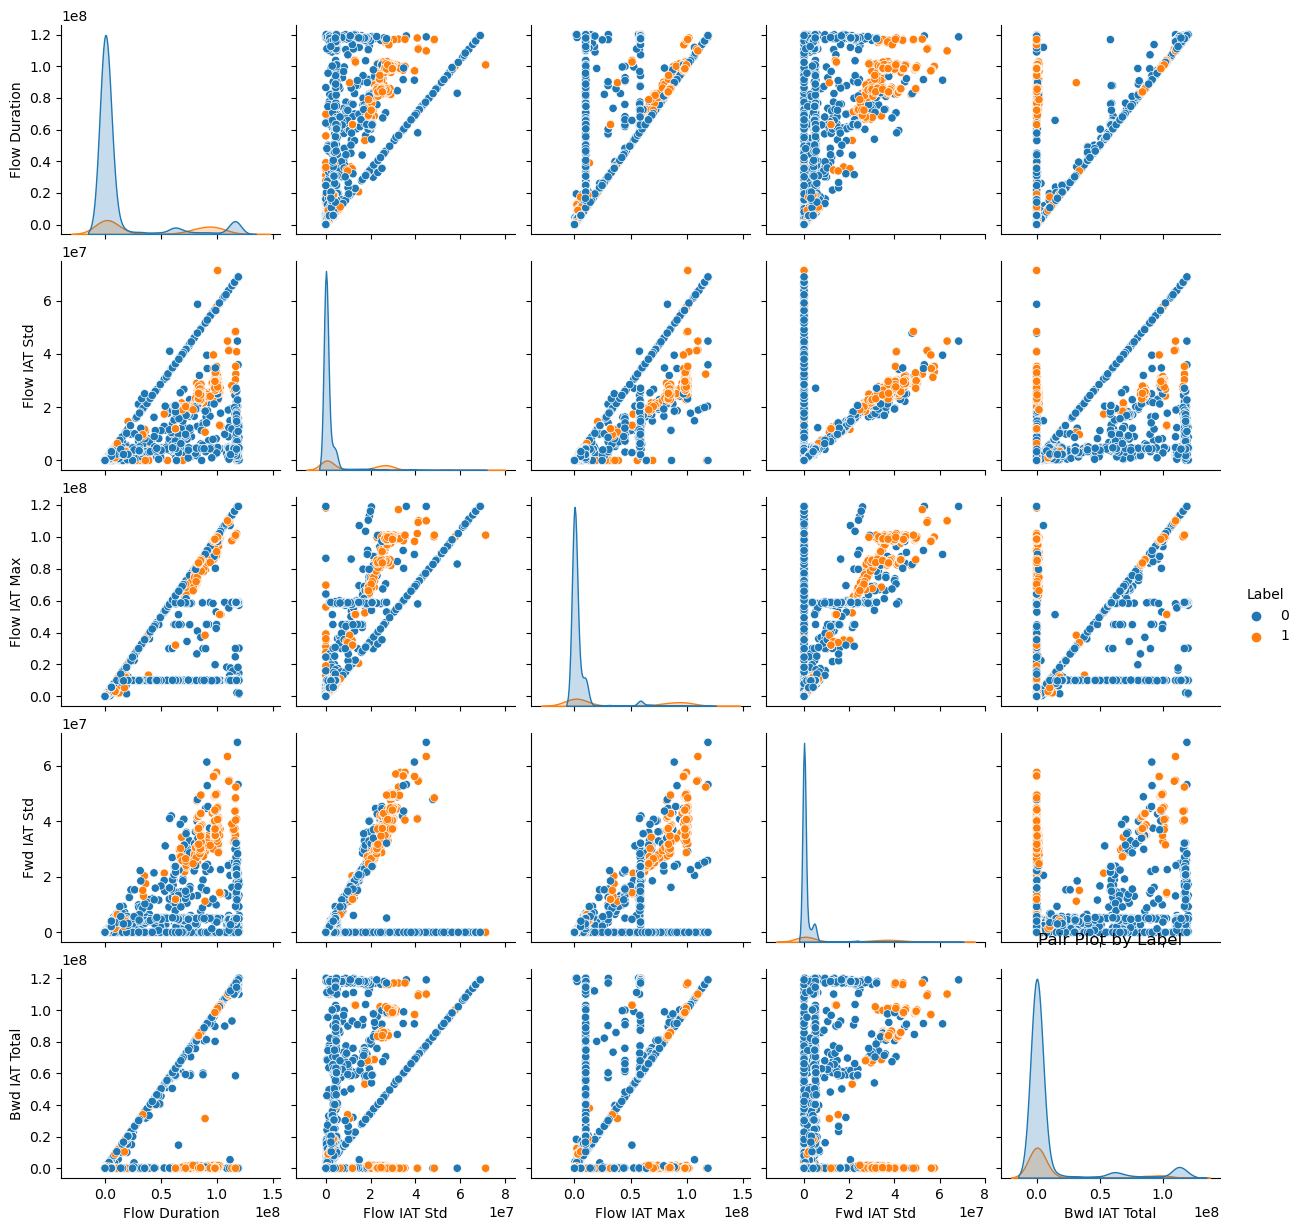

In [56]:
sns.pairplot(data=df_copy, hue="Label", vars=["Flow Duration", "Flow IAT Std", "Flow IAT Max", "Fwd IAT Std", "Bwd IAT Total"])
plt.title("Pair Plot by Label")
plt.show()

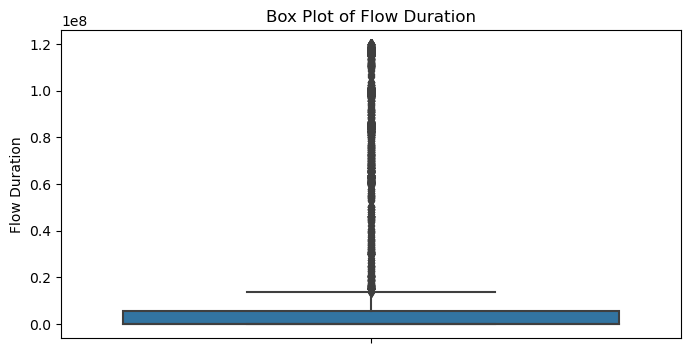

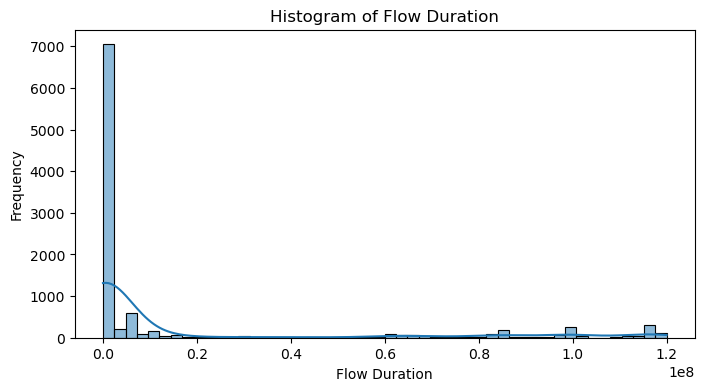

In [57]:
flow_durations = df_copy["Flow Duration"]

# Calculate IQR for the "Flow Duration" feature
Q1 = flow_durations.quantile(0.25)
Q3 = flow_durations.quantile(0.75)
IQR = Q3 - Q1

# Identify connections with extreme durations based on IQR
outliers_iqr = df_copy[(flow_durations < Q1 - 1.5 * IQR) | (flow_durations > Q3 + 1.5 * IQR)]

# Create a box plot to visualize flow duration distribution
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_copy, y="Flow Duration")
plt.ylabel("Flow Duration")
plt.title("Box Plot of Flow Duration")
plt.show()

# Create a histogram to visualize flow duration distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df_copy, x="Flow Duration", bins=50, kde=True)
plt.xlabel("Flow Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Flow Duration")
plt.show()


In [58]:
outliers_iqr.head()

Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
7      1008376                53       67005073                  2   
9      2295399                80       99466733                  8   
16     2198892                80      101000306                  2   
17     2311323                80       85620087                  6   
18      487219               443      110533413                 34   

    Total Length of Fwd Packets  Fwd Packet Length Max  Fwd Packet Length Min  \
7                            92                     49                     43   
9                           375                    363                      0   
16                           16                      8                      8   
17                          403                    385                      0   
18                         4307                   1366                      0   

    Fwd Packet Length Mean  Bwd Packet Length Max  Bwd Packet Length Min  ...  \
7                    46.00                    161                    149  ...   
9                    46.88                   8688                      0  ...   
16                    8.00                      0                      0  ...   
17                   67.20                   8688                      0  ...   
18                  126.70                   1418                      0  ...   

    Init_Win_bytes_forward  Init_Win_bytes_backward  act_data_pkt_fwd  \
7                       -1                       -1                 1   
9                      251                      235                 3   
16                     229                      235                 1   
17                       0                      235                 3   
18                     398                      591                16   

    min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
7                     20      60660.0       0.000       60660       60660   
9                     20       1003.0       0.000        1003        1003   
16                    32         50.0       0.000          50          50   
17                    20       2031.0       0.000        2031        2031   
18                    32     104865.5   35962.742      130295       79436   

     Idle Std  Label  
7         0.0      0  
9         0.0      1  
16        0.0      1  
17        0.0      1  
18  5795716.0      0  

[5 rows x 57 columns]

- Are there connections with unusually long or short durations that might indicate anomalies?
  - Yes!
  - **Analysis**:
    - very short durations might indicate port scanning or probing, while very long durations might suggest a stalled connection or a potential attack

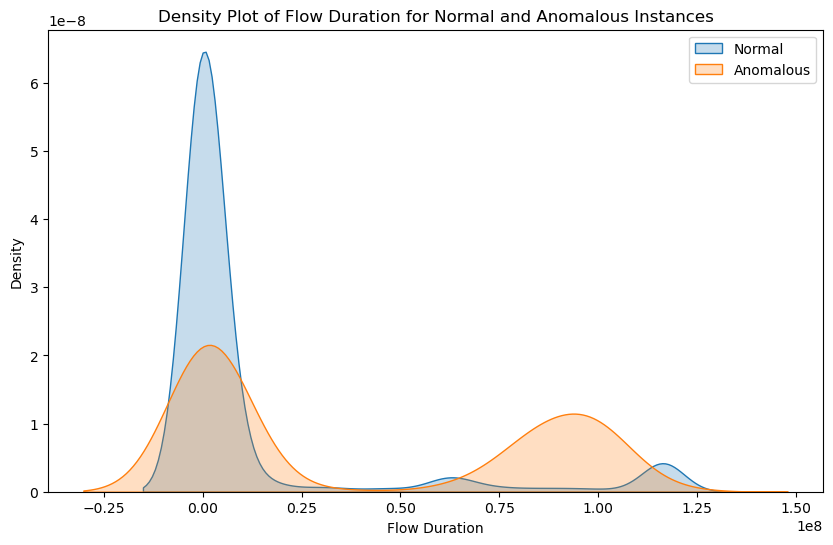

In [59]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Label'] == 0]['Flow Duration'], label='Normal', shade=True)
sns.kdeplot(data=df[df['Label'] == 1]['Flow Duration'], label='Anomalous', shade=True)
plt.xlabel('Flow Duration')
plt.ylabel('Density')
plt.title('Density Plot of Flow Duration for Normal and Anomalous Instances')
plt.legend()

plt.show()

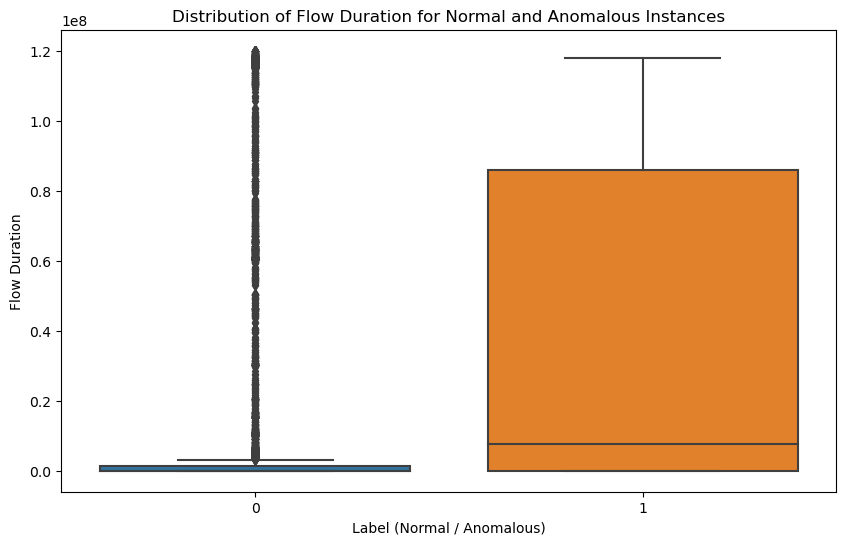

In [60]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Label', y='Flow Duration')
plt.xlabel('Label (Normal / Anomalous)')
plt.ylabel('Flow Duration')
plt.title('Distribution of Flow Duration for Normal and Anomalous Instances')

plt.show()

In [61]:
DescribeFloatSkewKurt(df,'Flow Packets/s')

--------------------------------------------------
Flow Packets/s -> min :  0.016748648
Flow Packets/s -> max :  3000000.0
Flow Packets/s -> mean :  46542.75427651055
Flow Packets/s -> std  :  194568.91974039082
Flow Packets/s -> skew :  nan
Flow Packets/s -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

### Analysis questions:
- Inter Arrival Times:
  - What is the mean inter-arrival time for packets in the flows?
  - How do the mean forward and backward inter-arrival times differ?
  - Are there patterns in inter-arrival times that indicate regular or irregular traffic?

In [62]:
DescribeFloatSkewKurt(df,'Flow IAT Mean')

--------------------------------------------------
Flow IAT Mean -> min :  0.0
Flow IAT Mean -> max :  119000000.0
Flow IAT Mean -> mean :  1441493.4838143287
Flow IAT Mean -> std  :  4675231.219869049
Flow IAT Mean -> skew :  9.271094279538085
Flow IAT Mean -> kurt :  141.94246136884436
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Flow IAT Mean** feature.

In [63]:
mean_iat = df_copy["Flow IAT Mean"].mean()

print("Mean Inter-Arrival Time:", mean_iat)

Mean Inter-Arrival Time: 1441493.4838143287


In [64]:
# Calculate the mean inter-arrival time for normal instances
mean_iat_normal = df_copy[df_copy["Label"] == 0]["Flow IAT Mean"].mean()

# Calculate the mean inter-arrival time for anomalous instances
mean_iat_anomalous = df_copy[df_copy["Label"] == 1]["Flow IAT Mean"].mean()

print("Mean Inter-Arrival Time (Normal):", mean_iat_normal)
print("Mean Inter-Arrival Time (Anomalous):", mean_iat_anomalous)

Mean Inter-Arrival Time (Normal): 936958.9342276808
Mean Inter-Arrival Time (Anomalous): 3839919.518730834


Mean Forward IAT: 2879788.0035643554
Mean Backward IAT: 2023226.7924353282


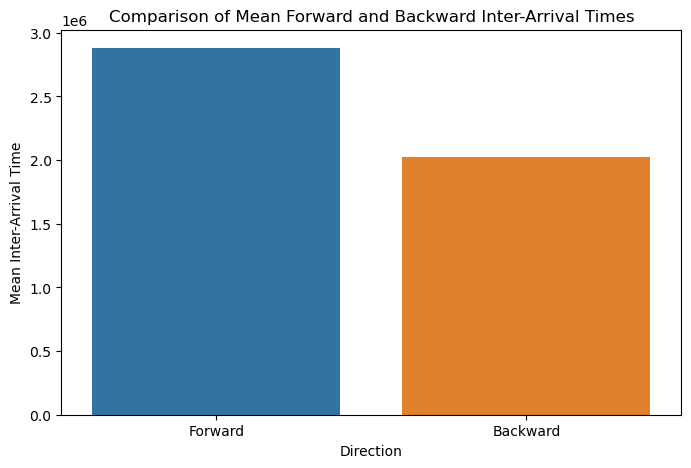

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean IAT for forward direction
mean_fwd_iat = df_copy["Fwd IAT Mean"].mean()

# Calculate the mean IAT for backward direction
mean_bwd_iat = df_copy["Bwd IAT Mean"].mean()

print("Mean Forward IAT:", mean_fwd_iat)
print("Mean Backward IAT:", mean_bwd_iat)

# Create a bar plot to visualize the mean IAT for forward and backward directions
plt.figure(figsize=(8, 5))

sns.barplot(x=["Forward", "Backward"], y=[mean_fwd_iat, mean_bwd_iat])
plt.xlabel("Direction")
plt.ylabel("Mean Inter-Arrival Time")
plt.title("Comparison of Mean Forward and Backward Inter-Arrival Times")

plt.show()

- **Comportement normal possible** : Le temps d'arrivée moyen vers l'avant est nettement supérieur au temps d'arrivée moyen vers l'arrière, ce qui pourrait indiquer que la majorité du trafic circule vers l'avant (trafic sortant). Il peut s'agir d'un comportement normal dans de nombreux scénarios, tels que la navigation sur le web, les téléchargements de fichiers, etc.
- **_Anomalie possible_** : La différence est importante et persistante, ce qui peut également suggérer des problèmes potentiels, tels que des retards dans les réponses du serveur, une congestion du réseau ou d'autres anomalies qui entraînent un retard important dans le sens direct.

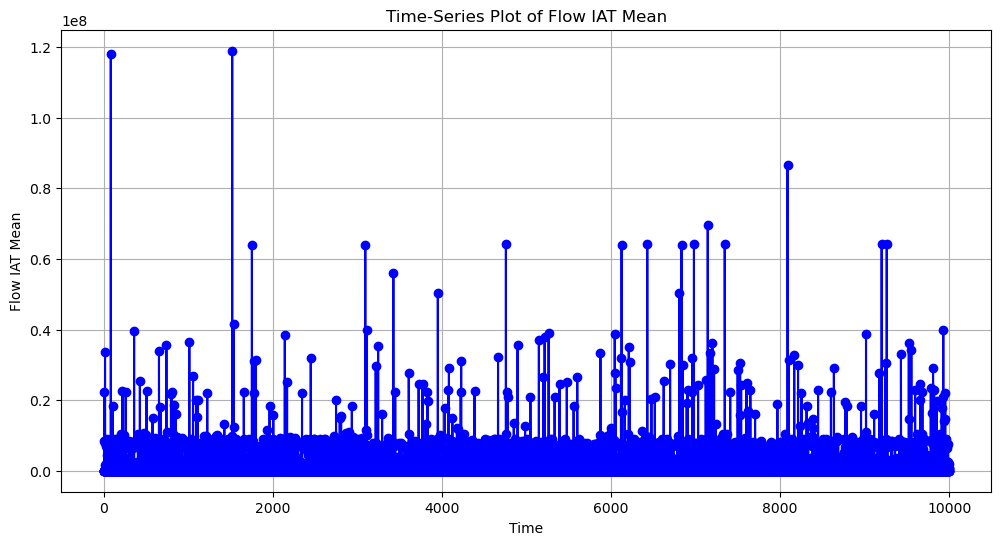

In [66]:
# Plotting the time-series of Flow IAT Mean
plt.figure(figsize=(12, 6))
plt.plot(df_copy["Flow IAT Mean"], marker='o', linestyle='-', color='b')
plt.xlabel("Time")
plt.ylabel("Flow IAT Mean")
plt.title("Time-Series Plot of Flow IAT Mean")
plt.grid(True)
plt.show()

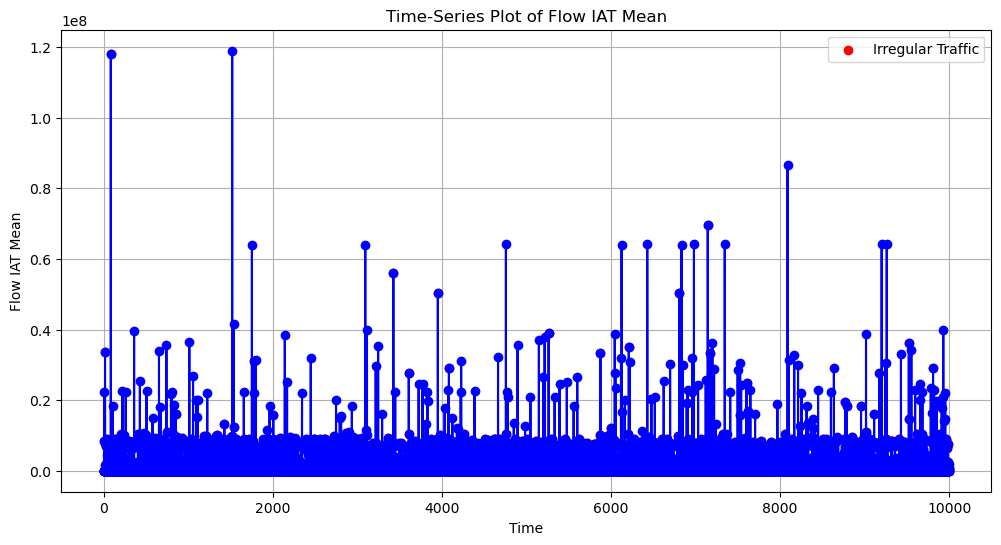

In [67]:
irregular_traffic_mask = df_copy["Label"] == 1  # Assuming '1' represents anomalous/irregular traffic

# Plotting the time-series of Flow IAT Mean
plt.figure(figsize=(12, 6))
plt.plot(df_copy["Flow IAT Mean"], marker='o', linestyle='-', color='b')

# Highlight irregular traffic in red
plt.scatter(df_copy.index[irregular_traffic_mask], df_copy["Flow IAT Mean"][irregular_traffic_mask], color='r', label='Irregular Traffic')

plt.xlabel("Time")
plt.ylabel("Flow IAT Mean")
plt.title("Time-Series Plot of Flow IAT Mean")
plt.grid(True)
plt.legend()
plt.show()

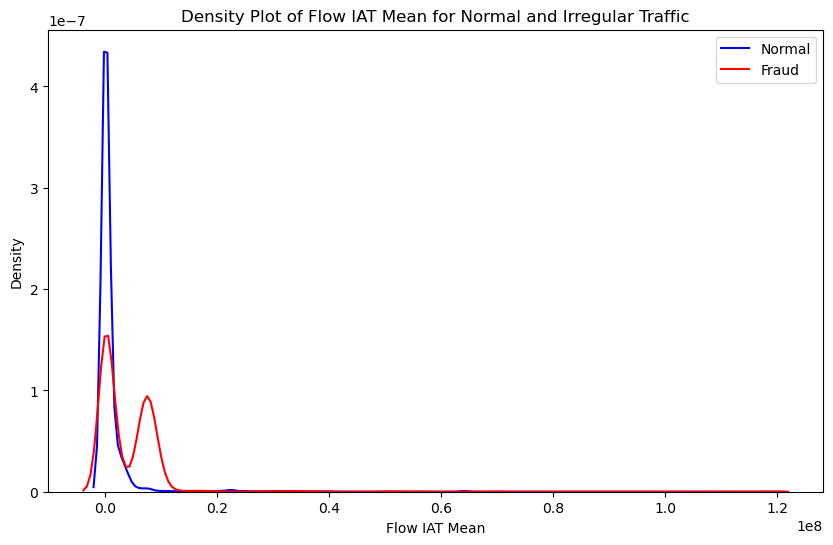

In [69]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a density plot of Flow IAT Mean for normal traffic
sns.kdeplot(data=df_copy[df_copy["Label"] == 0], x="Flow IAT Mean", color='blue', label='Normal')

# Create a density plot of Flow IAT Mean for irregular traffic
sns.kdeplot(data=df_copy[df_copy["Label"] == 1], x="Flow IAT Mean", color='red', label='Fraud')

# Add labels and title
plt.xlabel("Flow IAT Mean")
plt.ylabel("Density")
plt.title("Density Plot of Flow IAT Mean for Normal and Irregular Traffic")
plt.legend()

plt.show()

In [70]:
DescribeFloatSkewKurt(df,'Flow IAT Std')

--------------------------------------------------
Flow IAT Std -> min :  0.0
Flow IAT Std -> max :  71300000.0
Flow IAT Std -> mean :  3340804.415019575
Flow IAT Std -> std  :  8478788.198301176
Flow IAT Std -> skew :  3.240817561855555
Flow IAT Std -> kurt :  11.68108353264739
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Flow IAT std** feature.

In [71]:
DescribeFloatSkewKurt(df,'Flow IAT Max')

--------------------------------------------------
Flow IAT Max -> min :  0
Flow IAT Max -> max :  119000000
Flow IAT Max -> mean :  10552107.7892
Flow IAT Max -> std  :  25995150.09248177
Flow IAT Max -> skew :  2.6329144345399236
Flow IAT Max -> kurt :  5.457940607489396
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Flow IAT Max** feature.

In [72]:
DescribeFloatSkewKurt(df,'Flow IAT Min')

--------------------------------------------------
Flow IAT Min -> min :  -1
Flow IAT Min -> max :  119000000
Flow IAT Min -> mean :  160382.2809
Flow IAT Min -> std  :  3048428.3622757555
Flow IAT Min -> skew :  25.86506375781135
Flow IAT Min -> kurt :  756.4737488014598
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Flow IAT Min** feature.

In [73]:
DescribeFloatSkewKurt(df,'Fwd IAT Mean')

--------------------------------------------------
Fwd IAT Mean -> min :  0.0
Fwd IAT Mean -> max :  119000000.0
Fwd IAT Mean -> mean :  2879788.0035643554
Fwd IAT Mean -> std  :  9806708.203501977
Fwd IAT Mean -> skew :  6.763753580096062
Fwd IAT Mean -> kurt :  56.65682055205997
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd IAT Mean** feature.

In [74]:
DescribeFloatSkewKurt(df,'Fwd IAT Std')

--------------------------------------------------
Fwd IAT Std -> min :  0.0
Fwd IAT Std -> max :  68400000.0
Fwd IAT Std -> mean :  3764527.980328353
Fwd IAT Std -> std  :  10183379.985638414
Fwd IAT Std -> skew :  3.0585115921773487
Fwd IAT Std -> kurt :  8.303000558475587
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd IAT Std** feature.

In [75]:
DescribeFloatSkewKurt(df,'Fwd IAT Min')

--------------------------------------------------
Fwd IAT Min -> min :  0
Fwd IAT Min -> max :  119000000
Fwd IAT Min -> mean :  1079852.7851
Fwd IAT Min -> std  :  8877314.019270778
Fwd IAT Min -> skew :  9.343069261161547
Fwd IAT Min -> kurt :  92.2757592609619
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd IAT Min** feature.

In [76]:
DescribeFloatSkewKurt(df,'Bwd IAT Total')

--------------------------------------------------
Bwd IAT Total -> min :  0
Bwd IAT Total -> max :  120000000
Bwd IAT Total -> mean :  10758163.531
Bwd IAT Total -> std  :  29606579.701817736
Bwd IAT Total -> skew :  2.7220887248464143
Bwd IAT Total -> kurt :  5.906527873493214
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd IAT Total** feature.

In [77]:
DescribeFloatSkewKurt(df,'Bwd IAT Mean')

--------------------------------------------------
Bwd IAT Mean -> min :  0.0
Bwd IAT Mean -> max :  119000000.0
Bwd IAT Mean -> mean :  2023226.7924353282
Bwd IAT Mean -> std  :  9439491.075668847
Bwd IAT Mean -> skew :  7.607105489228551
Bwd IAT Mean -> kurt :  66.0444100051408
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd IAT Mean** feature.

In [78]:
DescribeFloatSkewKurt(df,'Bwd IAT Std')

--------------------------------------------------
Bwd IAT Std -> min :  0.0
Bwd IAT Std -> max :  77700000.0
Bwd IAT Std -> mean :  1618451.6872612147
Bwd IAT Std -> std  :  6538660.037736339
Bwd IAT Std -> skew :  5.531468662690496
Bwd IAT Std -> kurt :  33.64064394192627
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd IAT Std** feature.

In [79]:
DescribeFloatSkewKurt(df,'Bwd IAT Max')

--------------------------------------------------
Bwd IAT Max -> min :  0
Bwd IAT Max -> max :  119000000
Bwd IAT Max -> mean :  5149227.5257
Bwd IAT Max -> std  :  17854001.60194811
Bwd IAT Max -> skew :  4.192950504909431
Bwd IAT Max -> kurt :  17.192932241092645
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd IAT Max** feature.

In [80]:
DescribeFloatSkewKurt(df,'Bwd IAT Min')

--------------------------------------------------
Bwd IAT Min -> min :  0
Bwd IAT Min -> max :  119000000
Bwd IAT Min -> mean :  1111304.6364
Bwd IAT Min -> std  :  8880586.351370515
Bwd IAT Min -> skew :  9.05274455132389
Bwd IAT Min -> kurt :  87.05578115135096
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd IAT Min** feature.

In [81]:
DescribeFloatSkewKurt(df,'Fwd PSH Flags')

--------------------------------------------------
Fwd PSH Flags -> min :  0
Fwd PSH Flags -> max :  1
Fwd PSH Flags -> mean :  0.051
Fwd PSH Flags -> std  :  0.21999772726101285
Fwd PSH Flags -> skew :  4.081860350014817
Fwd PSH Flags -> kurt :  14.66158391702308
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd PSH Flags** feature.

In [82]:
DescribeFloatSkewKurt(df,'Bwd PSH Flags')

--------------------------------------------------
Bwd PSH Flags -> min :  0
Bwd PSH Flags -> max :  0
Bwd PSH Flags -> mean :  0.0
Bwd PSH Flags -> std  :  0.0
Bwd PSH Flags -> skew :  nan
Bwd PSH Flags -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [83]:
DescribeFloatSkewKurt(df,'Fwd URG Flags')

--------------------------------------------------
Fwd URG Flags -> min :  0
Fwd URG Flags -> max :  1
Fwd URG Flags -> mean :  0.0001
Fwd URG Flags -> std  :  0.009999499987500219
Fwd URG Flags -> skew :  99.98499937495622
Fwd URG Flags -> kurt :  9995.000100009998
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd URG Flags** feature.

In [84]:
DescribeFloatSkewKurt(df,'Bwd URG Flags')

--------------------------------------------------
Bwd URG Flags -> min :  0
Bwd URG Flags -> max :  0
Bwd URG Flags -> mean :  0.0
Bwd URG Flags -> std  :  0.0
Bwd URG Flags -> skew :  nan
Bwd URG Flags -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [85]:
DescribeFloatSkewKurt(df,'Fwd Header Length')

--------------------------------------------------
Fwd Header Length -> min :  0
Fwd Header Length -> max :  180088
Fwd Header Length -> mean :  201.2344
Fwd Header Length -> std  :  2122.556611508152
Fwd Header Length -> skew :  69.0332258997978
Fwd Header Length -> kurt :  5470.936749295805
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Fwd Header Length** feature.

In [86]:
DescribeFloatSkewKurt(df,'Bwd Header Length')

--------------------------------------------------
Bwd Header Length -> min :  0
Bwd Header Length -> max :  142540
Bwd Header Length -> mean :  214.7672
Bwd Header Length -> std  :  2368.3961250189127
Bwd Header Length -> skew :  47.725320170870205
Bwd Header Length -> kurt :  2643.648039757126
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd Header Length** feature.

In [87]:
DescribeFloatSkewKurt(df,'Bwd Packets/s')

--------------------------------------------------
Bwd Packets/s -> min :  0.0
Bwd Packets/s -> max :  1000000.0
Bwd Packets/s -> mean :  6065.516238668107
Bwd Packets/s -> std  :  28869.032189458107
Bwd Packets/s -> skew :  18.47897846634737
Bwd Packets/s -> kurt :  498.9164790553658
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Bwd Packets/s** feature.

In [88]:
DescribeFloatSkewKurt(df,'Min Packet Length')

--------------------------------------------------
Min Packet Length -> min :  0
Min Packet Length -> max :  356
Min Packet Length -> mean :  16.2626
Min Packet Length -> std  :  23.089318769508015
Min Packet Length -> skew :  2.722155931564311
Min Packet Length -> kurt :  23.754086554673396
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Min Packet Length** feature.

In [89]:
DescribeFloatSkewKurt(df,'Max Packet Length')

--------------------------------------------------
Max Packet Length -> min :  0
Max Packet Length -> max :  11632
Max Packet Length -> mean :  1079.0004
Max Packet Length -> std  :  2130.6664596786673
Max Packet Length -> skew :  2.521973950585911
Max Packet Length -> kurt :  6.266724261102478
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Max Packet Length** feature.

In [90]:
DescribeFloatSkewKurt(df,'Packet Length Mean')

--------------------------------------------------
Packet Length Mean -> min :  0.0
Packet Length Mean -> max :  1969.0
Packet Length Mean -> mean :  193.4833943
Packet Length Mean -> std  :  322.4929959123414
Packet Length Mean -> skew :  2.1657689110184983
Packet Length Mean -> kurt :  3.843775665548801
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Packet Length Mean** feature.

In [91]:
DescribeFloatSkewKurt(df,'Packet Length Variance')

--------------------------------------------------
Packet Length Variance -> min :  0.0
Packet Length Variance -> max :  19200000.0
Packet Length Variance -> mean :  562016.797619679
Packet Length Variance -> std  :  1779280.2351754007
Packet Length Variance -> skew :  5.20940759625201
Packet Length Variance -> kurt :  34.758924696309755
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Packet Length Variance** feature.

In [92]:
DescribeFloatSkewKurt(df,'FIN Flag Count')

--------------------------------------------------
FIN Flag Count -> min :  0
FIN Flag Count -> max :  1
FIN Flag Count -> mean :  0.0313
FIN Flag Count -> std  :  0.17412728103316732
FIN Flag Count -> skew :  5.383418350289993
FIN Flag Count -> kurt :  26.981193134239074
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **FIN Flag Count** feature.

In [93]:
DescribeFloatSkewKurt(df,'RST Flag Count')

--------------------------------------------------
RST Flag Count -> min :  0
RST Flag Count -> max :  1
RST Flag Count -> mean :  0.0001
RST Flag Count -> std  :  0.009999499987500585
RST Flag Count -> skew :  99.98499937495619
RST Flag Count -> kurt :  9995.000100009993
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **RST Flag Count** feature.

In [94]:
DescribeFloatSkewKurt(df,'PSH Flag Count')

--------------------------------------------------
PSH Flag Count -> min :  0
PSH Flag Count -> max :  1
PSH Flag Count -> mean :  0.3023
PSH Flag Count -> std  :  0.45925451549222485
PSH Flag Count -> skew :  0.860960505910785
PSH Flag Count -> kurt :  -1.258747007261845
--------------------------------------------------


- **Potential Outliers? : No!**
  - The kurtosis < 3 indicate the lack of outliers or extreme values in the **PSH Flag Count** feature.

In [95]:
DescribeFloatSkewKurt(df,'ACK Flag Count')

--------------------------------------------------
ACK Flag Count -> min :  0
ACK Flag Count -> max :  1
ACK Flag Count -> mean :  0.3156
ACK Flag Count -> std  :  0.4647543867463375
ACK Flag Count -> skew :  0.7935374264713719
ACK Flag Count -> kurt :  -1.370298352789192
--------------------------------------------------


- **Potential Outliers? : No!**
  - The kurtosis < 3 indicate the lack of outliers or extreme values in the **ACK Flag Count** feature.

In [96]:
DescribeFloatSkewKurt(df,'URG Flag Count')

--------------------------------------------------
URG Flag Count -> min :  0
URG Flag Count -> max :  1
URG Flag Count -> mean :  0.0984
URG Flag Count -> std  :  0.29785472969216464
URG Flag Count -> skew :  2.696616571541704
URG Flag Count -> kurt :  5.271740933913332
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **URG Flag Count** feature.

In [97]:
DescribeFloatSkewKurt(df,'Down/Up Ratio')

--------------------------------------------------
Down/Up Ratio -> min :  0
Down/Up Ratio -> max :  7
Down/Up Ratio -> mean :  0.6797
Down/Up Ratio -> std  :  0.6486200043168736
Down/Up Ratio -> skew :  2.3366296185422804
Down/Up Ratio -> kurt :  16.243035299443367
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Down/Up Ratio** feature.

In [98]:
DescribeFloatSkewKurt(df,'Fwd Avg Bytes/Bulk')

--------------------------------------------------
Fwd Avg Bytes/Bulk -> min :  0
Fwd Avg Bytes/Bulk -> max :  0
Fwd Avg Bytes/Bulk -> mean :  0.0
Fwd Avg Bytes/Bulk -> std  :  0.0
Fwd Avg Bytes/Bulk -> skew :  nan
Fwd Avg Bytes/Bulk -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [99]:
DescribeFloatSkewKurt(df,'Fwd Avg Packets/Bulk')

--------------------------------------------------
Fwd Avg Packets/Bulk -> min :  0
Fwd Avg Packets/Bulk -> max :  0
Fwd Avg Packets/Bulk -> mean :  0.0
Fwd Avg Packets/Bulk -> std  :  0.0
Fwd Avg Packets/Bulk -> skew :  nan
Fwd Avg Packets/Bulk -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [100]:
DescribeFloatSkewKurt(df,'Fwd Avg Bulk Rate')

--------------------------------------------------
Fwd Avg Bulk Rate -> min :  0
Fwd Avg Bulk Rate -> max :  0
Fwd Avg Bulk Rate -> mean :  0.0
Fwd Avg Bulk Rate -> std  :  0.0
Fwd Avg Bulk Rate -> skew :  nan
Fwd Avg Bulk Rate -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [101]:
DescribeFloatSkewKurt(df,'Bwd Avg Bytes/Bulk')

--------------------------------------------------
Bwd Avg Bytes/Bulk -> min :  0
Bwd Avg Bytes/Bulk -> max :  0
Bwd Avg Bytes/Bulk -> mean :  0.0
Bwd Avg Bytes/Bulk -> std  :  0.0
Bwd Avg Bytes/Bulk -> skew :  nan
Bwd Avg Bytes/Bulk -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [102]:
DescribeFloatSkewKurt(df,'Bwd Avg Packets/Bulk')

--------------------------------------------------
Bwd Avg Packets/Bulk -> min :  0
Bwd Avg Packets/Bulk -> max :  0
Bwd Avg Packets/Bulk -> mean :  0.0
Bwd Avg Packets/Bulk -> std  :  0.0
Bwd Avg Packets/Bulk -> skew :  nan
Bwd Avg Packets/Bulk -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [103]:
DescribeFloatSkewKurt(df,'Bwd Avg Bulk Rate')

--------------------------------------------------
Bwd Avg Bulk Rate -> min :  0
Bwd Avg Bulk Rate -> max :  0
Bwd Avg Bulk Rate -> mean :  0.0
Bwd Avg Bulk Rate -> std  :  0.0
Bwd Avg Bulk Rate -> skew :  nan
Bwd Avg Bulk Rate -> kurt :  nan
--------------------------------------------------


- This feature contains missing values

In [104]:
DescribeFloatSkewKurt(df,'Init_Win_bytes_forward')

--------------------------------------------------
Init_Win_bytes_forward -> min :  -1
Init_Win_bytes_forward -> max :  65535
Init_Win_bytes_forward -> mean :  7547.3939
Init_Win_bytes_forward -> std  :  15029.685807246193
Init_Win_bytes_forward -> skew :  2.486252677679085
Init_Win_bytes_forward -> kurt :  5.968634993286162
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Init_Win_bytes_forward** feature.

In [105]:
DescribeFloatSkewKurt(df,'Init_Win_bytes_backward')

--------------------------------------------------
Init_Win_bytes_backward -> min :  -1
Init_Win_bytes_backward -> max :  65535
Init_Win_bytes_backward -> mean :  2339.381
Init_Win_bytes_backward -> std  :  9038.347564297832
Init_Win_bytes_backward -> skew :  4.745440980650699
Init_Win_bytes_backward -> kurt :  24.384628611543725
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Init_Win_bytes_backward** feature.

In [106]:
DescribeFloatSkewKurt(df,'act_data_pkt_fwd')

--------------------------------------------------
act_data_pkt_fwd -> min :  0
act_data_pkt_fwd -> max :  4358
act_data_pkt_fwd -> mean :  4.3229
act_data_pkt_fwd -> std  :  64.63540852805694
act_data_pkt_fwd -> skew :  57.31670679970817
act_data_pkt_fwd -> kurt :  3612.8382040293195
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **act_data_pkt_fwd** feature.

In [107]:
DescribeFloatSkewKurt(df,'min_seg_size_forward')

--------------------------------------------------
min_seg_size_forward -> min :  0
min_seg_size_forward -> max :  52
min_seg_size_forward -> mean :  25.9592
min_seg_size_forward -> std  :  6.552307636245616
min_seg_size_forward -> skew :  0.3407299751689828
min_seg_size_forward -> kurt :  -1.0128227687123708
--------------------------------------------------


- **Potential Outliers? : No!**
  - The kurtosis < 3 indicate the lack of outliers or extreme values in the **min_seg_size_forward** feature.

### Analysis questions

- What is the mean active time for flows before becoming idle?
- What is the standard deviation of idle times before becoming active again?
- Can we identify connections with unusually long or short activity and idle times?

In [108]:
DescribeFloatSkewKurt(df,'Active Mean')

--------------------------------------------------
Active Mean -> min :  0.0
Active Mean -> max :  14600467.0
Active Mean -> mean :  87298.9654705
Active Mean -> std  :  554896.1509945932
Active Mean -> skew :  11.372330734392607
Active Mean -> kurt :  165.53238587520846
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Active Mean** feature.

In [109]:
mean_active_time = df_copy["Active Mean"].mean()

print("Mean Active Time:", mean_active_time)

mean_active_time_normal = df_copy[df_copy["Label"] == 0]["Active Mean"].mean()
mean_active_time_anomalous = df_copy[df_copy["Label"] == 1]["Active Mean"].mean()

print("Mean Active Time (Normal):", mean_active_time_normal)
print("Mean Active Time (Anomalous):", mean_active_time_anomalous)

Mean Active Time: 87298.9654705
Mean Active Time (Normal): 80494.1574322198
Mean Active Time (Anomalous): 119647.25316455697


In [110]:
from scipy.stats import zscore

# Calculate z-scores for activity times
activity_zscores = zscore(df_copy["Active Mean"])

# Identify connections with unusually long or short activity times (using a threshold)
threshold = 3  # Adjust the threshold as needed
activity_outliers = df_copy[abs(activity_zscores) > threshold]

print("Connections with Activity Time Outliers:")
activity_outliers.head()

Connections with Activity Time Outliers:


Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
46      2444164                80       80914090                  9   
206      388761               443       63159243                  7   
442      489926               443       25995208                 24   
460     2465765                80       84801606                  9   
630     2497861                80       97819625                  8   

     Total Length of Fwd Packets  Fwd Packet Length Max  \
46                            62                     20   
206                            0                      0   
442                         1405                    339   
460                           62                     20   
630                           56                     20   

     Fwd Packet Length Min  Fwd Packet Length Mean  Bwd Packet Length Max  \
46                       0                    6.89                   4380   
206                      0                    0.00                      0   
442                      0                   58.53                   1430   
460                      0                    6.89                   5840   
630                      0                    7.00                   8760   

     Bwd Packet Length Min  ...  Init_Win_bytes_forward  \
46                       0  ...                     256   
206                      0  ...                   29200   
442                      0  ...                    8192   
460                      0  ...                     256   
630                      0  ...                     256   

     Init_Win_bytes_backward  act_data_pkt_fwd  min_seg_size_forward  \
46                       229                 7                    20   
206                       -1                 0                    40   
442                      377                23                    20   
460                      229                 7                    20   
630                      229                 6                    20   

     Active Mean  Active Std  Active Max  Active Min    Idle Std  Label  
46     2392950.0         0.0     2392950     2392950         0.0      1  
206    7015228.0         0.0     7015228     7015228  12300000.0      0  
442    3445960.0         0.0     3445960     3445960         0.0      0  
460    4512881.0         0.0     4512881     4512881         0.0      1  
630    4193891.0         0.0     4193891     4193891         0.0      1  

[5 rows x 57 columns]

In [111]:
DescribeFloatSkewKurt(df,'Active Std')

--------------------------------------------------
Active Std -> min :  0.0
Active Std -> max :  11200000.0
Active Std -> mean :  46971.825561614176
Active Std -> std  :  383899.825513836
Active Std -> skew :  15.523731403860669
Active Std -> kurt :  315.0252338418755
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Active Std** feature.

In [112]:
DescribeFloatSkewKurt(df,'Active Max')

--------------------------------------------------
Active Max -> min :  0
Active Max -> max :  31600000
Active Max -> mean :  168718.0682
Active Max -> std  :  1036830.1661891678
Active Max -> skew :  14.042159211624977
Active Max -> kurt :  292.5881630714815
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Active Max** feature.

In [113]:
DescribeFloatSkewKurt(df,'Active Min')

--------------------------------------------------
Active Min -> min :  0
Active Min -> max :  14600467
Active Min -> mean :  59380.0957
Active Min -> std  :  460526.9127180151
Active Min -> skew :  13.38807011247691
Active Min -> kurt :  230.96150482869476
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Active Min** feature.

In [114]:
DescribeFloatSkewKurt(df,'Idle Std')

--------------------------------------------------
Idle Std -> min :  0.0
Idle Std -> max :  71600000.0
Idle Std -> mean :  565248.3311737786
Idle Std -> std  :  4920938.838314321
Idle Std -> skew :  9.853497974210061
Idle Std -> kurt :  100.0868909024313
--------------------------------------------------


- **Potential Outliers? : Yes!**
  - The kurtosis > 3 indicate the presence of some outliers or extreme values in the **Idle Std** feature.

In [115]:
idle_std_deviation = df_copy["Idle Std"].mean()

print("Standard Deviation of Idle Times:", idle_std_deviation)

idle_std_deviation_normal = df_copy[df_copy["Label"] == 0]["Idle Std"].std()
idle_std_deviation_anomalous = df_copy[df_copy["Label"] == 1]["Idle Std"].std()

print("Standard Deviation of Idle Times (Normal):", idle_std_deviation_normal)
print("Standard Deviation of Idle Times (Anomalous):", idle_std_deviation_anomalous)

Standard Deviation of Idle Times: 565248.3311737786
Standard Deviation of Idle Times (Normal): 2949096.977132757
Standard Deviation of Idle Times (Anomalous): 9766952.982794164


In [116]:
# Calculate z-scores for idle times
idle_zscores = zscore(df_copy["Idle Std"])

# Identify connections with unusually long or short idle times (using a threshold)
threshold = 3  # Adjust the threshold as needed
idle_outliers = df_copy[abs(idle_zscores) > threshold]

print("Connections with Idle Time Outliers:")
idle_outliers.head()

Connections with Idle Time Outliers:


Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
65      1531995             58000       76799496                  7   
132     2504195                80      100666739                  8   
136     2253527                80      116022399                  8   
410     1563040             63915      101010563                  7   
466     2453246                80       82125036                  8   

     Total Length of Fwd Packets  Fwd Packet Length Max  \
65                         11607                   4380   
132                           56                     20   
136                          351                    345   
410                        11613                   5840   
466                           56                     20   

     Fwd Packet Length Min  Fwd Packet Length Mean  Bwd Packet Length Max  \
65                       0                 1658.00                     20   
132                      0                    7.00                   5840   
136                      0                   43.88                   7240   
410                      0                 1659.00                     20   
466                      0                    7.00                  11595   

     Bwd Packet Length Min  ...  Init_Win_bytes_forward  \
65                       0  ...                     229   
132                      0  ...                     256   
136                      0  ...                     251   
410                      0  ...                     229   
466                      0  ...                     256   

     Init_Win_bytes_backward  act_data_pkt_fwd  min_seg_size_forward  \
65                       256                 5                    20   
132                      229                 6                    20   
136                      235                 2                    20   
410                      256                 5                    20   
466                      229                 6                    20   

     Active Mean  Active Std  Active Max  Active Min    Idle Std  Label  
65       40371.0         0.0       40371       40371  43800000.0      0  
132          3.0         0.0           3           3  57700000.0      1  
136          5.0         0.0           5           5  59300000.0      1  
410      30079.0         0.0       30079       30079  61800000.0      0  
466       1001.0         0.0        1001        1001  42600000.0      1  

[5 rows x 57 columns]

In [117]:
DescribeFloatSkewKurt(df,'Label')

--------------------------------------------------
Label -> min :  0
Label -> max :  1
Label -> mean :  0.1738
Label -> std  :  0.3789374090796633
Label -> skew :  1.7216563589868883
Label -> kurt :  0.9641006184399901
--------------------------------------------------


- **Potential Outliers? : No!**
  - The kurtosis < 3 indicate the lack of outliers or extreme values in the **Label** feature.

In [118]:
# Features with missing values

features_with_missing_values = ["Flow Bytes/s","Flow Packets/s","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
                               "Fwd Avg Bytes/Bulk","Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk",
                               "Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate"
                              ]

features_with_no_outliers_values = ["Destination Port","Flow Duration","PSH Flag Count","ACK Flag Count","min_seg_size_forward","Label"]

In [119]:
features_with_missing_values

['Flow Bytes/s',
 'Flow Packets/s',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [120]:
features_with_no_outliers_values

['Destination Port',
 'Flow Duration',
 'PSH Flag Count',
 'ACK Flag Count',
 'min_seg_size_forward',
 'Label']

In [121]:
def plot_histogram(df, feature):
    
    sns.histplot(data=df, x=feature, kde=True, hue="Label", bins=15);

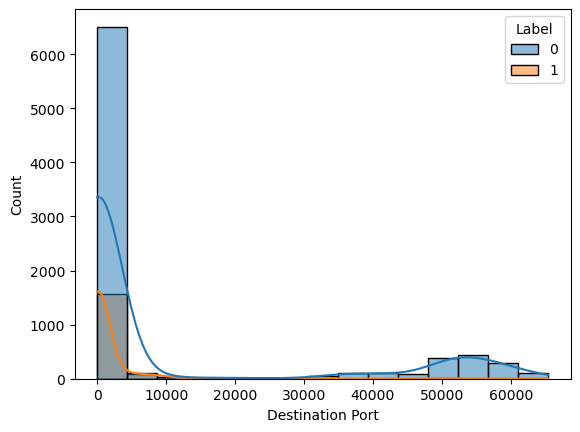

In [122]:
plot_histogram(df, df.columns[1])

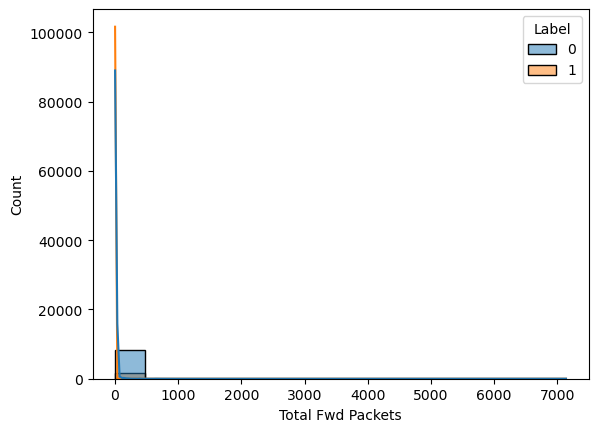

In [123]:
plot_histogram(df, df.columns[3])

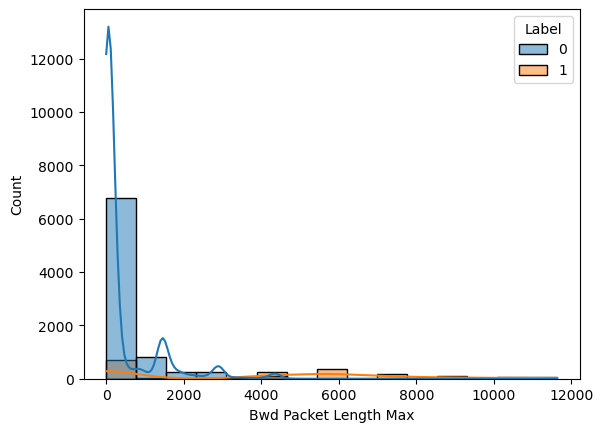

In [124]:
plot_histogram(df, df.columns[8])

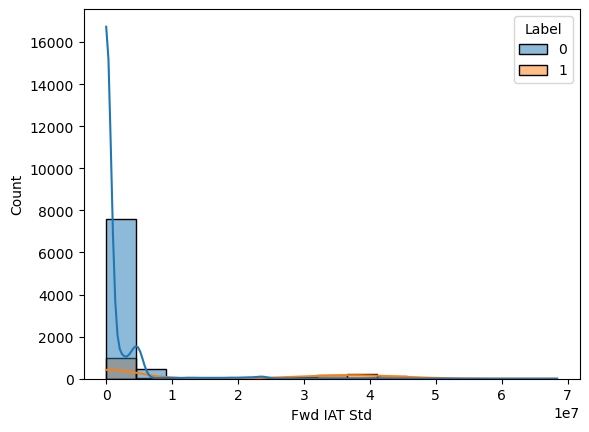

In [125]:
plot_histogram(df, df.columns[17])

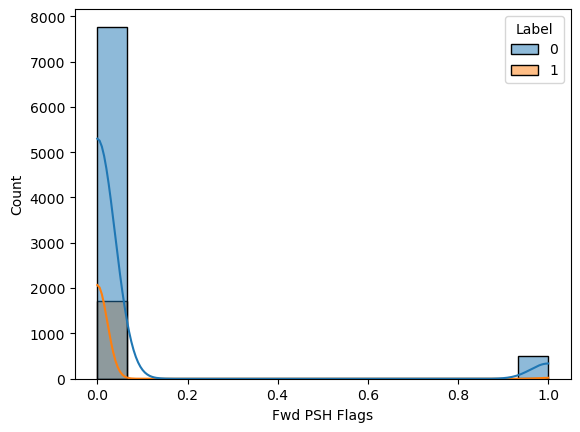

In [126]:
plot_histogram(df, df.columns[24])

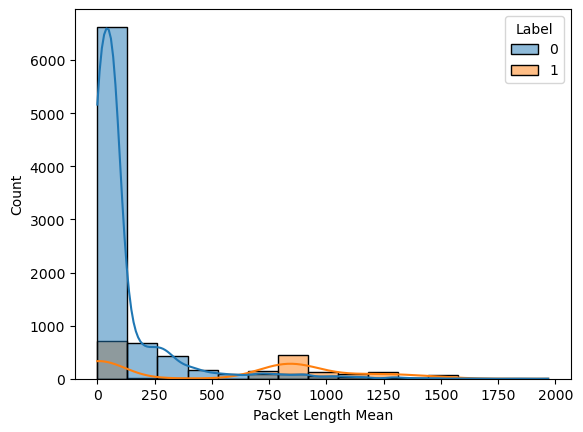

In [127]:
plot_histogram(df, df.columns[33])

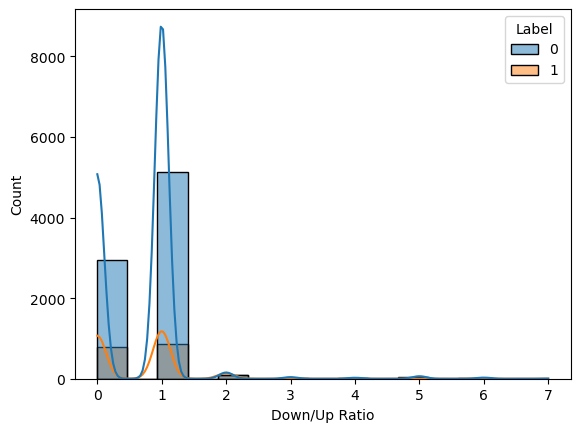

In [128]:
plot_histogram(df, df.columns[40])

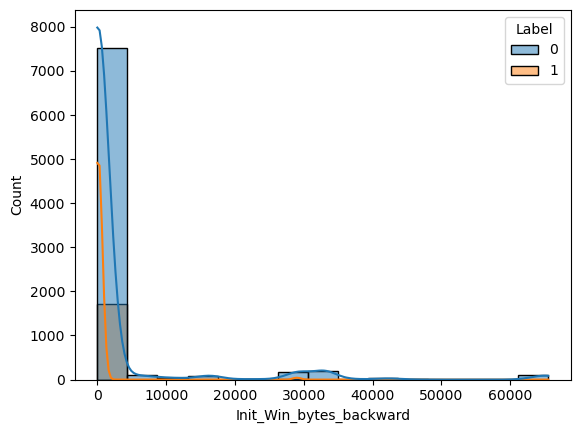

In [129]:
plot_histogram(df, df.columns[48])

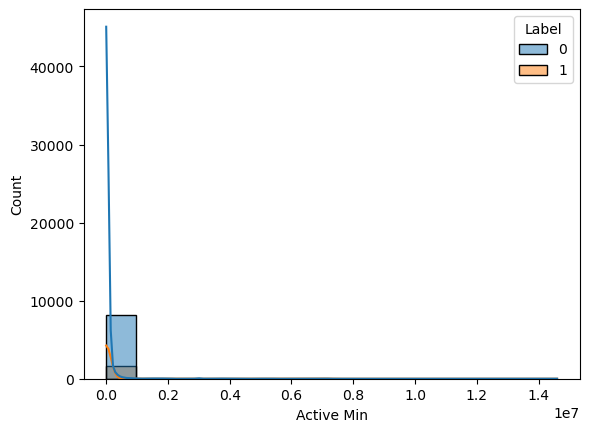

In [130]:
plot_histogram(df, df.columns[54])

In [131]:
def plot_distribution(data, n_rows):
    # Number of diagrams per line
    diagrams_per_row = n_rows

    # Total number of lines necessary for subplots
    total_rows = (len(data.columns) + diagrams_per_row - 1) // diagrams_per_row
    
    # Create figure et  subplots
    fig, axes = plt.subplots(total_rows, diagrams_per_row, figsize=(20, 3 * total_rows))
    
    # Apply sns.distplot() at each column and construct the histograms
    for i, col in enumerate(df.columns):
        ax = axes[i // diagrams_per_row, i % diagrams_per_row]
        sns.distplot(data[col], ax=ax, kde=True)
        ax.set_title(col)
        ax.set_xlabel('')
    
    # Delete unused subplots
    for i in range(len(data.columns), total_rows * diagrams_per_row):
        fig.delaxes(axes.flatten()[i])
    
    # Adjust layout / Ajuster la mise en page
    plt.tight_layout()
    # Display histograms
    plt.show()

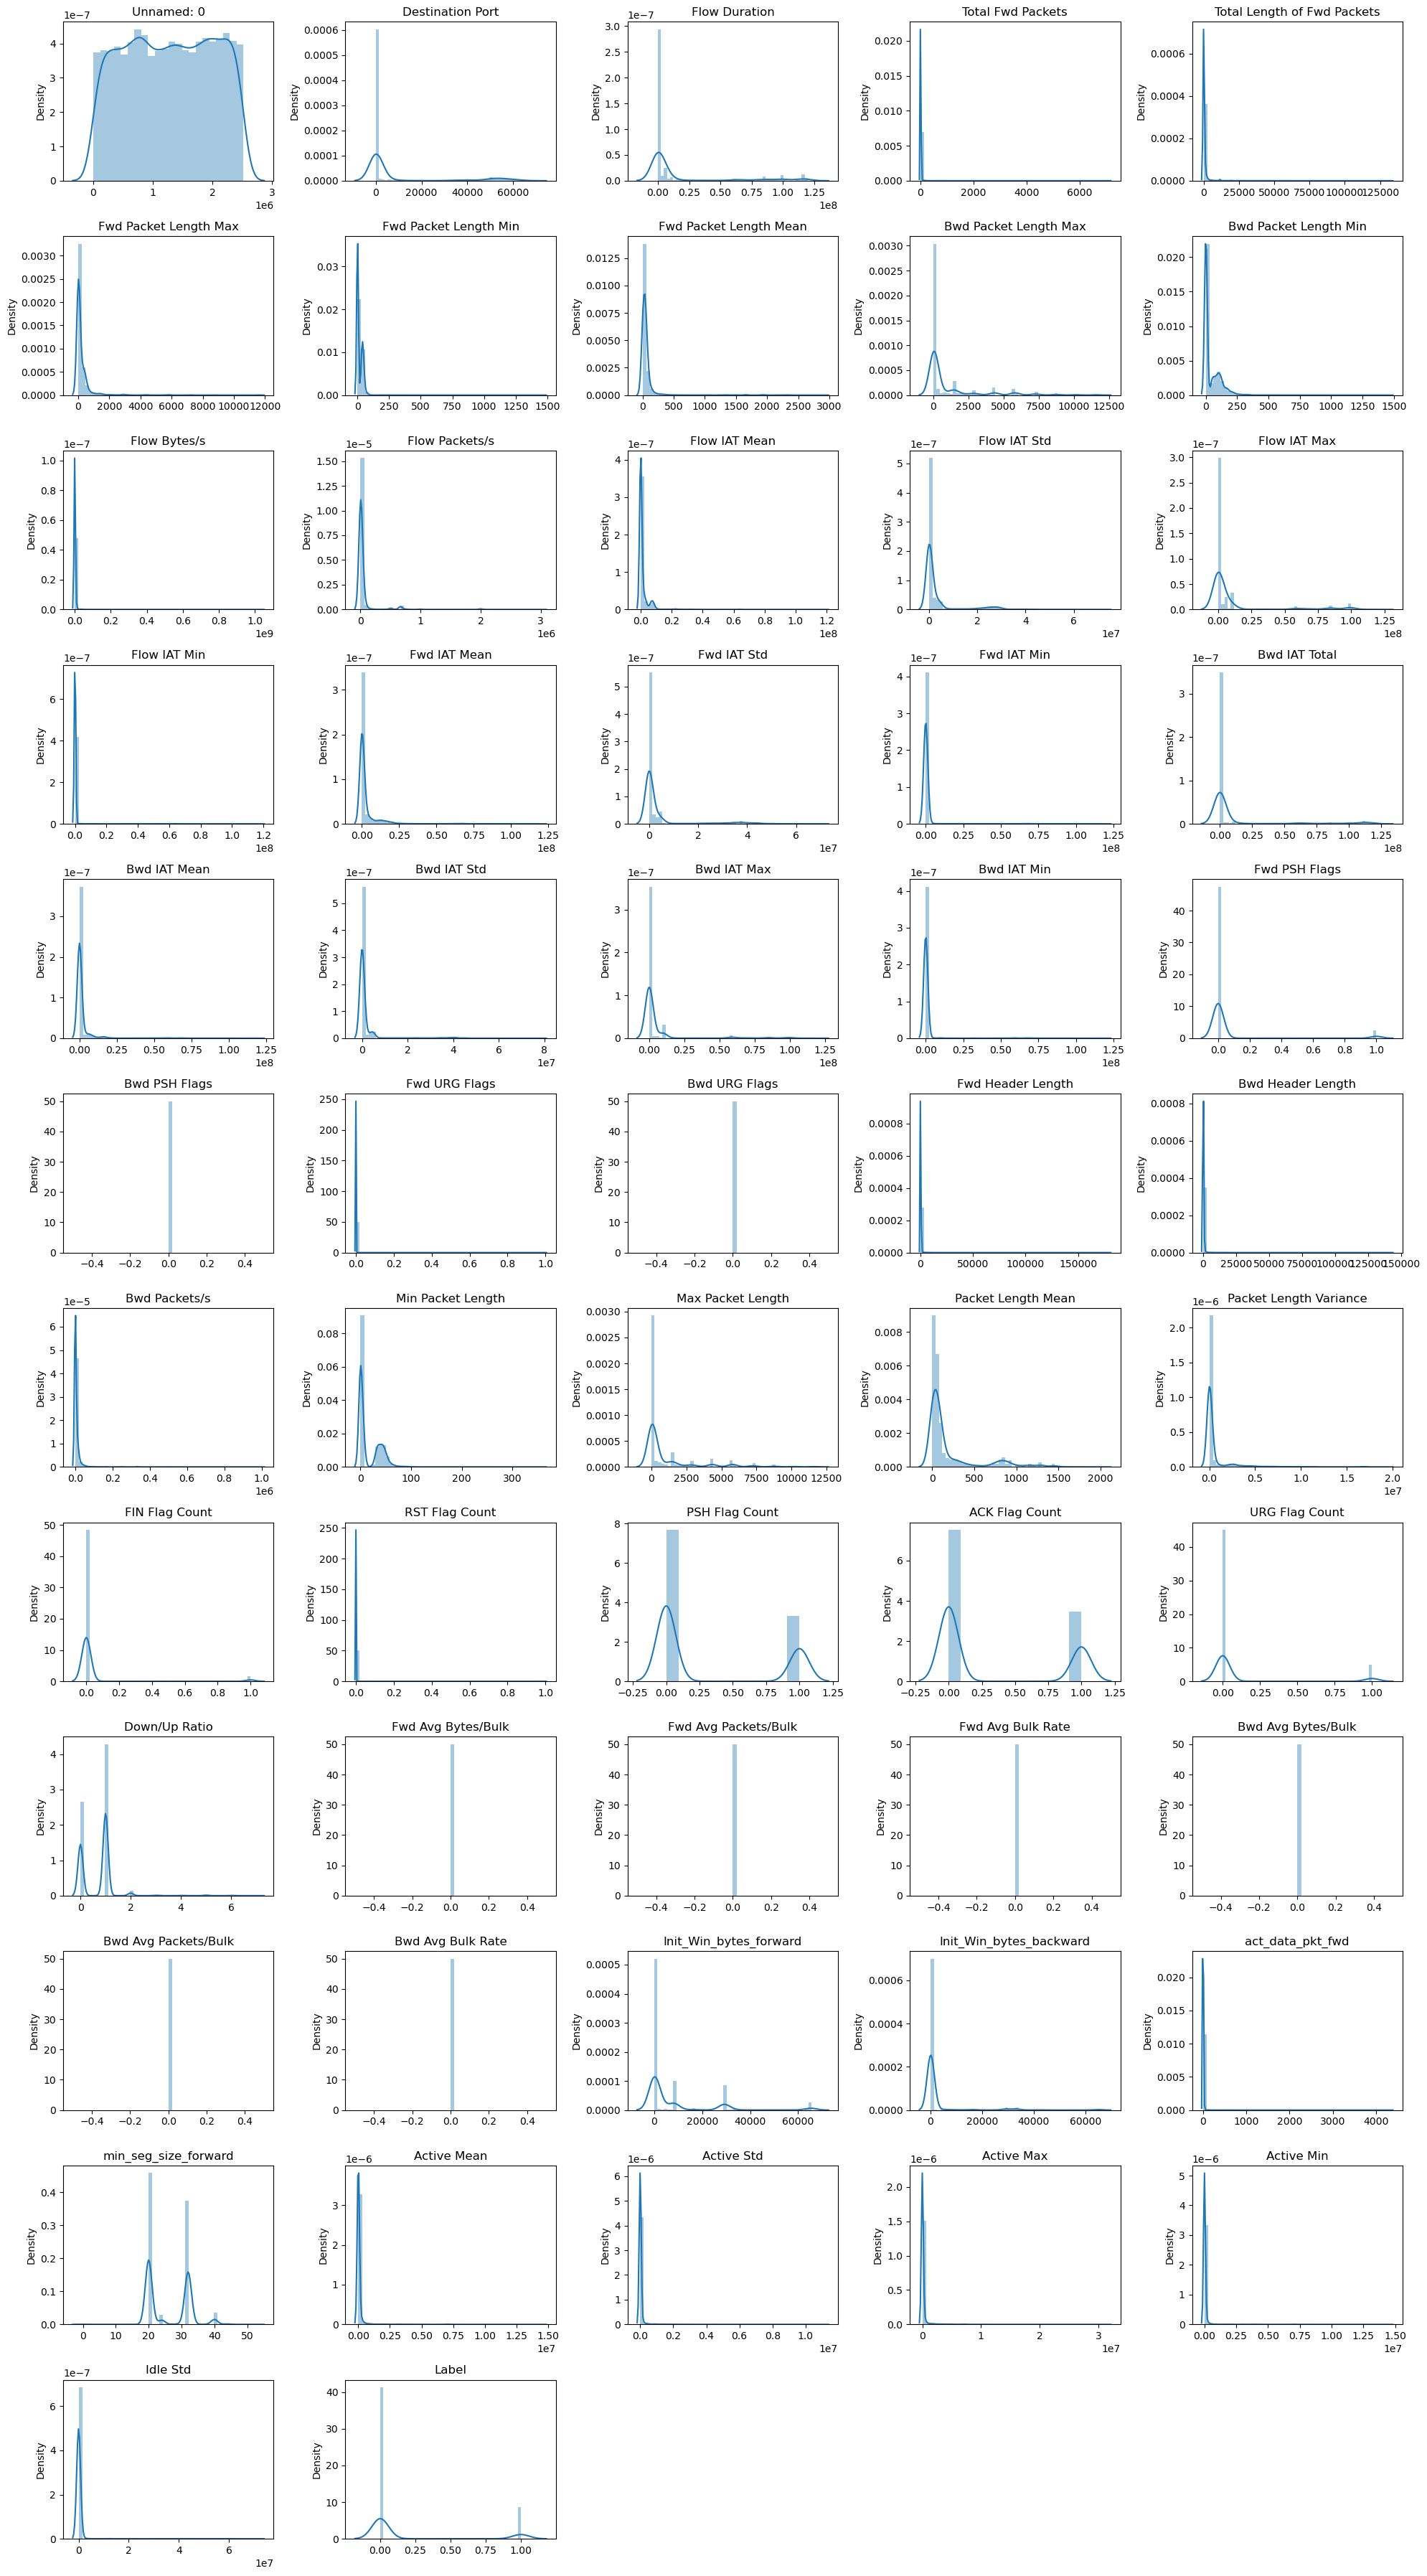

In [132]:
plot_distribution(df, 5)

In [133]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    num_features = len(features)
    num_cols = 6
    num_rows = (num_features + num_cols - 1) // num_cols

    sns.set_style('whitegrid')
    plt.figure(figsize=(20, 22))
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(18, 22))

    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.distplot(df1[feature], hist=False, label=label1)
        sns.distplot(df2[feature], hist=False, label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)

        # Add custom legend entries
        custom_legend = [
            plt.Line2D([], [], color=sns.color_palette()[0], label=label1),
            plt.Line2D([], [], color=sns.color_palette()[1], label=label2)
        ]
        plt.legend(handles=custom_legend)

    # Hide any empty subplots
    for i in range(num_features, num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

<Figure size 2000x2200 with 0 Axes>

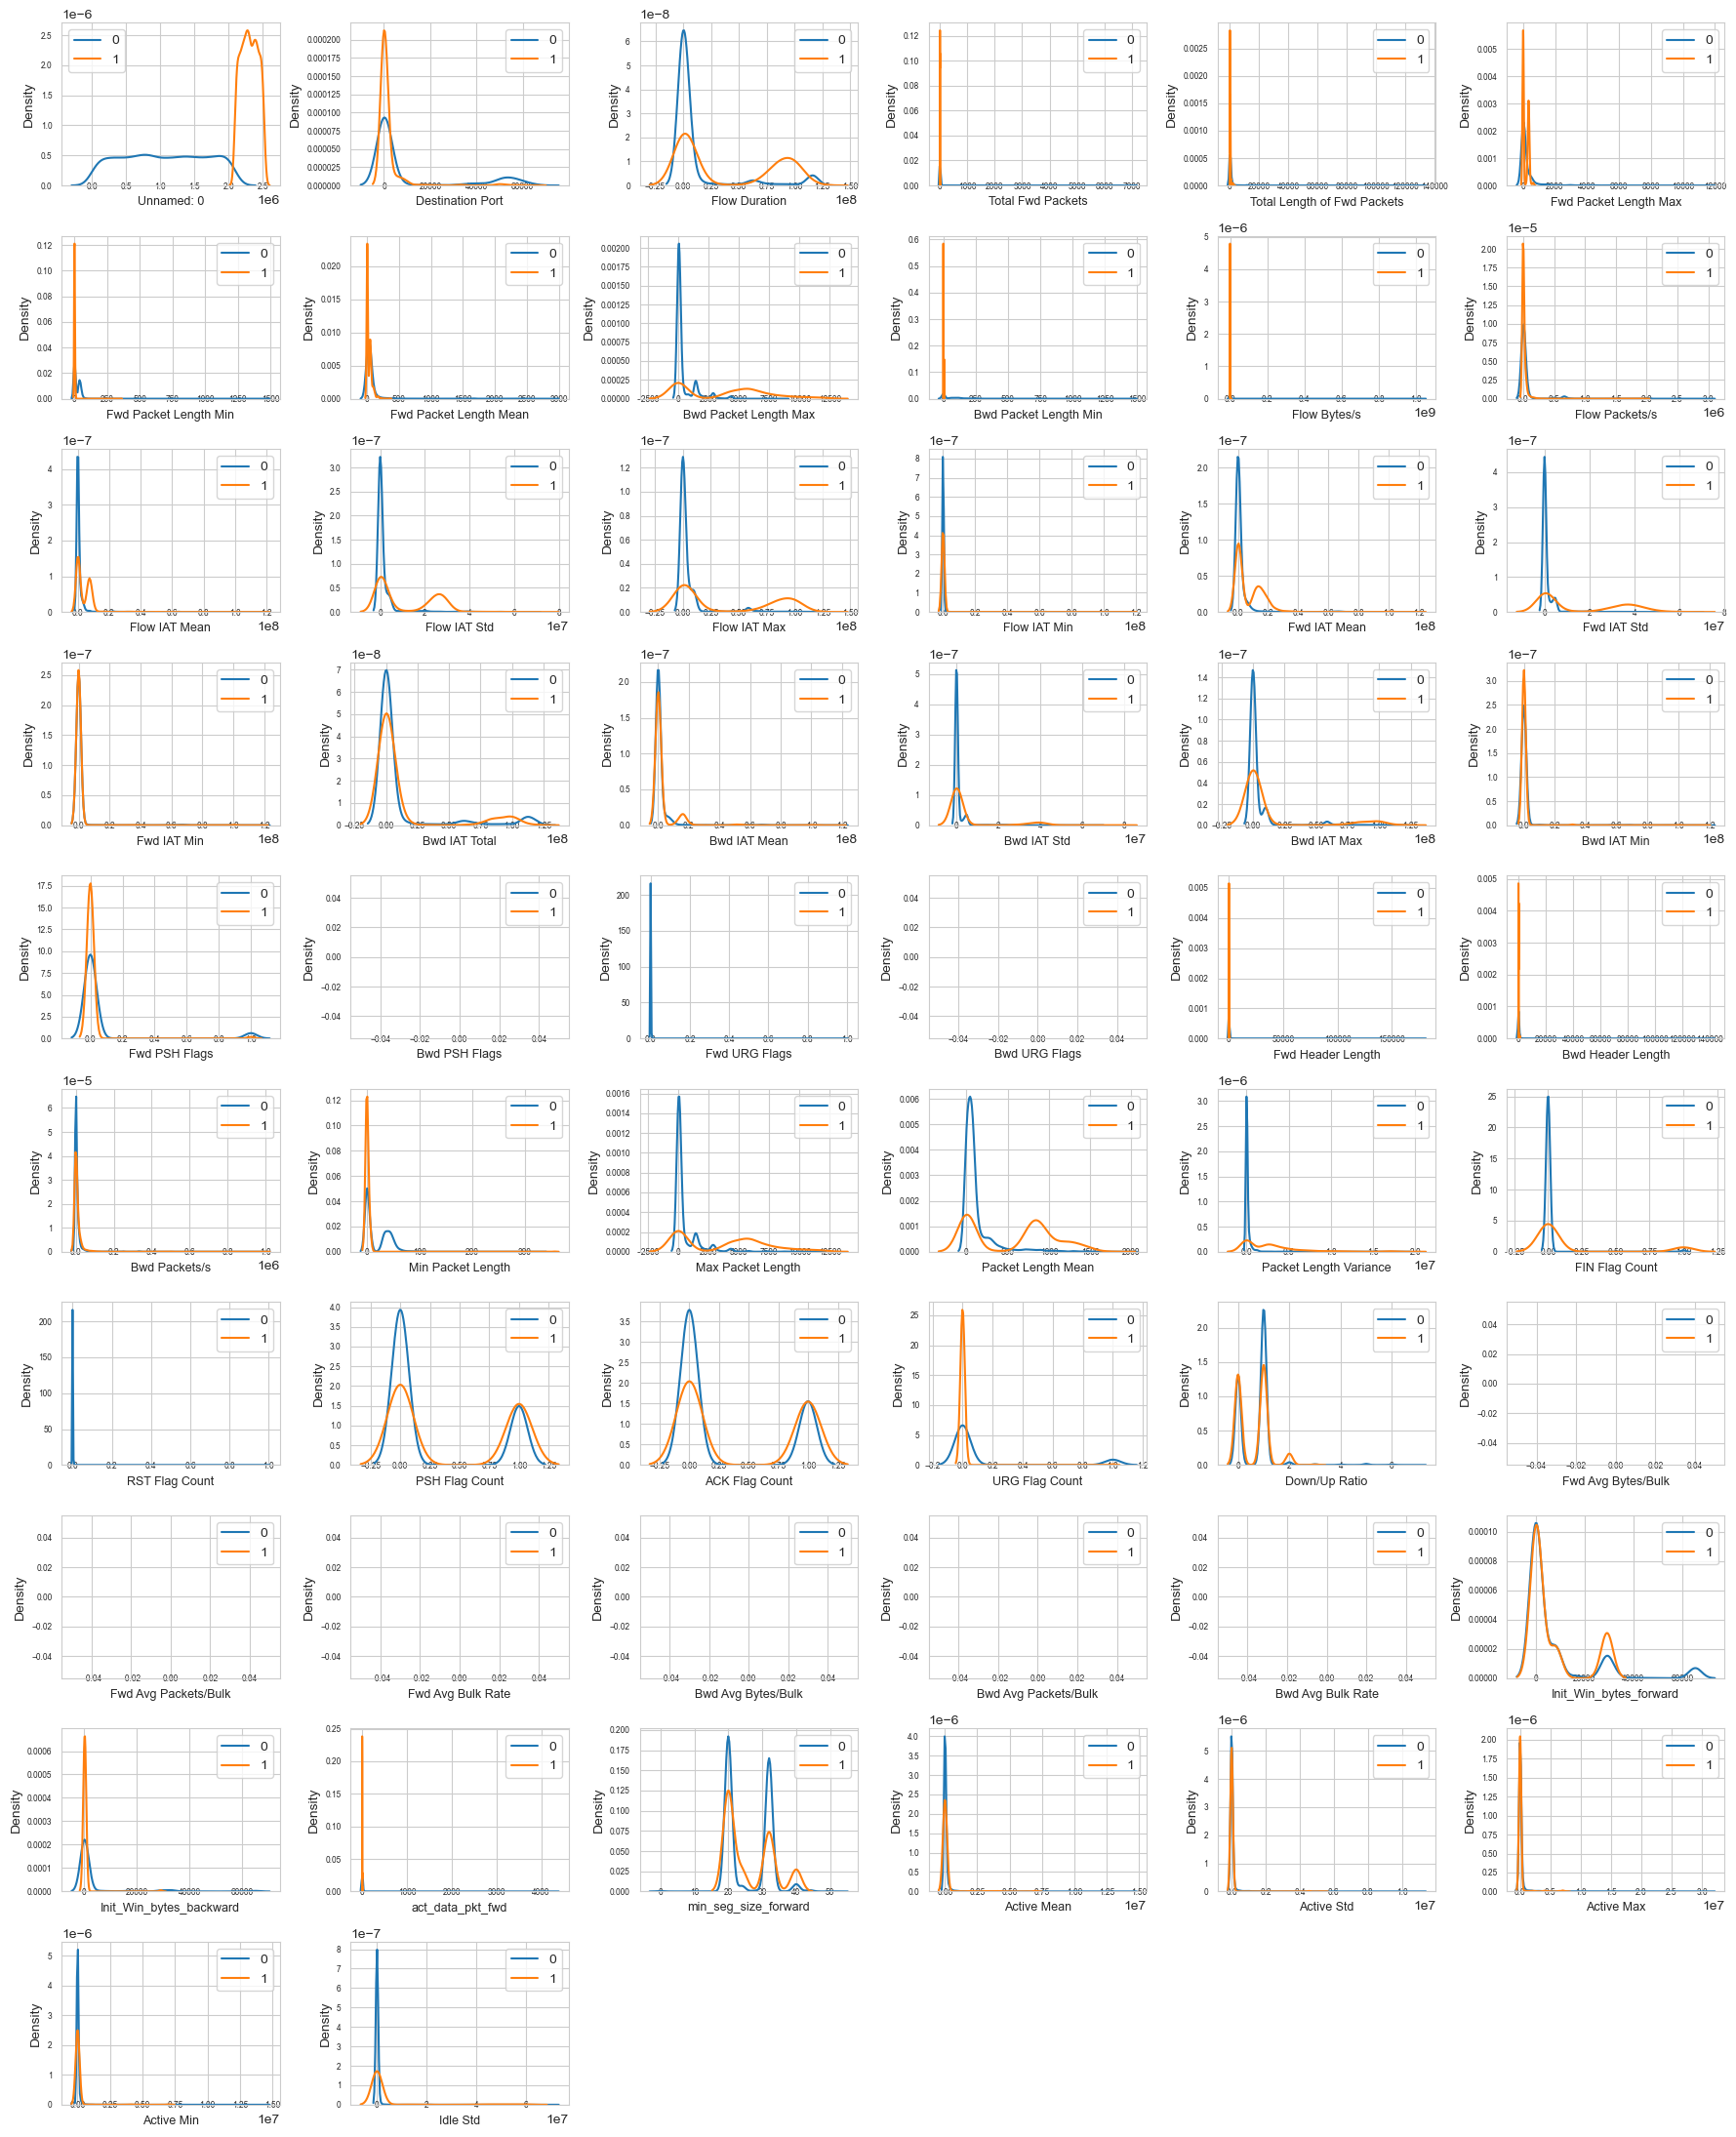

In [134]:
t0 = df.loc[df['Label'] == 0]
t1 = df.loc[df['Label'] == 1]
features = df.columns.values[:-1]
plot_feature_distribution(t0, t1, '0', '1', features)

In [135]:
def GetColumnWithZeros(data):
    """
    This function return columns with zeros values
    input:  data -> data frame   
    ouput:  columns with only zeros values
    
    """
    zeros_columns = []
    for col in data.columns:
        if len(data[col].value_counts()) == 1:
            zeros_columns.append(col)

    return zeros_columns

In [136]:
deleted_columns = GetColumnWithZeros(df)
deleted_columns

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [10]:
# # Outliers detection
# def OutLiersBox(df, nameOfFeature):
#     trace0 = go.Box(
#         y=df[nameOfFeature],
#         name="All Points",
#         jitter=0.3,
#         pointpos=-1.8,
#         boxpoints='all',
#         marker=dict(color='rgb(7,40,89)'),
#         line=dict(color='rgb(7,40,89)')
#     )

#     trace1 = go.Box(
#         y=df[nameOfFeature],
#         name="Only Whiskers",
#         boxpoints=False,
#         marker=dict(color='rgb(9,56,125)'),
#         line=dict(color='rgb(9,56,125)')
#     )

#     trace2 = go.Box(
#         y=df[nameOfFeature],
#         name="Suspected Outliers",
#         boxpoints='suspectedoutliers',
#         marker=dict(
#             color='rgb(8,81,156)',
#             outliercolor='rgba(219, 64, 82, 0.6)',
#             line=dict(
#                 outliercolor='rgba(219, 64, 82, 0.6)',
#                 outlierwidth=2
#             )
#         ),
#         line=dict(color='rgb(8,81,156)')
#     )

#     trace3 = go.Box(
#         y=df[nameOfFeature],
#         name="Whiskers and Outliers",
#         boxpoints='outliers',
#         marker=dict(color='rgb(107,174,214)'),
#         line=dict(color='rgb(107,174,214)')
#     )

#     data = [trace0, trace1, trace2, trace3]

#     layout = go.Layout(
#         title="{} Outliers".format(nameOfFeature),
#         width=1000,  # Set the width of the plot in pixels
#         height=500,  # Set the height of the plot in pixels
#     )

#     fig = go.Figure(data=data, layout=layout)
#     py.iplot(fig, filename="Outliers")

In [11]:
# OutLiersBox(df, df.columns[1])

In [12]:
# OutLiersBox(df, df.columns[21])

In [13]:
# OutLiersBox(df, df.columns[31])

### Bivariate analysis

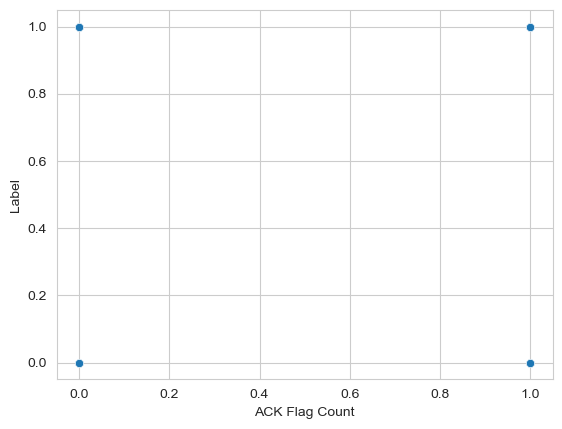

In [137]:
sns.scatterplot(data=df, x=df['ACK Flag Count'], y=df['Label']);

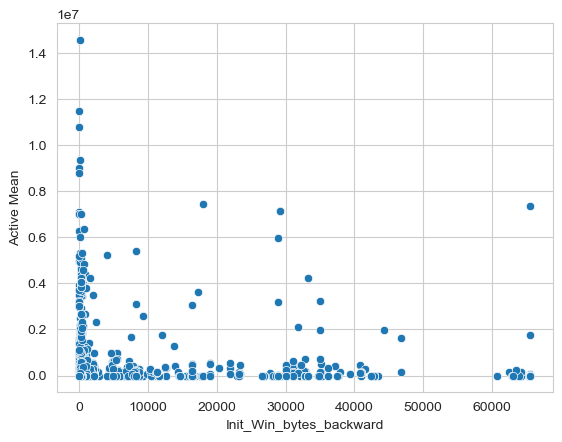

In [138]:
sns.scatterplot(data=df, x=df['Init_Win_bytes_backward'], y=df['Active Mean']);

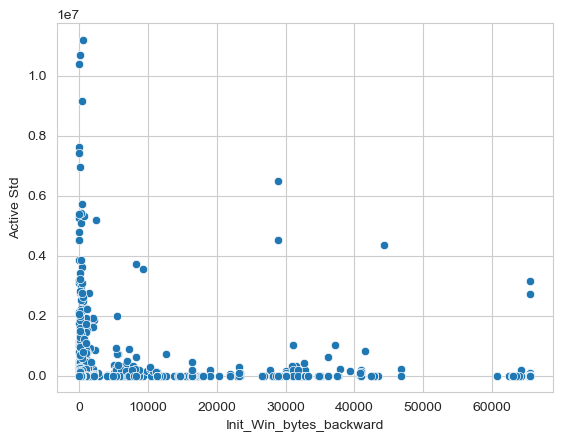

In [139]:
sns.scatterplot(data=df, x=df['Init_Win_bytes_backward'], y=df['Active Std']);

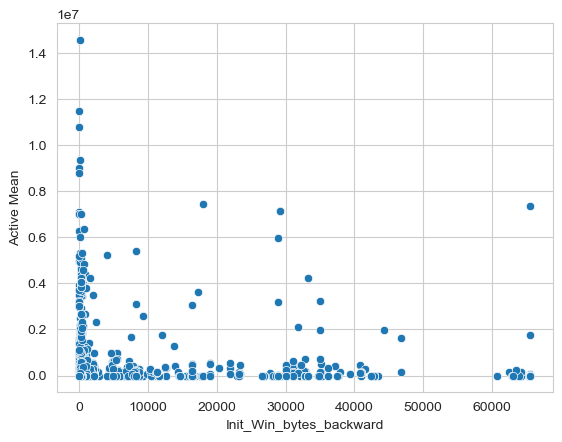

In [140]:
sns.scatterplot(data=df, x=df['Init_Win_bytes_backward'], y=df['Active Mean']);

In [141]:
def plot_boxplots(data):
    num_features = len(data.columns)
    num_cols = 4
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(data.columns):
        sns.boxplot(data=data[feature], ax=axes[i])
        axes[i].set_title(feature)

    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

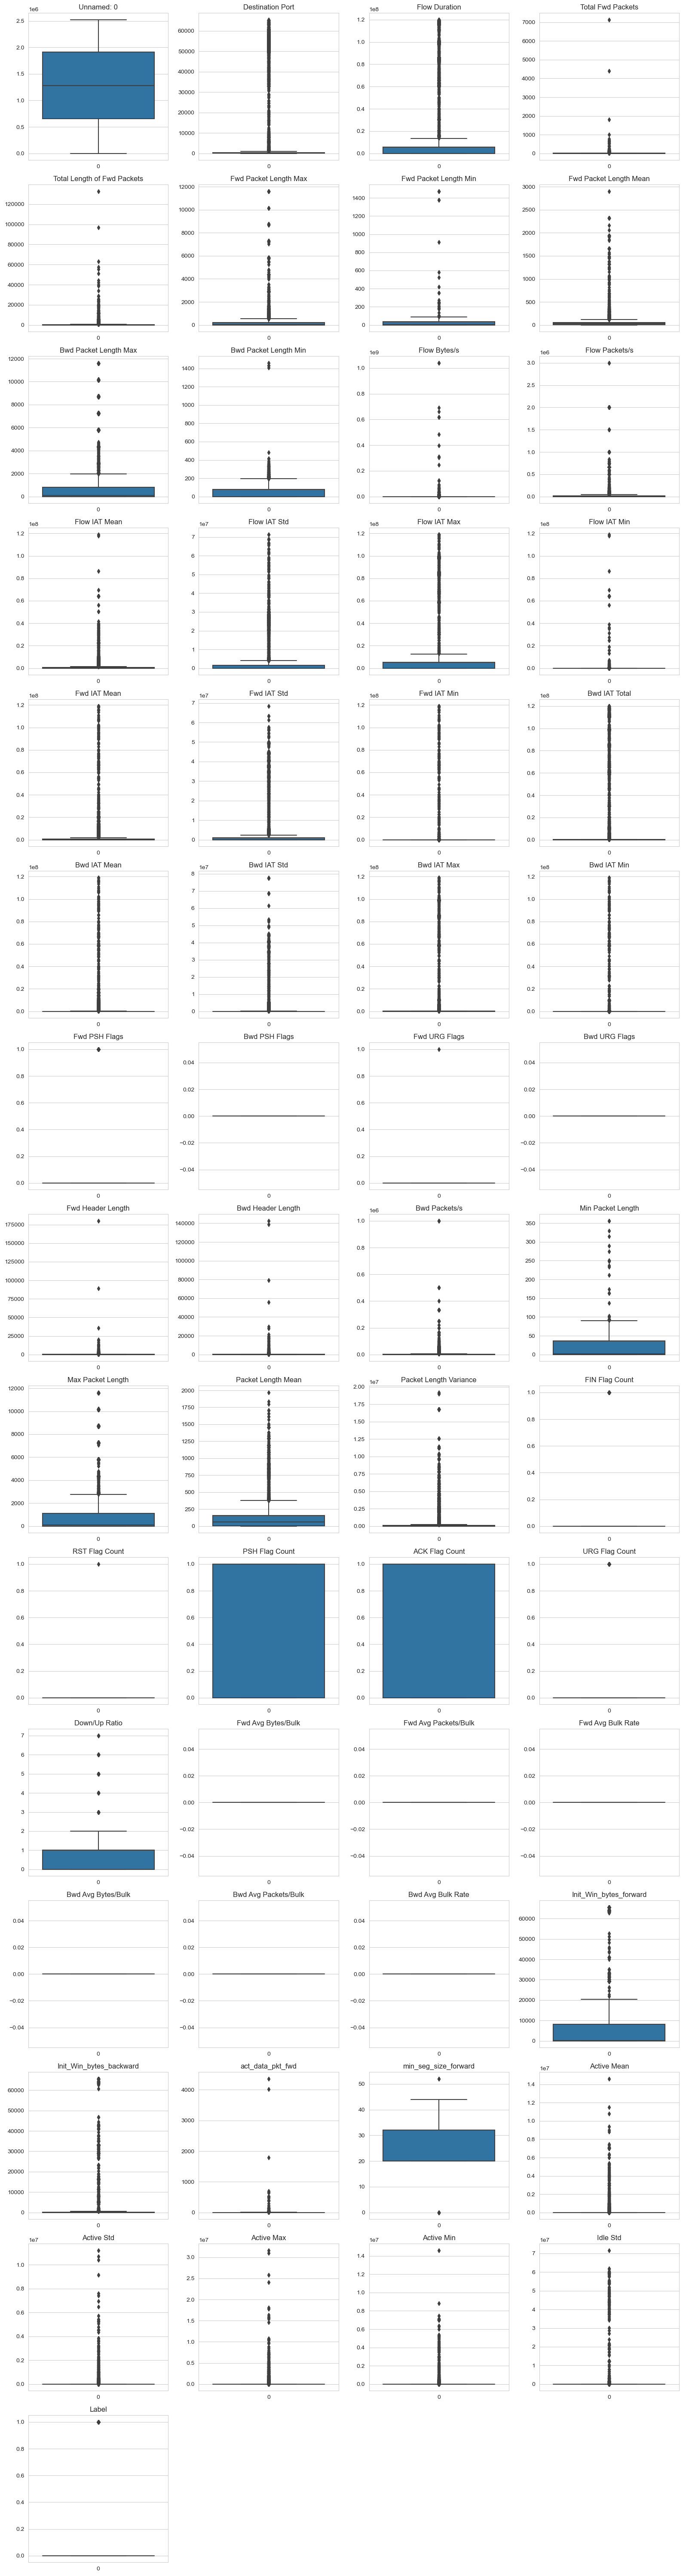

In [142]:
plot_boxplots(df)

# Data Preprocessing

## Data cleaning

In [144]:
from sklearn.base import BaseEstimator, TransformerMixin 

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1)

In [145]:
# check for zeros values in the columns
deleted_columns = GetColumnWithZeros(df)
deleted_columns

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [146]:
dropper = ColumnDropper(deleted_columns)
df_clean = dropper.transform(df)

In [147]:
# Save df cleaning
df_clean.to_csv("ids_dataclean.csv")

### Correlation

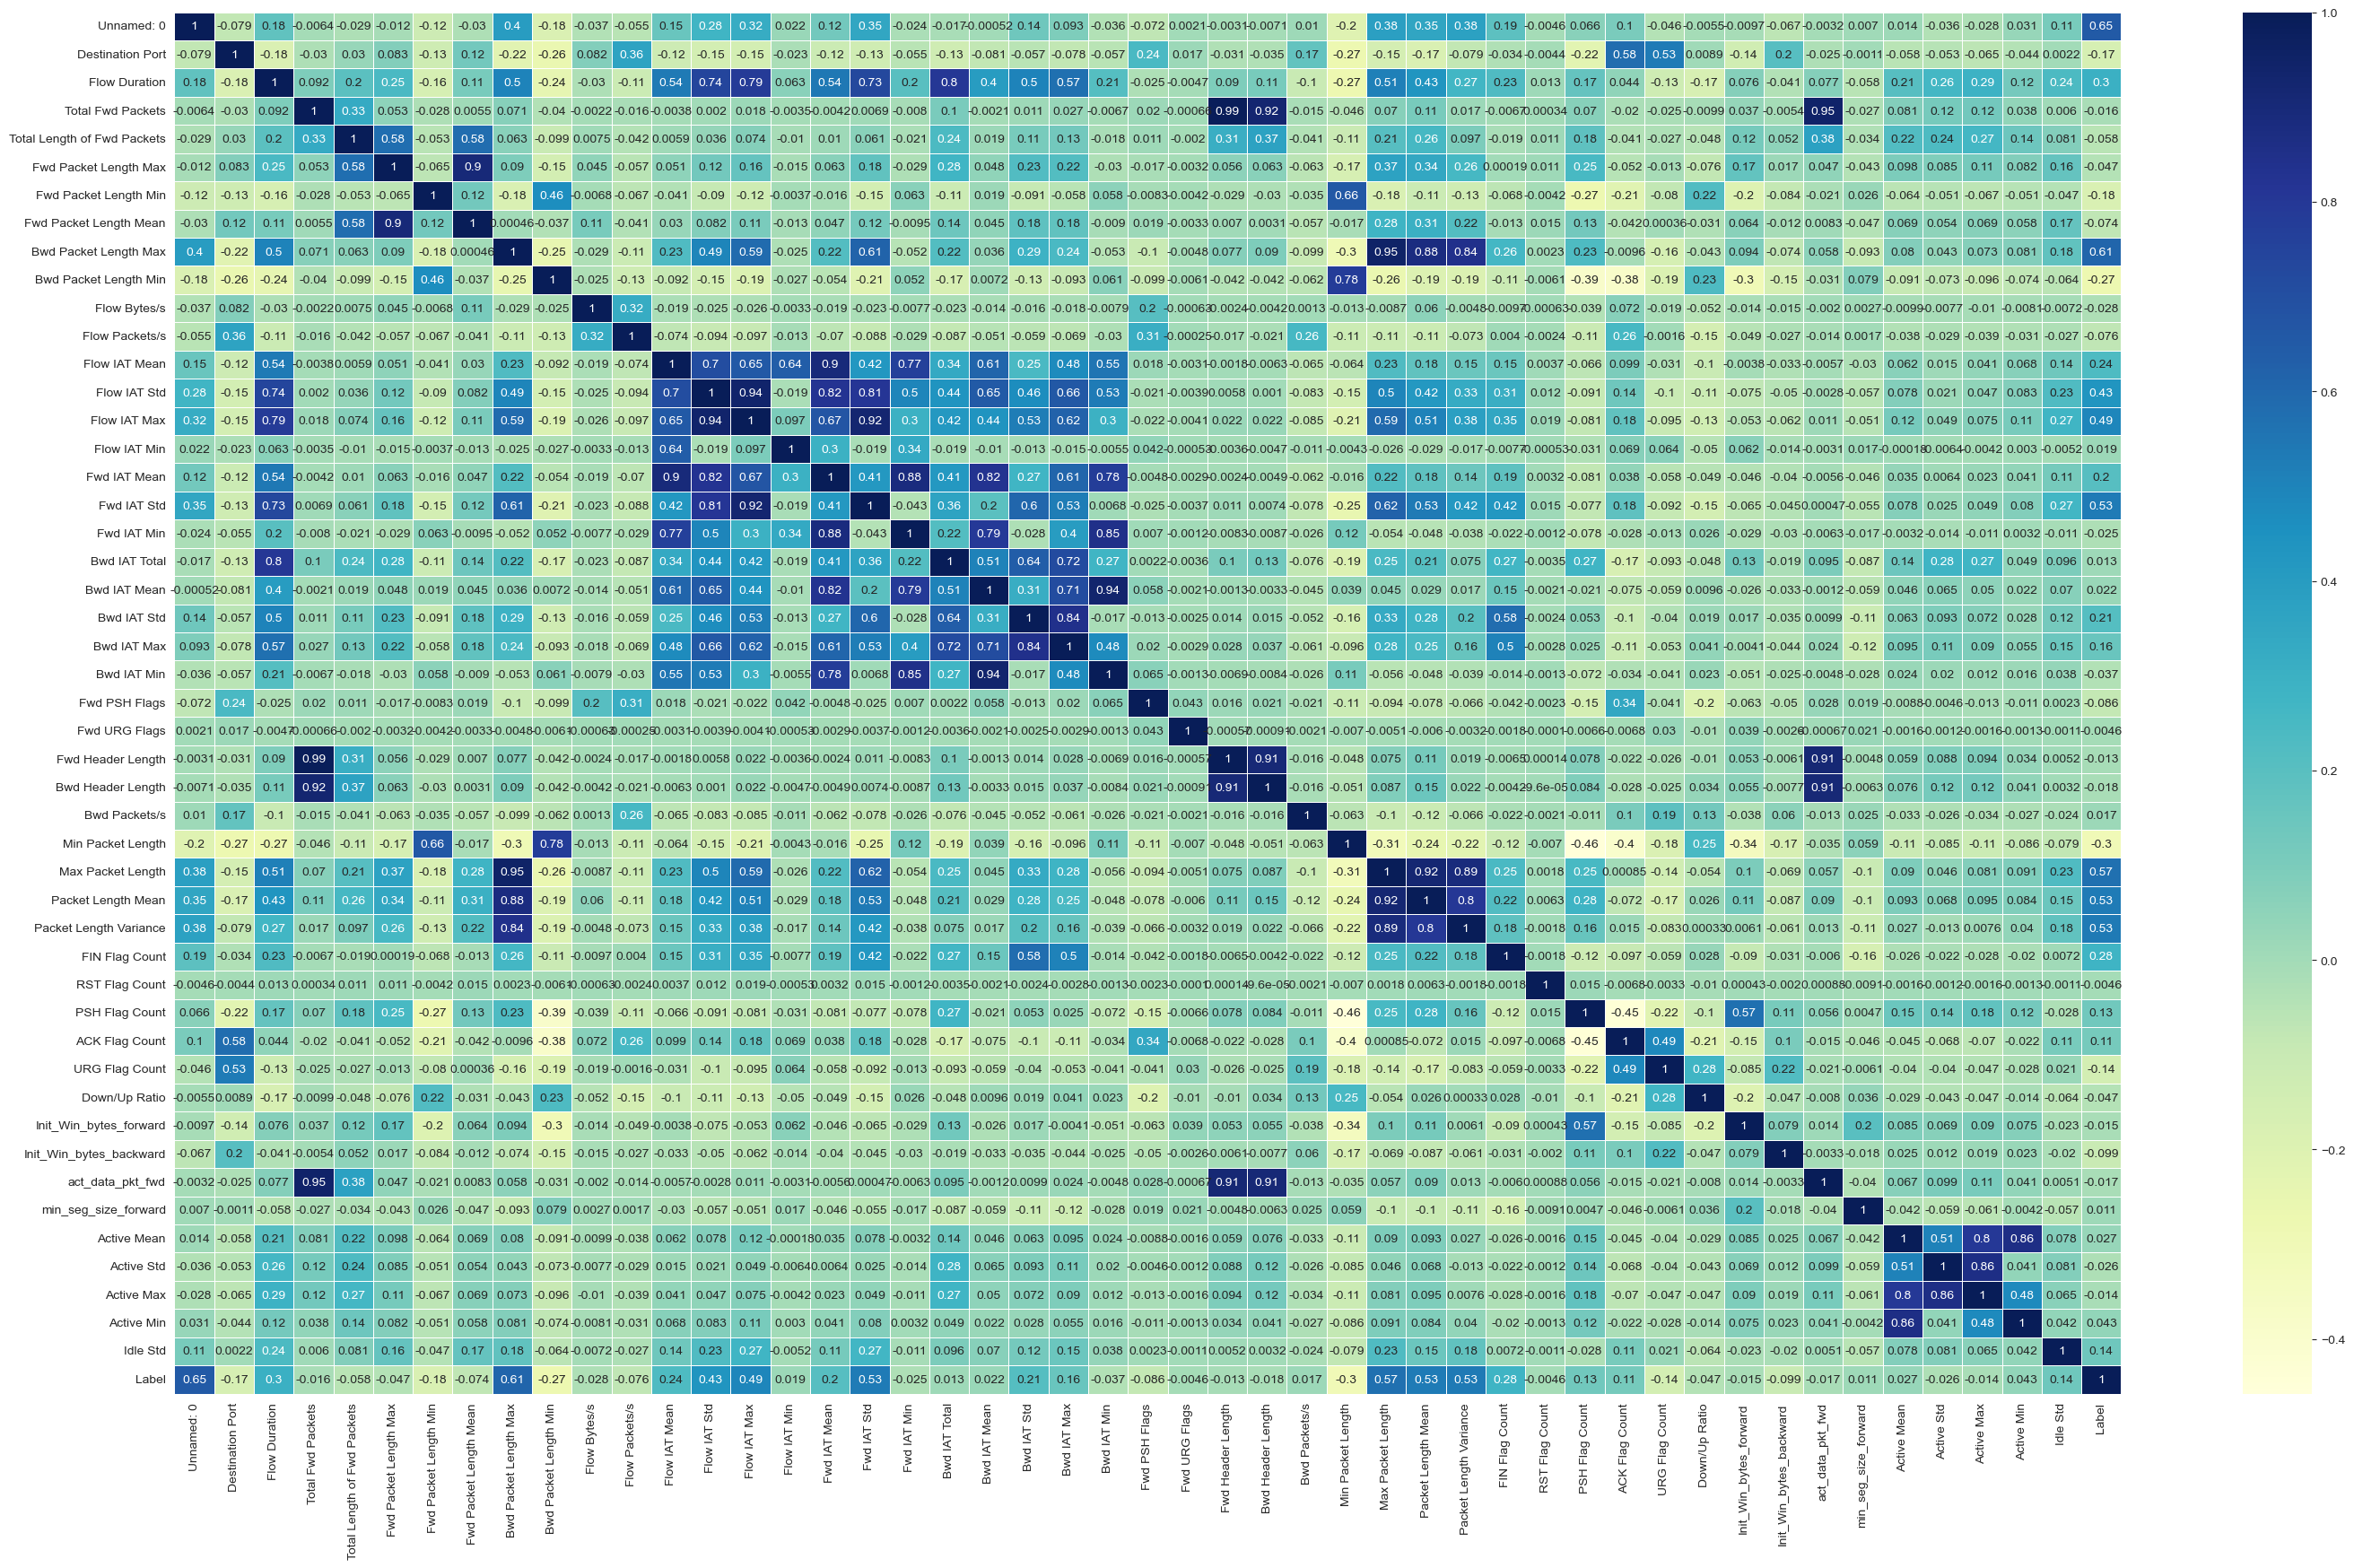

In [148]:
fig, ax = plt.subplots(figsize=(35,20))       
sns.heatmap(df_clean.corr(), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax);

In [149]:
def find_highly_correlated_variables(data, threshold):
    # Calculate the correlation matrix
    corr_matrix = data.corr().abs()
    
    # Set the diagonal elements to 0 to avoid including variables correlated with themselves
    n = corr_matrix.shape[0]
    corr_matrix.values[[range(n)], [range(n)]] = 0

    # Find the variables that are highly correlated
    correlated_vars = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                correlated_vars.add(corr_matrix.columns[i])
                correlated_vars.add(corr_matrix.columns[j])

    return list(correlated_vars)

In [150]:
# More correlated variables
correlated_vars = find_highly_correlated_variables(df_clean, threshold=0.95)
correlated_vars

['Bwd Packet Length Max',
 'Max Packet Length',
 'Fwd Header Length',
 'Total Fwd Packets']

In [151]:
# Drop the variables that are highly correlated
dropper = ColumnDropper(correlated_vars)
df_clean = dropper.transform(df_clean)

In [152]:
df.shape

(10000, 57)

In [153]:
df_clean.shape

(10000, 45)

In [154]:
# Save df cleaning
df_clean.to_csv("ids_dataclean.csv")

# Dimensionality Reduction and Clustering

In [195]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import DBSCAN
import matplotlib.patches as mpatches
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [156]:
# New_df is from the random undersample data (fewer instances)
X = df_clean.drop('Label', axis=1)
y = df_clean['Label']

# impute by median
X.fillna(X.median(), inplace = True)


scaler = StandardScaler()
X_s = scaler.fit_transform(X)


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_s)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_s)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_s)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 8.7e+01 s
PCA took 0.02 s
Truncated SVD took 0.017 s


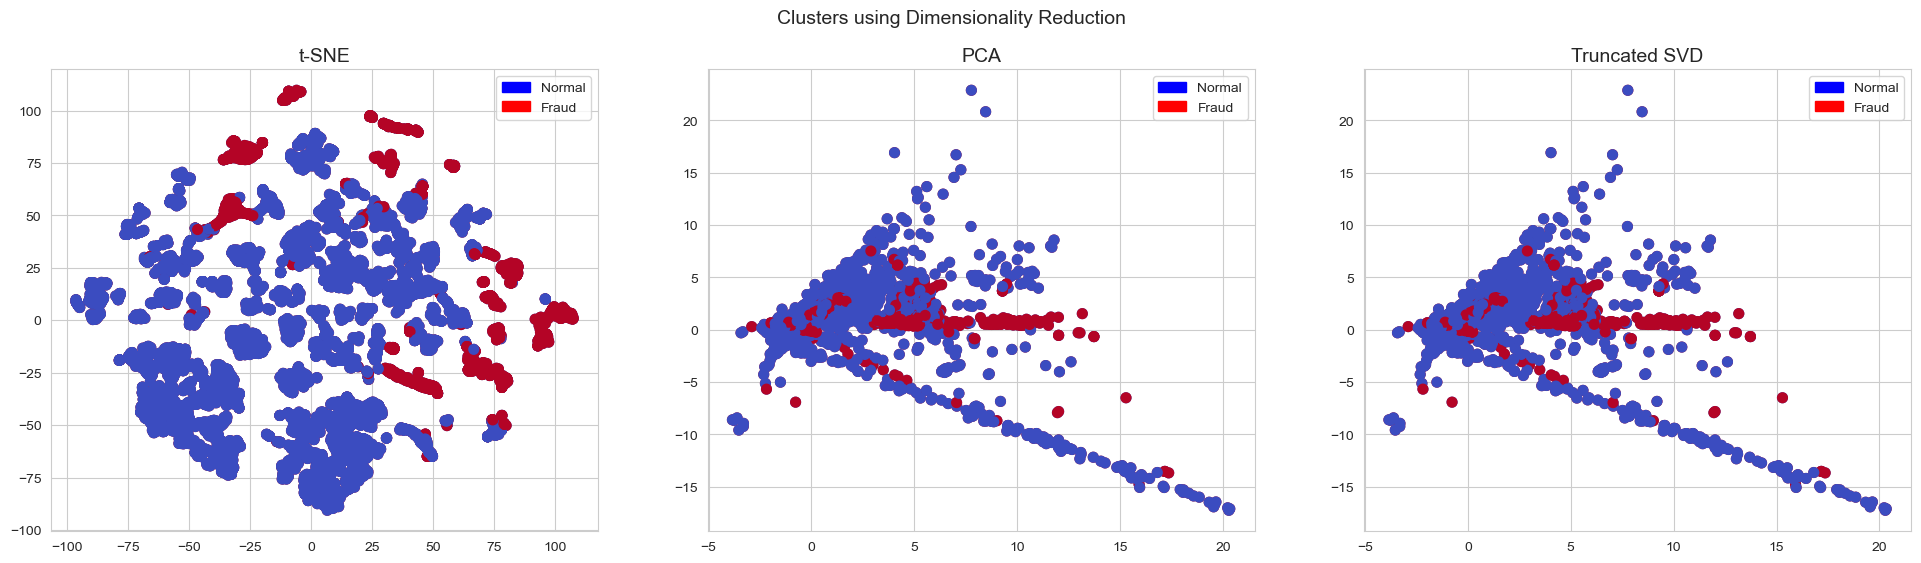

In [157]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='blue', label='Normal')
red_patch = mpatches.Patch(color='red', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [158]:
# DBSCAN Cluster Model
dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(X_s)
labels = dbscan_cluster_model.labels_

dbscan = DBSCAN(eps=0.2, min_samples=15)
cluster = dbscan.fit_predict(X_s)

In [159]:
# percantage. of Outliers
print(f"The percentage of outliers is : {(sum(labels == -1)/X.shape[0])*100:.2f}%")

The percentage of outliers is : 89.02%


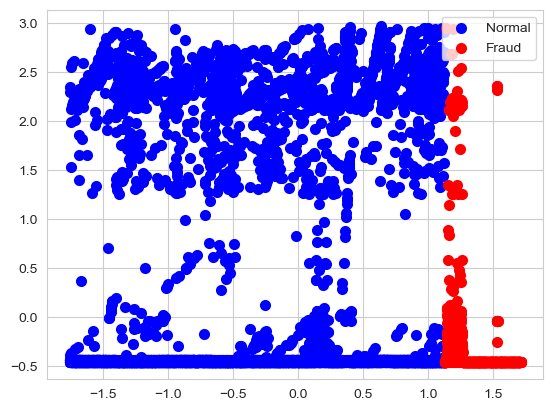

In [160]:
# Create a scatter plot for "Normal" class (label 0) with red color
plt.scatter(X_s[y == 0, 0], X_s[y == 0, 1], c='blue', label='Normal', linewidths=2)
# Create a scatter plot for "Fraud" class (label 1) with blue color
plt.scatter(X_s[y == 1, 0], X_s[y == 1, 1], c='red', label='Fraud', linewidths=2)
plt.legend(loc='best');

In [161]:
labels_01 = np.where(labels < 0, 1, 0)
labels_data = pd.DataFrame(labels_01, columns=['dbscan'])
labels_data.value_counts()

dbscan
1         8902
0         1098
Name: count, dtype: int64

In [162]:
data_error = pd.concat([y, labels_data], axis=1)

In [163]:
data_error.head()

Label  dbscan
0      0       1
1      0       1
2      0       1
3      0       1
4      0       0

In [164]:
print(f"The error made by DBSCAN is : {np.sum(data_error.Label != data_error.dbscan)/len(data_error):.2f}")

The error made by DBSCAN is : 0.85


In [165]:
# Identifying indexes which makes our core points
sample_cores=np.zeros_like(labels, dtype=bool)

In [166]:
sample_cores[dbscan_cluster_model.core_sample_indices_]=True

In [167]:
# Number of clusters is given by:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

31

# Feature Engineering

In this step we perform the following things:
- Handling the Outliers.
- Handling the Categorical Data.

### Dealing with outliers by IQR

In [168]:
def get_outlier_columns(data, threshold):
    
    columns_with_outliers = []
    
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        if np.any(outliers_mask):
            columns_with_outliers.append(col)
    
    return columns_with_outliers

In [169]:
def remove_outliers(df_out, nameOfFeature, drop=False, threshold=None):

    valueOfFeature = df_out[nameOfFeature]
    
    # Check if there are valid data points in the column
    if len(valueOfFeature) > 0:
        Q1 = np.percentile(valueOfFeature, 25.)
        Q3 = np.percentile(valueOfFeature, 75.)
        step = (Q3 - Q1) * threshold
        outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()

        if drop:
            good_data = df_out.drop(df_out.index[outliers]).reset_index(drop=True)
            return good_data
        else:
            return df_out
    else:
        # If the array is empty, return the original DataFrame
        return df_out

In [170]:
df_except_label = df_clean.drop(columns=['Label']) 
threshold = 1.5
columns_with_outliers = get_outlier_columns(df_except_label, threshold=threshold)

In [171]:
# # Remove Outliers
# N = len(columns_with_outliers)
# for i in range(N):
#     df_clean = remove_outliers(df, columns_with_outliers[i], True, threshold=300)

In [172]:
# check for zeros values in the columns
new_columns = GetColumnWithZeros(df_clean)
new_columns

[]

In [291]:
# dropper = ColumnDropper(new_columns)
# df_clean = dropper.transform(df_clean)

### Cleaning report

In [173]:
### Cleaning report
print(f"df has {df.shape[0]} rows, new df has {df_clean.shape[0]} rows. Then we lost {df.shape[0]-df_clean.shape[0]} rows, {(df.shape[0]-df_clean.shape[0])/df.shape[0]*100}% of our data.")
print(f"df has {df.shape[1]} columns, new df has {df_clean.shape[1]} columns. Then we lost {df.shape[1]-df_clean.shape[1]} columns, {(df.shape[1]-df_clean.shape[1])/df.shape[0]*100}% of our column data.")


df has 10000 rows, new df has 10000 rows. Then we lost 0 rows, 0.0% of our data.
df has 57 columns, new df has 45 columns. Then we lost 12 columns, 0.12% of our column data.


## Feature Selection

In this step we use some techniques to identify the important and unnecessary features to feed to our model.

#### Remove unecessary columns if any

In [174]:
# Unnamed: 0  column is not required (index column)
df_clean = df_clean.drop('Unnamed: 0', axis=1)

In [175]:
### Cleaning report
print(f"df has {df.shape[0]} rows, new df has {df_clean.shape[0]} rows. Then we lost {df.shape[0]-df_clean.shape[0]} rows, {(df.shape[0]-df_clean.shape[0])/df.shape[0]*100}% of our data.")
print(f"df has {df.shape[1]} columns, new df has {df_clean.shape[1]} columns. Then we lost {df.shape[1]-df_clean.shape[1]} columns, {(df.shape[1]-df_clean.shape[1])/df.shape[0]*100}% of our column data.")


df has 10000 rows, new df has 10000 rows. Then we lost 0 rows, 0.0% of our data.
df has 57 columns, new df has 44 columns. Then we lost 13 columns, 0.13% of our column data.


#### Feature importance

In [196]:
# impute by median
df_new = df_clean.copy()
df_new.fillna(df_new.median(), inplace = True)

X_fi = df_new.drop(["Label"], axis = 1)
y_fi = df_new["Label"]

In [197]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



def get_important_features_with_RF(X, y, threshold):
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    feature_importances = model.feature_importances_
    feature_names = X.columns

    sorted_indices = feature_importances.argsort()[::-1]  # Sort in descending order
    sorted_features = [feature_names[i] for i in sorted_indices if feature_importances[i] >= threshold]
    sorted_importances = [feature_importances[i] for i in sorted_indices if feature_importances[i] >= threshold]

    important_features = [feature for feature, importance in zip(feature_names, feature_importances) if importance >= threshold]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Random Forest Feature Importance")
    plt.show()
    
    return important_features

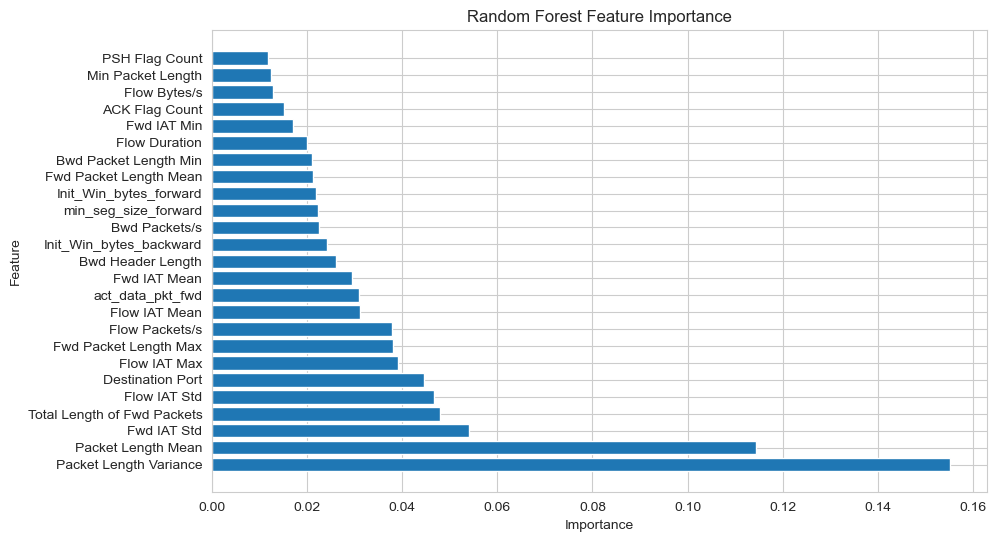

Number of FI :  25
Important Features: ['Destination Port', 'Flow Duration', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length', 'Packet Length Mean', 'Packet Length Variance', 'PSH Flag Count', 'ACK Flag Count', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward']


In [198]:
# Feature Importance
important_features_RF = get_important_features_with_RF(X_fi, y_fi, threshold=0.01)
print("Number of FI : ", len(important_features_RF))
print("Important Features:", important_features_RF)

In [199]:
from sklearn.ensemble import ExtraTreesClassifier

def get_important_features_with_Tree(X, y, threshold):
    clf = ExtraTreesClassifier(n_estimators=250, random_state=42)
    clf.fit(X, y)

    # feature_importance = clf.feature_importances_
    # feature_importance = 100.0 * (feature_importance / feature_importance.max())
    # sorted_idx = np.argsort(feature_importance)

    feature_importances = clf.feature_importances_
    feature_names = X.columns

    sorted_indices = feature_importances.argsort()[::-1]  # Sort in descending order
    sorted_features = [feature_names[i] for i in sorted_indices if feature_importances[i] >= threshold]
    sorted_importances = [feature_importances[i] for i in sorted_indices if feature_importances[i] >= threshold]

    important_features = [feature for feature, importance in zip(feature_names, feature_importances) if importance >= threshold]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Tree Feature Importance")
    plt.show()

    return important_features

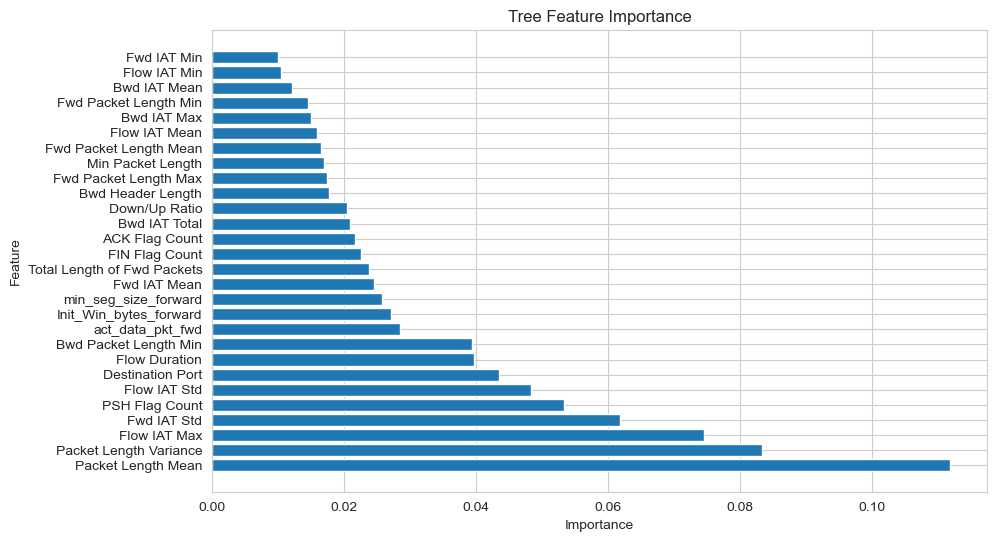

Number of FI :  28
Important Features: ['Destination Port', 'Flow Duration', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Min', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd Header Length', 'Min Packet Length', 'Packet Length Mean', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio', 'Init_Win_bytes_forward', 'act_data_pkt_fwd', 'min_seg_size_forward']


In [200]:
important_features_Tree = get_important_features_with_Tree(X_fi, y_fi, threshold=0.01)
print("Number of FI : ", len(important_features_Tree))
print("Important Features:", important_features_Tree)

# Data Modeling

In [201]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict, train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_squared_error

2023-09-06 20:17:16.482899: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dimensionality Reduction and Clustering Techniques

> PCA - t-SNE & DBSAN

In [178]:
# impute by median
df_selected = df_clean.copy() 
# df_selected = df_clean[important_features_RF+["Label"]].reset_index(drop=True)
# df_selected = df_clean[important_features_Tree+["Label"]].reset_index(drop=True)
df_selected.fillna(df_selected.median(), inplace = True)

X_orig = df_selected.drop(['Label'], axis = 1)
y_orig = df_selected["Label"]

## PCA

In [179]:
# Scale data
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_orig)

# Instantiate and fit PCA model
pca = PCA()  
X_pca = pca.fit_transform(X_sc)

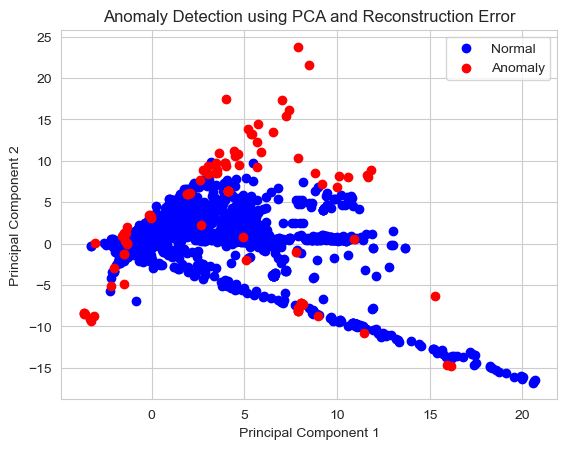

In [180]:
# Reconstruction
X_reconstructed = pca.inverse_transform(X_pca)

# Reconstruction Errors
reconstruction_errors = np.sum(np.square(X_sc - X_reconstructed), axis=1)
# reconstruction_errors = np.linalg.norm(X_sc - X_reconstructed, axis=1)

# Choose a threshold for anomaly detection
# Choose the desired percentile
percentile = 99
# Calculate the threshold using the chosen percentile
threshold = np.percentile(reconstruction_errors, percentile)

# Identify anomalies
anomalies = np.where(reconstruction_errors > threshold)[0]

normal_samples = np.delete(X_pca, anomalies, axis=0)
anomaly_samples = X_pca[anomalies]

plt.scatter(normal_samples[:, 0], normal_samples[:, 1], label='Normal', c='blue')
plt.scatter(anomaly_samples[:, 0], anomaly_samples[:, 1], label='Anomaly', c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Anomaly Detection using PCA and Reconstruction Error')
plt.show()

### Interpretation of principal component weights

In [181]:
# Extract the principal axes in feature space (principal components)
X_pca_comp = pca.components_

# Create DataFrame for PCs (Comparison is based on absolute value)
X_pca_comp_df = pd.DataFrame(X_pca_comp.T, index=X_orig.columns, columns=[f'PC{i}' for i in range(1, X_orig.shape[1]+1)])

# Display
X_pca_comp_df.round(4)

PC1     PC2     PC3     PC4     PC5     PC6  \
Destination Port            -0.0600  0.0412 -0.3554  0.1633  0.2569 -0.0102   
Flow Duration                0.2971  0.0950  0.0045 -0.0278 -0.0509 -0.0833   
Total Length of Fwd Packets  0.0765  0.2299  0.1299  0.0950  0.3253  0.2116   
Fwd Packet Length Max        0.1073  0.2281  0.0586 -0.0417  0.2950  0.2955   
Fwd Packet Length Min       -0.0565 -0.1878  0.2223 -0.0890  0.2496 -0.0579   
Fwd Packet Length Mean       0.0793  0.1708  0.0716 -0.0553  0.3854  0.2742   
Bwd Packet Length Min       -0.0843 -0.2387  0.2919 -0.1237  0.1818 -0.1002   
Flow Bytes/s                -0.0085  0.0164 -0.0782  0.0334  0.1185  0.0300   
Flow Packets/s              -0.0444  0.0057 -0.2207  0.1140  0.1076 -0.0293   
Flow IAT Mean                0.2669 -0.1861 -0.0510  0.1273 -0.0504  0.0764   
Flow IAT Std                 0.3222 -0.0896 -0.0729 -0.0654 -0.0073 -0.0670   
Flow IAT Max                 0.3117 -0.0068 -0.0939 -0.1278 -0.0020 -0.1221   
Flow IAT Min                 0.0492 -0.0897 -0.0445  0.1284 -0.0518  0.1020   
Fwd IAT Mean                 0.2926 -0.2294 -0.0202  0.1236 -0.0188  0.0924   
Fwd IAT Std                  0.2614  0.0851 -0.1190 -0.2465  0.0037 -0.1929   
Fwd IAT Min                  0.1861 -0.3003  0.0302  0.2549 -0.0121  0.1947   
Bwd IAT Total                0.2468  0.0766  0.0915  0.0272 -0.0209  0.0125   
Bwd IAT Mean                 0.2518 -0.2316  0.0461  0.1660  0.0079  0.1042   
Bwd IAT Std                  0.2240  0.0814 -0.0096 -0.2035  0.0419 -0.1280   
Bwd IAT Max                  0.2925 -0.0495  0.0234 -0.0552  0.0564 -0.0358   
Bwd IAT Min                  0.1873 -0.2788  0.0458  0.2346  0.0099  0.1481   
Fwd PSH Flags               -0.0037 -0.0085 -0.1800  0.1229  0.1384 -0.0176   
Fwd URG Flags               -0.0021  0.0022 -0.0107  0.0104 -0.0040  0.0091   
Bwd Header Length            0.0310  0.1198  0.1076  0.0981  0.2057  0.1255   
Bwd Packets/s               -0.0430 -0.0081 -0.1197  0.0718  0.0431 -0.0248   
Min Packet Length           -0.0881 -0.2795  0.3049 -0.1101  0.2195 -0.0941   
Packet Length Mean           0.1753  0.2034  0.0282 -0.2332  0.0253  0.0691   
Packet Length Variance       0.1332  0.1509 -0.0419 -0.2331  0.0149  0.0473   
FIN Flag Count               0.1382  0.0148 -0.0544 -0.2244 -0.0017 -0.1714   
RST Flag Count               0.0034  0.0055  0.0001 -0.0049 -0.0011  0.0105   
PSH Flag Count               0.0385  0.2572  0.1367  0.0615 -0.3271  0.2946   
ACK Flag Count               0.0035  0.0192 -0.4431  0.1335  0.1643 -0.1215   
URG Flag Count              -0.0455 -0.0030 -0.2655  0.1324  0.1801 -0.0530   
Down/Up Ratio               -0.0426 -0.0934  0.1179 -0.0709  0.1484 -0.0635   
Init_Win_bytes_forward       0.0193  0.1813  0.0477  0.0998 -0.3008  0.2797   
Init_Win_bytes_backward     -0.0185  0.0597 -0.1055  0.1124 -0.0317  0.0495   
act_data_pkt_fwd             0.0249  0.1080  0.0994  0.1018  0.2197  0.1198   
min_seg_size_forward        -0.0427 -0.0276  0.0211  0.0320 -0.0767  0.0809   
Active Mean                  0.0742  0.1940  0.1901  0.3139  0.0061 -0.3361   
Active Std                   0.0654  0.1698  0.1771  0.2517  0.0253 -0.2266   
Active Max                   0.0779  0.2113  0.2123  0.3216  0.0158 -0.3090   
Active Min                   0.0548  0.1405  0.1293  0.2292 -0.0097 -0.2561   
Idle Std                     0.0905  0.0603 -0.0444 -0.0462  0.1016 -0.0557   

                                PC7     PC8     PC9    PC10  ...    PC34  \
Destination Port            -0.0319 -0.1622 -0.0779 -0.0253  ... -0.0188   
Flow Duration                0.0518  0.0273  0.0385  0.1395  ...  0.0000   
Total Length of Fwd Packets  0.0219  0.0112 -0.0137  0.0847  ... -0.0281   
Fwd Packet Length Max       -0.2716 -0.1045  0.0021  0.0840  ... -0.4410   
Fwd Packet Length Min       -0.0913  0.0136  0.0298  0.0704  ... -0.0947   
Fwd Packet Length Mean      -0.3262 -0.0948  0.0248  0.0696  ...  0.4696   
Bwd Packet Length Min  

- Les variables qui contribuent à plus de 20% aux composantes principales:
  - Les variables contribuent fortement à la première composante principale: **Flow Duration**, **Flow IAT Mean**, **Flow IAT Std**, **Flow IAT Max**, **Fwd IAT Mean**, **Fwd IAT Std**, **Bwd IAT Total**, **Bwd IAT Mean**, **Bwd IAT Std**, **Bwd IAT Max**
  - Les variables contribuent fortement à la seconde composante principale: **Total Length of Fwd Packets**, **Fwd Packet Length Max**, **Bwd Packet Length Min**, **Fwd IAT Mean**, **Fwd IAT Min**, **Bwd IAT Mean**, **Bwd IAT Min**, **Min Packet Length**, **Packet Length Mean**, **PSH Flag Count**

In [182]:
# Cumulative explained variance in a PCA
"""
It helps you decide how many principal components to retain in your analysis to maintain 
a certain level of information while reducing the dimensionality of the data.
"""
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 18.11,  27.85,  35.37,  41.93,  47.2 ,  52.34,  56.72,  60.95,
        64.76,  67.8 ,  70.68,  73.34,  75.9 ,  78.26,  80.59,  82.76,
        84.88,  86.85,  88.6 ,  90.26,  91.7 ,  93.02,  94.14,  95.15,
        96.05,  96.81,  97.49,  98.12,  98.54,  98.87,  99.17,  99.36,
        99.51,  99.66,  99.78,  99.88,  99.92,  99.96,  99.99, 100.  ,
       100.  , 100.  , 100.  ])

- La **première** composante principale explique **18,11%** de la variance totale des données.
- Les **deux premières** composante principale expliquent **27,85%** de la variance totale des données.
- Les **trois premières** composante principale expliquent **35,37%** de la variance totale des données.
- Les **quatre premières** composante principale expliquent **41,93%** de la variance totale des données.
- Les **cinq premières** composante principale expliquent **47,2%** de la variance totale des données.
- Les **six premières** composante principale expliquent **52,34%** de la variance totale des données.
- Les **huit premières** composante principale expliquent **60,95%** de la variance totale des données.
- Les **quinze premières** composante principale expliquent **80,59%** de la variance totale des données.

### Graphical representation of variables

In [183]:
def plot_pca_variables(data, x_col, y_col):
    # Create a scatter plot using Plotly
    fig = go.Figure()

    # Scatter plot with annotations
    for i, (x, y, index) in enumerate(zip(data[x_col], data[y_col], data.index)):
        offset_x = 0.001 * (i % 2)
        offset_y = 0.0001 * (i % 2)
        text_x = x + offset_x if x >= 0 else x - offset_x
        text_y = y + offset_y if y >= 0 else y - offset_y
        
        # Add scatter trace with labels only in the legend
        fig.add_trace(go.Scatter(
            x=[x], y=[y],
            mode='markers',
            text=[index],  # Feature name for legend label
            marker=dict(size=15),
            name=index
        ))

        fig.add_annotation(
            go.layout.Annotation(
                x=text_x,
                y=text_y,
                xref="x",
                yref="y",
                text="",  # Empty text for the plot itself
                showarrow=False
            )
        )

    fig.update_layout(
        xaxis_title=f"{x_col}",
        yaxis_title=f"{y_col}",
        title="PCA : Weights (eigenvectors) Representation",
        hovermode='closest',
        width=1100,
        height=800,
        showlegend=True,
        legend=dict(x=1.02, y=1),  # Place legend outside the plot
        legend_orientation="v",  # Vertical orientation of the legend
        legend_title_text="Features",  # Title for the legend
    )

    fig.show()

In [184]:
# Plot the PCs for every features
plot_pca_variables(X_pca_comp_df, "PC1", "PC2")

In [185]:
# Plot the PCs for every features
plot_pca_variables(X_pca_comp_df, "PC2", "PC3")

 ### Contribution of each variable to the components

Chaque individu contribue à la variabilité de chaque composante principale. Il en est de même pour les variables. On peut mesurer la contribution de la variable $j$ à la composante $k$ de la façon suivante: $$C_{j,k}^{(var)} = \frac{r_{j,k}^2}{\lambda_k}$$ avec $r_{j,k}$ les coordonnées de la variable $j$ sur l'axe factoriel $k$ et  $\lambda_k$ la valeur propre associée a la $k^{ème}$ composante principale.

In [186]:
# Get the principal component
pca_comp = pca.components_

# Get the explained variances (eigenvalues) for each principal component
explained_variances = pca.explained_variance_

# Create an empty DataFrame to store the contributions
contributions_var_df = pd.DataFrame(index=X_orig.columns)

for k in range(len(pca_comp)):  # Loop over principal components
    variable_contributions = 100 * ((pca_comp[:, k] ** 2) / explained_variances[k])
    contributions_var_df[f'PC{k + 1}'] = variable_contributions


# Display
contributions_var_df.round(4)

PC1     PC2      PC3     PC4      PC5  \
Destination Port             0.0462  2.1073   0.1811  0.4081   0.1409   
Flow Duration                0.0217  0.2157   1.6343  1.8443   1.5542   
Total Length of Fwd Packets  1.6213  0.0005   0.5221  0.1219   2.1775   
Fwd Packet Length Max        0.3425  0.0184   0.2791  0.0616   0.3489   
Fwd Packet Length Min        0.8474  0.0618   3.2726  3.0842   2.7468   
Fwd Packet Length Mean       0.0013  0.1655   1.3843  3.0947   0.1476   
Bwd Packet Length Min        0.0131  0.0639   0.0148  2.6156   0.3677   
Flow Bytes/s                 0.3377  0.0178   0.0039  0.3868   0.0082   
Flow Packets/s               0.0779  0.0354   0.0058  0.0002   0.0393   
Flow IAT Mean                0.0082  0.4646   0.2218  0.2500   0.2185   
Flow IAT Std                 0.0013  0.3851   0.0534  0.0433   0.0458   
Flow IAT Max                 0.0050  0.0014   0.0185  0.0325   0.1705   
Flow IAT Min                 0.0042  0.7312   0.0930  0.0712   0.2044   
Fwd IAT Mean                 0.0234  0.0508   0.0495  0.0394   0.0009   
Fwd IAT Std                  0.0001  0.0002   0.0003  0.0048   0.0013   
Fwd IAT Min                  0.1314  0.0009   0.0945  0.1203   0.0450   
Bwd IAT Total                0.0171  0.0569   0.0140  0.1719   1.4180   
Bwd IAT Mean                 0.0201  0.0111   0.7275  0.1593   0.1308   
Bwd IAT Std                  0.1754  0.3750   0.3212  0.3688   4.6143   
Bwd IAT Max                  0.0816  2.3587   0.3271  0.0150   4.9274   
Bwd IAT Min                  0.1357  0.0691   0.6004  0.0734  13.2862   
Fwd PSH Flags                1.3195  0.8496   0.1659  0.0002   0.0442   
Fwd URG Flags                0.0422  0.0151   0.8603  0.0035   2.7796   
Bwd Header Length            0.2166  0.0333   1.9833  0.0321   3.0862   
Bwd Packets/s                0.2480  1.1653  10.1538  1.9125   0.3969   
Min Packet Length            1.0977  1.9888   3.4586  1.7258   0.3907   
Packet Length Mean           5.4074  0.0693   3.0990  3.1973   0.0980   
Packet Length Variance       0.0857  0.0645   0.4926  0.2591   0.0263   
FIN Flag Count               0.3621  0.0894   0.0209  0.0398   2.7663   
RST Flag Count               0.0069  0.0385   0.4356  0.0056   0.3875   
PSH Flag Count               0.0785  0.1207   0.0355  0.0158   0.0001   
ACK Flag Count               0.0077  0.0141   0.2266  0.8295   0.2556   
URG Flag Count               0.0285  0.0986   0.0111  0.4097   0.4518   
Down/Up Ratio                0.0045  0.0000   0.0244  6.8943   0.3953   
Init_Win_bytes_forward       0.0130  0.3640   0.1329  6.2692   0.3767   
Init_Win_bytes_backward      0.0029  0.0312   0.0031  0.8655   0.0288   
act_data_pkt_fwd             0.0000  1.2750   0.0005  0.0161   0.0031   
min_seg_size_forward         0.0049  1.9069   0.0002  0.0030   0.0012   
Active Mean                  0.0001  0.0420   0.0002  0.0018   0.0000   
Active Std                   0.0000  0.4635   0.0010  0.0012   0.0001   
Active Max                   0.0000  7.3573   0.0027  0.0002   0.0000   
Active Min                   0.0000  0.5475   0.0002  0.0001   0.0000   
Idle Std                     0.0000  0.1449   0.0000  0.0000   0.0000   

                                 PC6      PC7      PC8      PC9     PC10  ...  \
Destination Port              0.2844   0.3778   0.0040   0.1204   5.4545  ...   
Flow Duration                 1.3197   3.0251   0.0148   0.0020   2.6509  ...   
Total Length of Fwd Packets   0.2318   4.5257   0.3359   2.9736   0.1994  ...   
Fwd Packet Length Max         0.1381   0.8130   0.0613   0.7929   1.2397  ...   
Fwd Packet Length Min         6.7178   1.7555   0.7722   0.7072   0.1942  ...   
Fwd Packet Length Mean        3.4012   0.5337   0.0494   0.0523   0.4469  ...   
Bwd Packet Length Min         4.8139   0.0791   0.1611   0.0442   0.4141  ...   
Flow Bytes/s                  0.4066   0.0755   0.0038   0.1662   3.2037  ...   
Flow Packets/s                0.0279   0.1302   7.6999   9.8929   0.3662  ...   
Flow IAT 

### Quality of variable representation on each component

La qualité de la représentation d’une variable sur une composante principale correspond à la proportion de sa variabilité expliquée par la composante. Pour obtenir cette mesure, il suffit de mettre la corrélation $r_{j,k}$ entre la variable et la composante principale au carré. Ainsi $$Q_{j,k}^{(var)} = r_{j,k}^2$$

In [187]:
# Get the principal component
pca_comp = pca.components_

# Get the explained variances (eigenvalues) for each principal component
explained_variances = pca.explained_variance_

# Create an empty DataFrame to store the contributions
quality_var_df = pd.DataFrame(index=X_orig.columns)

for k in range(len(pca_comp)):  # Loop over principal components
    variable_quality = pca_comp[:, k] ** 2
    quality_var_df[f'PC{k + 1}'] = variable_quality


# Display
quality_var_df.round(4)

PC1     PC2     PC3     PC4     PC5     PC6  \
Destination Port             0.0036  0.0883  0.0059  0.0115  0.0032  0.0063   
Flow Duration                0.0017  0.0090  0.0528  0.0520  0.0353  0.0292   
Total Length of Fwd Packets  0.1263  0.0000  0.0169  0.0034  0.0494  0.0051   
Fwd Packet Length Max        0.0267  0.0008  0.0090  0.0017  0.0079  0.0031   
Fwd Packet Length Min        0.0660  0.0026  0.1058  0.0870  0.0623  0.1485   
Fwd Packet Length Mean       0.0001  0.0069  0.0448  0.0873  0.0033  0.0752   
Bwd Packet Length Min        0.0010  0.0027  0.0005  0.0738  0.0083  0.1064   
Flow Bytes/s                 0.0263  0.0007  0.0001  0.0109  0.0002  0.0090   
Flow Packets/s               0.0061  0.0015  0.0002  0.0000  0.0009  0.0006   
Flow IAT Mean                0.0006  0.0195  0.0072  0.0071  0.0050  0.0048   
Flow IAT Std                 0.0001  0.0161  0.0017  0.0012  0.0010  0.0001   
Flow IAT Max                 0.0004  0.0001  0.0006  0.0009  0.0039  0.0006   
Flow IAT Min                 0.0003  0.0306  0.0030  0.0020  0.0046  0.0032   
Fwd IAT Mean                 0.0018  0.0021  0.0016  0.0011  0.0000  0.0006   
Fwd IAT Std                  0.0000  0.0000  0.0000  0.0001  0.0000  0.0000   
Fwd IAT Min                  0.0102  0.0000  0.0031  0.0034  0.0010  0.0018   
Bwd IAT Total                0.0013  0.0024  0.0005  0.0048  0.0322  0.0013   
Bwd IAT Mean                 0.0016  0.0005  0.0235  0.0045  0.0030  0.0038   
Bwd IAT Std                  0.0137  0.0157  0.0104  0.0104  0.1047  0.0031   
Bwd IAT Max                  0.0064  0.0988  0.0106  0.0004  0.1118  0.0023   
Bwd IAT Min                  0.0106  0.0029  0.0194  0.0021  0.3014  0.0016   
Fwd PSH Flags                0.1028  0.0356  0.0054  0.0000  0.0010  0.0070   
Fwd URG Flags                0.0033  0.0006  0.0278  0.0001  0.0631  0.0027   
Bwd Header Length            0.0169  0.0014  0.0641  0.0009  0.0700  0.0057   
Bwd Packets/s                0.0193  0.0488  0.3283  0.0539  0.0090  0.0428   
Min Packet Length            0.0855  0.0833  0.1118  0.0487  0.0089  0.0040   
Packet Length Mean           0.4212  0.0029  0.1002  0.0902  0.0022  0.0142   
Packet Length Variance       0.0067  0.0027  0.0159  0.0073  0.0006  0.0002   
FIN Flag Count               0.0282  0.0037  0.0007  0.0011  0.0628  0.0039   
RST Flag Count               0.0005  0.0016  0.0141  0.0002  0.0088  0.0013   
PSH Flag Count               0.0061  0.0051  0.0011  0.0004  0.0000  0.0001   
ACK Flag Count               0.0006  0.0006  0.0073  0.0234  0.0058  0.0337   
URG Flag Count               0.0022  0.0041  0.0004  0.0116  0.0102  0.0104   
Down/Up Ratio                0.0004  0.0000  0.0008  0.1945  0.0090  0.2205   
Init_Win_bytes_forward       0.0010  0.0153  0.0043  0.1768  0.0085  0.2232   
Init_Win_bytes_backward      0.0002  0.0013  0.0001  0.0244  0.0007  0.0234   
act_data_pkt_fwd             0.0000  0.0534  0.0000  0.0005  0.0001  0.0000   
min_seg_size_forward         0.0004  0.0799  0.0000  0.0001  0.0000  0.0003   
Active Mean                  0.0000  0.0018  0.0000  0.0001  0.0000  0.0002   
Active Std                   0.0000  0.0194  0.0000  0.0000  0.0000  0.0000   
Active Max                   0.0000  0.3082  0.0001  0.0000  0.0000  0.0000   
Active Min                   0.0000  0.0229  0.0000  0.0000  0.0000  0.0000   
Idle Std                     0.0000  0.0061  0.0000  0.0000  0.0000  0.0000   

                                PC7     PC8     PC9    PC10  ...    PC34  \
Destination Port             0.0071  0.0001  0.0020  0.0713  ...  0.0018   
Flow Duration                0.0570  0.0003  0.0000  0.0346  ...  0.0087   
Total Length of Fwd Packets  0.0852  0.0061  0.0487  0.0026  ...  0.0139   
Fwd Packet Length Max        0.0153  0.0011  0.0130  0.0162  ...  0.0050   
Fwd Packet Length Min        0.0331  0.0140  0.0116  0.0025  ...  0.0220   
Fwd Packet Length Mean       0.0100  0.0009  0.0009  0.0058  ...  0.0040   
Bwd Packet Length Min  

 ### Variation explained and choice of components

In [188]:
from IPython.display import display, Markdown

eigenvalues_df = pd.DataFrame({
    'Eigenvalue': pca.explained_variance_,
    'Proportion of Variation Explained': pca.explained_variance_ratio_,
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
})

# Display as a table
display(Markdown('**Proportion de la variation expliquée par chaque composante principale**'))
display(eigenvalues_df)

**Proportion de la variation expliquée par chaque composante principale**

Eigenvalue  Proportion of Variation Explained  Cumulative Proportion
0     7.788795                           0.181117               0.181117
1     4.189246                           0.097415               0.278531
2     3.233385                           0.075187               0.353719
3     2.820877                           0.065595               0.419314
4     2.268476                           0.052750               0.472064
5     2.210614                           0.051404               0.523468
6     1.883076                           0.043788               0.567257
7     1.819178                           0.042302               0.609559
8     1.638195                           0.038094               0.647652
9     1.306275                           0.030375               0.678028
10    1.238296                           0.028795               0.706823
11    1.141897                           0.026553               0.733376
12    1.099096                           0.025558               0.758934
13    1.012935                           0.023554               0.782488
14    1.000342                           0.023261               0.805749
15    0.933402                           0.021705               0.827454
16    0.911972                           0.021207               0.848661
17    0.848363                           0.019727               0.868388
18    0.752970                           0.017509               0.885897
19    0.713747                           0.016597               0.902494
20    0.621159                           0.014444               0.916938
21    0.566720                           0.013178               0.930117
22    0.480038                           0.011163               0.941279
23    0.435877                           0.010136               0.951415
24    0.386694                           0.008992               0.960407
25    0.327034                           0.007605               0.968012
26    0.294444                           0.006847               0.974858
27    0.271059                           0.006303               0.981161
28    0.179727                           0.004179               0.985341
29    0.142003                           0.003302               0.988643
30    0.129981                           0.003023               0.991665
31    0.083774                           0.001948               0.993613
32    0.066021                           0.001535               0.995149
33    0.063997                           0.001488               0.996637
34    0.050865                           0.001183               0.997820
35    0.042824                           0.000996               0.998815
36    0.017554                           0.000408               0.999224
37    0.016560                           0.000385               0.999609
38    0.012163                           0.000283               0.999891
39    0.002354                           0.000055               0.999946
40    0.001603                           0.000037               0.999983
41    0.000364                           0.000008               0.999992
42    0.000349                           0.000008               1.000000

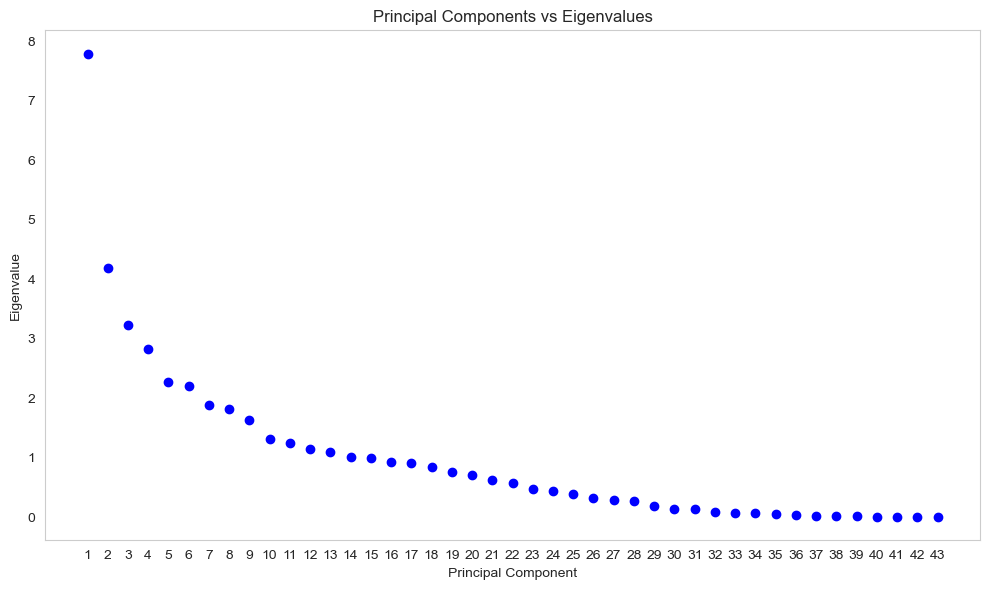

In [189]:
# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Create an array for the component indices
component_indices = np.arange(1, len(eigenvalues) + 1)

# Scatter plot of principal components and eigenvalues
plt.figure(figsize=(10, 6))
plt.scatter(component_indices, eigenvalues, color='b', marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Principal Components vs Eigenvalues')
plt.xticks(component_indices)
plt.grid()
plt.tight_layout()
plt.show()

- **La règle de 80%**:
  - Garder le nombre de composantes principales nécessaires pour expliquer 80% de la variabilité globale.
    - Dans ce cas on conservera les **15** premières composantes principales.
- **La règle de Kaiser** (_méthode non recommandée_):
  - On ne conserve que les composantes associées à une valeur propre supérieure ou égale à cette moyenne (i.e. >= 1).
    - Dans ce cas on conservera les **15** premières composantes principales.
- **La règle de Joliffe**:
  - On ne conserve que les composantes associées à une valeur propre supérieure ou égale à 0,70.
    - Dans ce cas on conservera les **20** premières composantes principales.
- **La règle de Cattell**:
  - _Cette règle est plus pragmatique_, dans le sens où elle nous demande de faire le graphique des paires (composantes principales, valeurs propres) et ensuite de ne garder que les valeurs propres qui précèdent le pied de l’éboulis.
    - Dans ce cas on conservera les **4** premières composantes principales car le changement de pente s'effectue avec la 5ème composante.

## t-SNE & DBSCAN

In [190]:
# Visualize Fraud and Normal data

def tsne_plot(x, y):
    scaler = StandardScaler()
    X_s = scaler.fit_transform(x)
    X_t = TSNE(n_components=2, random_state=42).fit_transform(X_s)

    # plt.figure(figsize=(12, 8))
    # Create a scatter plot for "Normal" class (label 0) with red color
    plt.scatter(X_t[y == 0, 0], X_t[y == 0, 1], c='blue', label='Normal', linewidths=2)
    # Create a scatter plot for "Fraud" class (label 1) with blue color
    plt.scatter(X_t[y == 1, 0], X_t[y == 1, 1], c='red', label='Fraud', linewidths=2)
    plt.title("t-SNE")
    plt.legend(loc='best');

def dbscan_plot(x):
    scaler = StandardScaler()
    X_s = scaler.fit_transform(x)
    dbscan = DBSCAN(eps=0.2, min_samples=15).fit(X_s)
    labels = dbscan.labels_
    classes = np.where(labels < 0, 1, 0)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    outliers = list(classes).count(1)
    normal = list(classes).count(0)
    print("Number of clusters formed = ", n_clusters)
    print("Anomaly points observed = ", outliers)
    print("Normal points observed = ", normal)

    # Create a scatter plot for "Normal" class (label 0) with red color
    plt.scatter(X_s[y == 0, 0], X_s[y == 0, 1], c='blue', label='Normal', linewidths=2)
    # Create a scatter plot for "Fraud" class (label 1) with blue color
    plt.scatter(X_s[y == 1, 0], X_s[y == 1, 1], c='red', label='Fraud', linewidths=2)
    plt.legend(loc='best')
    plt.title("DBSCAN Clustering");
    return classes

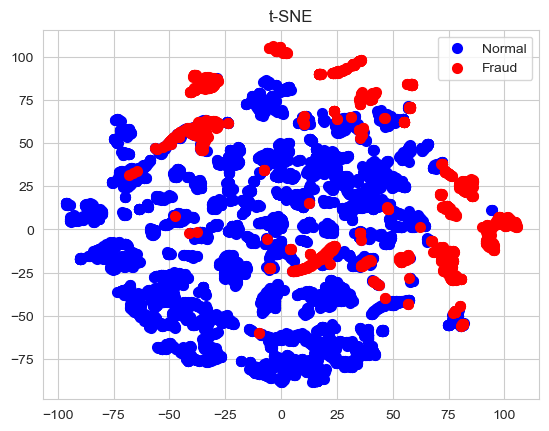

In [191]:
tsne_plot(X_orig, y_orig)

Number of clusters formed =  55
Anomaly points observed =  5577
Normal points observed =  4423


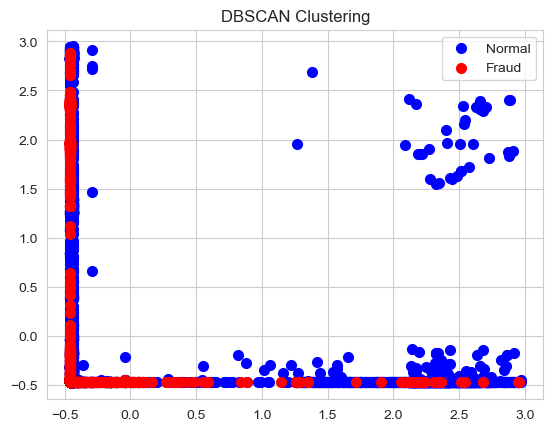

In [192]:
classes = dbscan_plot(X_orig)

## Autoencoder

In [202]:
# impute by median
df_selected = df_clean.copy() 
# df_selected = df_clean[important_features_RF+["Label"]].reset_index(drop=True)
# df_selected = df_clean[important_features_Tree+["Label"]].reset_index(drop=True)
df_selected.fillna(df_selected.median(), inplace = True)

X_original = df_selected.drop(['Label'], axis = 1)
y_original = df_selected["Label"]

In [203]:
# Split into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Split temp into validation (50%) and test (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [204]:
def draw_confusion_matrix(y, ypred):
    # Compute confusion matrix
    cm = confusion_matrix(y, ypred)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,
                xticklabels=["Normal", "Fraud"],
                yticklabels=["Normal", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [205]:
def plot_roc(y_test, pred):
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # Calculate the pseudo AUC score
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,6))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.title("ROC curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

In [206]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

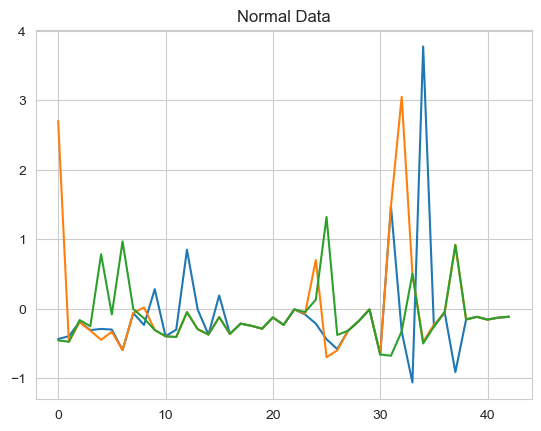

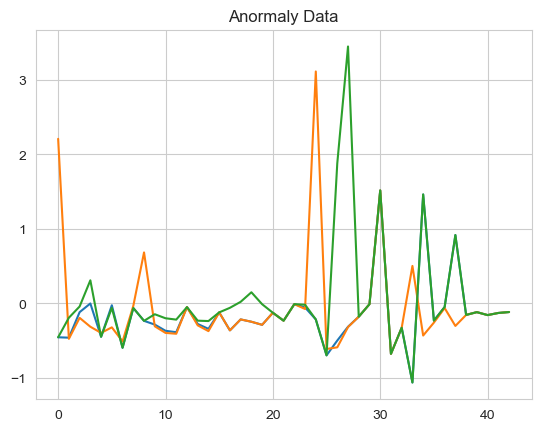

In [207]:
# Separate Anomaly and Normal data


# Separate scaled data into anomaly and normal data for training set
anomaly_indices_train = np.where(y_train == 1)[0]
normal_indices_train = np.where(y_train == 0)[0]

anomaly_data_train = X_train_scaled[anomaly_indices_train]
normal_data_train = X_train_scaled[normal_indices_train]

plt.plot(normal_data_train[0])
plt.plot(normal_data_train[1])
plt.plot(normal_data_train[2])
plt.title("Normal Data")
plt.show()

plt.plot(anomaly_data_train[0])
plt.plot(anomaly_data_train[1])
plt.plot(anomaly_data_train[2])
plt.title("Anormaly Data");

In [208]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.BatchNormalization()
              ])
    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(X_train.shape[1], activation="linear")
              ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [209]:
# Compile and train the Model

model = AutoEncoder()

batch_size = 128
epochs = 500
patience = 20
loss='mean_squared_error'
metrics=['mse','accuracy']

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=patience, mode="min")

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mae")

history = model.fit(X_train_scaled[np.where(y_train==0)[0]], X_train_scaled[np.where(y_train==0)[0]], 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, X_valid_scaled),
                    verbose=2,
                    shuffle=True,
                    callbacks=[early_stopping]
                    )

Epoch 1/500
52/52 - 3s - loss: 0.5711 - val_loss: 0.3997 - 3s/epoch - 57ms/step
Epoch 2/500
52/52 - 0s - loss: 0.3588 - val_loss: 0.3493 - 148ms/epoch - 3ms/step
Epoch 3/500
52/52 - 0s - loss: 0.2885 - val_loss: 0.3196 - 133ms/epoch - 3ms/step
Epoch 4/500
52/52 - 0s - loss: 0.2602 - val_loss: 0.2970 - 143ms/epoch - 3ms/step
Epoch 5/500
52/52 - 0s - loss: 0.2404 - val_loss: 0.2694 - 130ms/epoch - 3ms/step
Epoch 6/500
52/52 - 0s - loss: 0.2204 - val_loss: 0.2479 - 128ms/epoch - 2ms/step
Epoch 7/500
52/52 - 0s - loss: 0.2094 - val_loss: 0.2350 - 137ms/epoch - 3ms/step
Epoch 8/500
52/52 - 0s - loss: 0.2033 - val_loss: 0.2277 - 134ms/epoch - 3ms/step
Epoch 9/500
52/52 - 0s - loss: 0.1984 - val_loss: 0.2232 - 122ms/epoch - 2ms/step
Epoch 10/500
52/52 - 0s - loss: 0.1960 - val_loss: 0.2187 - 129ms/epoch - 2ms/step
Epoch 11/500
52/52 - 0s - loss: 0.1911 - val_loss: 0.2183 - 127ms/epoch - 2ms/step
Epoch 12/500
52/52 - 0s - loss: 0.1915 - val_loss: 0.2140 - 130ms/epoch - 2ms/step
Epoch 13/500
52

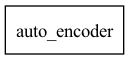

In [210]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

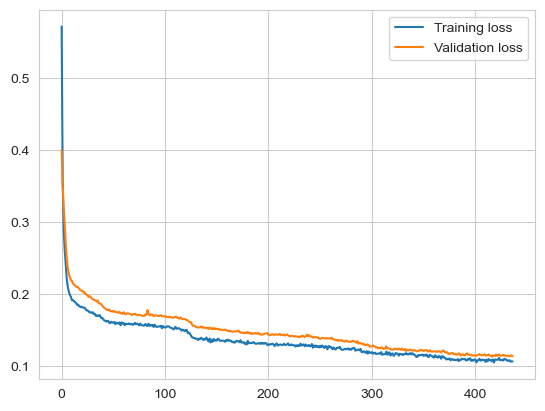

In [211]:
# plot loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [212]:
# Model evaluation

loss = model.evaluate(X_valid_scaled, X_valid_scaled, batch_size=120)
print("Validation Loss:", loss,"\n")

9/9 [==============================] - 0s 2ms/step - loss: 0.1136
Validation Loss: 0.11356611549854279 



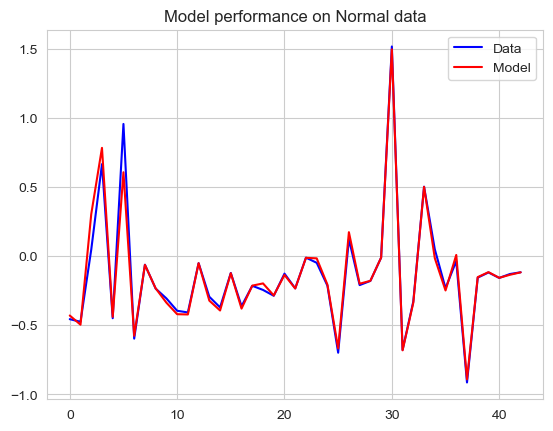

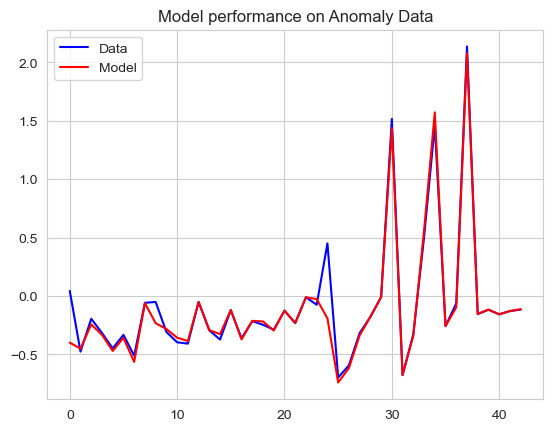

In [213]:
# Model evaluation

encoder_out = model.encoder(X_valid_scaled[np.where(y_valid == 0)[0]]) #8 unit representation of data
decoder_out = model.decoder(encoder_out).numpy()

plt.plot(X_valid_scaled[np.where(y_valid == 0)[0]][0], 'b', label='Data')
plt.plot(decoder_out[0], 'r', label='Model')
plt.title("Model performance on Normal data")
plt.legend(loc='best')
plt.show()


encoder_out_a = model.encoder(X_valid_scaled[np.where(y_valid == 1)[0]]) #8 unit representation of data
decoder_out_a = model.decoder(encoder_out_a).numpy()
plt.plot(X_valid_scaled[np.where(y_valid == 1)[0]][0], 'b', label='Data')
plt.plot(decoder_out_a[0], 'r', label='Model')
plt.title("Model performance on Anomaly Data")
plt.legend(loc='best');

32/32 [==============================] - 0s 1ms/step - loss: 0.1173

Test Loss: 0.11725444346666336

The prediction loss threshold for 2% of outliers is : 0.80

Data points with values that are greater than the threshold are consider as outliers.

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       836
           1       0.60      0.04      0.07       164

    accuracy                           0.84      1000
   macro avg       0.72      0.52      0.49      1000
weighted avg       0.80      0.84      0.77      1000


RUC_AUC :  0.5159003384292217



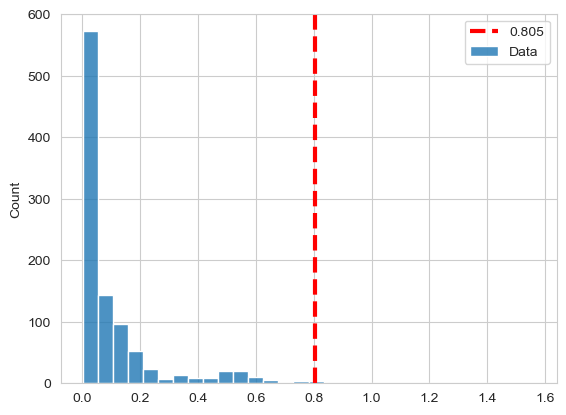

In [214]:
# Model prediction

# predict anomalies in the test set
pred_test = model.predict(X_test_scaled)

# Evaluate the model on validation data
loss = model.evaluate(X_test_scaled, X_test_scaled)
print("\nTest Loss:", loss)

# Get the mean absolute error between the actual and the reconstruction/prediction
pred_test_loss = tf.keras.losses.mae(pred_test, X_test_scaled)

# Check the prediction loss threshold for 2% of outliers
threshold = 99
loss_threshold = np.percentile(pred_test_loss, threshold)
print(f"\nThe prediction loss threshold for 2% of outliers is : {loss_threshold:.2f}\n")
print("Data points with values that are greater than the threshold are consider as outliers.\n")

# Check the model performance at 2% threshold
threshold_prediction = [0 if i < loss_threshold else 1 for i in pred_test_loss]

# Check the prediction performance on test data
print(classification_report(y_test, threshold_prediction ))
print()
print('RUC_AUC : ',roc_auc_score(y_test, threshold_prediction))
print()

# Visualize the threshold
sns.histplot(pred_test_loss, bins=30, alpha=0.8, label='Data')
plt.axvline(loss_threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(loss_threshold))
plt.legend(loc='best');

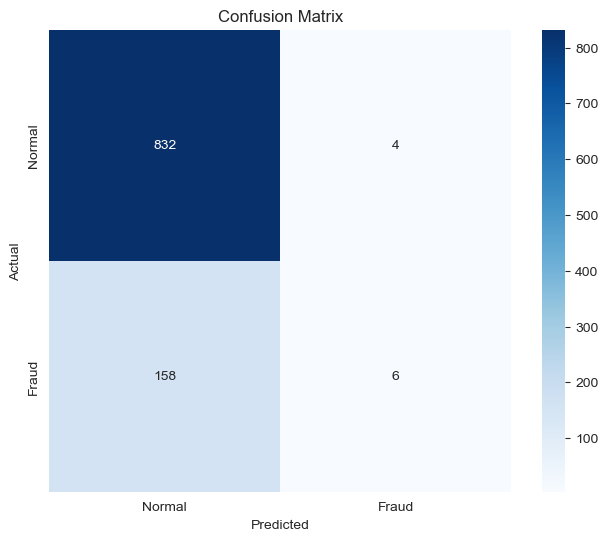

In [215]:
draw_confusion_matrix(y_test, threshold_prediction)

In [221]:
# Create a DataFrame with original data and anomaly indicator column
data_test_with_anomaly =  pd.DataFrame(X_test_array, columns=X_test.columns)
data_test_with_anomaly['Is_Anomaly'] = np.any(is_anomaly, axis=1)
data_test_with_anomaly.head()

Destination Port  Flow Duration  Total Length of Fwd Packets  \
0           58838.0          990.0                          0.0   
1              53.0          161.0                         66.0   
2              53.0       120100.0                         47.0   
3           59450.0           19.0                          0.0   
4              80.0    115895469.0                       1424.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                    0.0                    0.0                    0.00   
1                   33.0                   33.0                   33.00   
2                   47.0                   47.0                   47.00   
3                    0.0                    0.0                    0.00   
4                  490.0                    0.0                   64.75   

   Bwd Packet Length Min  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  ...  \
0                    0.0  0.000000e+00     2020.202000   9.900000e+02  ...   
1                   61.0  1.167702e+06    24844.720000   5.366667e+01  ...   
2                  196.0  2.023314e+03       16.652790   1.201000e+05  ...   
3                    0.0  0.000000e+00   105263.160000   1.900000e+01  ...   
4                    0.0  1.073467e+02        0.353767   2.897387e+06  ...   

   Init_Win_bytes_forward  Init_Win_bytes_backward  act_data_pkt_fwd  \
0                   353.0                  32832.0               0.0   
1                    -1.0                     -1.0               1.0   
2                    -1.0                     -1.0               0.0   
3                   905.0                    229.0               0.0   
4                 29200.0                    290.0               3.0   

   min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                  32.0        0.000        0.00         0.0         0.0   
1                  20.0        0.000        0.00         0.0         0.0   
2                  20.0        0.000        0.00         0.0         0.0   
3                  32.0        0.000        0.00         0.0         0.0   
4                  32.0    35849.453    42267.03    163289.0     22964.0   

    Idle Std  Is_Anomaly  
0      0.000        True  
1      0.000       False  
2      0.000        True  
3      0.000        True  
4  19531.764        True  

[5 rows x 44 columns]

In [222]:
data_test_with_anomaly['Is_Anomaly'] = data_test_with_anomaly['Is_Anomaly'].replace(False, 0)
data_test_with_anomaly['Is_Anomaly'] = data_test_with_anomaly['Is_Anomaly'].replace(True, 1)

In [223]:
data_test_with_anomaly.head()

Destination Port  Flow Duration  Total Length of Fwd Packets  \
0           58838.0          990.0                          0.0   
1              53.0          161.0                         66.0   
2              53.0       120100.0                         47.0   
3           59450.0           19.0                          0.0   
4              80.0    115895469.0                       1424.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                    0.0                    0.0                    0.00   
1                   33.0                   33.0                   33.00   
2                   47.0                   47.0                   47.00   
3                    0.0                    0.0                    0.00   
4                  490.0                    0.0                   64.75   

   Bwd Packet Length Min  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  ...  \
0                    0.0  0.000000e+00     2020.202000   9.900000e+02  ...   
1                   61.0  1.167702e+06    24844.720000   5.366667e+01  ...   
2                  196.0  2.023314e+03       16.652790   1.201000e+05  ...   
3                    0.0  0.000000e+00   105263.160000   1.900000e+01  ...   
4                    0.0  1.073467e+02        0.353767   2.897387e+06  ...   

   Init_Win_bytes_forward  Init_Win_bytes_backward  act_data_pkt_fwd  \
0                   353.0                  32832.0               0.0   
1                    -1.0                     -1.0               1.0   
2                    -1.0                     -1.0               0.0   
3                   905.0                    229.0               0.0   
4                 29200.0                    290.0               3.0   

   min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                  32.0        0.000        0.00         0.0         0.0   
1                  20.0        0.000        0.00         0.0         0.0   
2                  20.0        0.000        0.00         0.0         0.0   
3                  32.0        0.000        0.00         0.0         0.0   
4                  32.0    35849.453    42267.03    163289.0     22964.0   

    Idle Std  Is_Anomaly  
0      0.000           1  
1      0.000           0  
2      0.000           1  
3      0.000           1  
4  19531.764           1  

[5 rows x 44 columns]

In [224]:
test_error = np.sum(pd.DataFrame(data_test_with_anomaly['Is_Anomaly']).values != pd.DataFrame(y_test).values)/len(y_test)
test_error

0.797

27/27 [==============================] - 0s 1ms/step



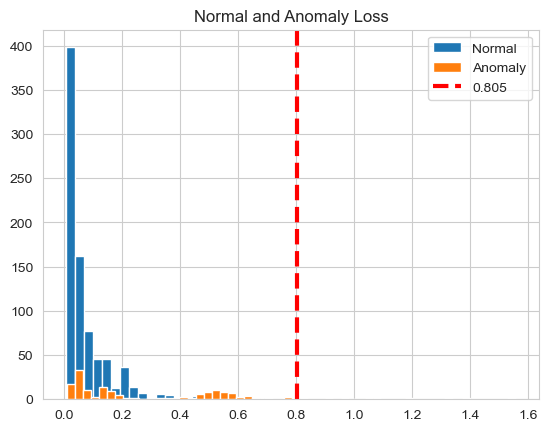

In [226]:
# Normal vs Anomaly on test

reconstruction_a = model.predict(X_test_scaled[np.where(y_test == 1)[0]])
train_loss_a = tf.keras.losses.mae(reconstruction_a, X_test_scaled[np.where(y_test == 1)[0]])

reconstruction = model.predict(X_test_scaled[np.where(y_test == 0)[0]])
train_loss_n = tf.keras.losses.mae(reconstruction, X_test_scaled[np.where(y_test == 0)[0]])

print()
plt.hist(train_loss_n, bins=50, label='Normal')
plt.hist(train_loss_a, bins=50, label='Anomaly')
plt.axvline(loss_threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(loss_threshold))
plt.legend(loc='best')
plt.title("Normal and Anomaly Loss");

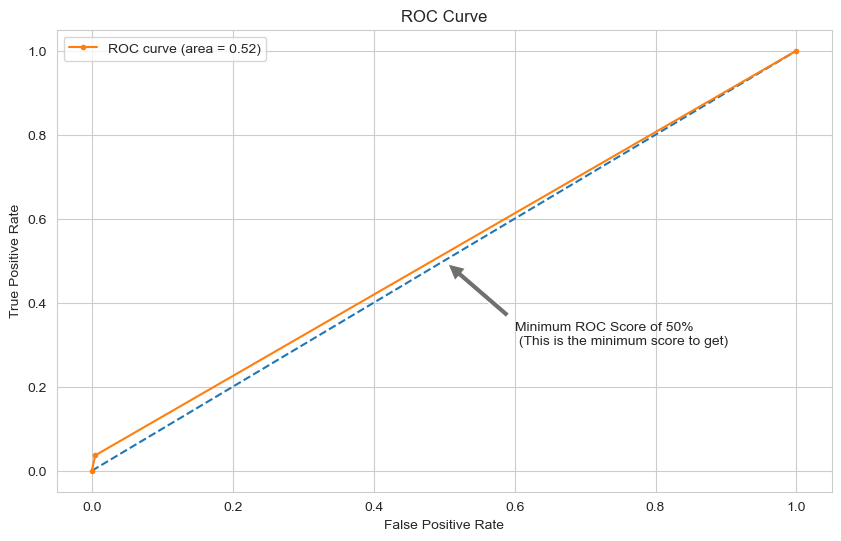

In [227]:
plot_roc(y_test, threshold_prediction)

## Splitting with mixed data

In [228]:
# impute by median
df_select = df_clean.copy() 
# df_selected = df_clean[important_features_RF+["Label"]].reset_index(drop=True)
# df_selected = df_clean[important_features_Tree+["Label"]].reset_index(drop=True)
# df_selected.fillna(df_selected.median(), inplace = True)

X_orig = df_selected.drop(['Label'], axis = 1)
y_orig = df_selected["Label"]

In [229]:
# Split into train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

# Split temp into validation (50%) and test (50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [230]:
class ImputerSimple(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="median")
        X = imputer.fit_transform(X)
        return X

In [231]:
imp = ImputerSimple()

# Perform median imputation on the training set
X_train_imputed = pd.DataFrame(imp.transform(X_train), columns=X_train.columns)

# Apply the same imputer on the validation and test sets
X_valid_imputed = pd.DataFrame(imp.transform(X_valid), columns=X_valid.columns)
X_test_imputed = pd.DataFrame(imp.transform(X_test), columns=X_test.columns)

In [232]:
def plot_roc(y_test, pred):
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # Calculate the pseudo AUC score
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,6))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.title("ROC curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

In [233]:
def ScaledModelTrainValid(scalerName):
    if scalerName == 'standard':
        scaler = StandardScaler()
    if scalerName == 'minmax':
        scaler = MinMaxScaler()
    if scalerName == 'robust':
        scaler = RobustScaler()

    pipelines = []

    pipelines.append((scalerName+'IF' , Pipeline([('Scaler', scaler),('IF' , IsolationForest())])))
    pipelines.append((scalerName+'LOF' , Pipeline([('Scaler', scaler),('LOF' , LocalOutlierFactor(novelty=True))])))
    pipelines.append((scalerName+'SVM' , Pipeline([('Scaler', scaler),('SVM' , OneClassSVM())])))
    return pipelines

In [234]:
def BasedLineTrainValid(x_train, x_val, y_val, models):
    # Test options and evaluation metric
    results = {}
    data_results = {}
    scores_pred = {}
    for clf_name, clf in models:
        if clf_name == "LOF":
            y_pred = clf.fit_predict(x_val)
            scores_prediction = clf.negative_outlier_factor_
        else:
            clf.fit(x_train)
            y_pred = clf.predict(x_val)
            scores_prediction = clf.decision_function(x_val)
        
        scores_prediction = np.where(scores_prediction < 0, 1, 0)
        y_pred = np.where(y_pred < 0, 1, 0)
        results[clf_name] = y_pred
        data_results[clf_name] = y_pred
        scores_pred[clf_name] = scores_prediction

    # Evaluate the performance of each algorithm
    for clf_name, y_pred in results.items():
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        er = np.sqrt(mean_squared_error(y_val, y_pred))
        n_errors = (y_pred != y_val).sum()
        
        print("Classifier name : Error made")
        print(f"{clf_name} : {n_errors}")
        print(f"RMSE made : {er:.2f}")
        print(classification_report(y_val,y_pred))
    return data_results, scores_pred

In [235]:
model = ScaledModelTrainValid("standard")
data_results, scores_pred = BasedLineTrainValid(X_train_imputed, X_valid_imputed, y_valid, model)

Classifier name : Error made
standardIF : 172
RMSE made : 0.41
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       850
           1       0.24      0.07      0.10       150

    accuracy                           0.83      1000
   macro avg       0.55      0.51      0.50      1000
weighted avg       0.76      0.83      0.78      1000

Classifier name : Error made
standardLOF : 286
RMSE made : 0.53
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       850
           1       0.12      0.14      0.13       150

    accuracy                           0.71      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.73      0.71      0.72      1000

Classifier name : Error made
standardSVM : 443
RMSE made : 0.67
              precision    recall  f1-score   support

           0       0.91      0.53      0.67       850
           1       0.21      0.70      0.32   

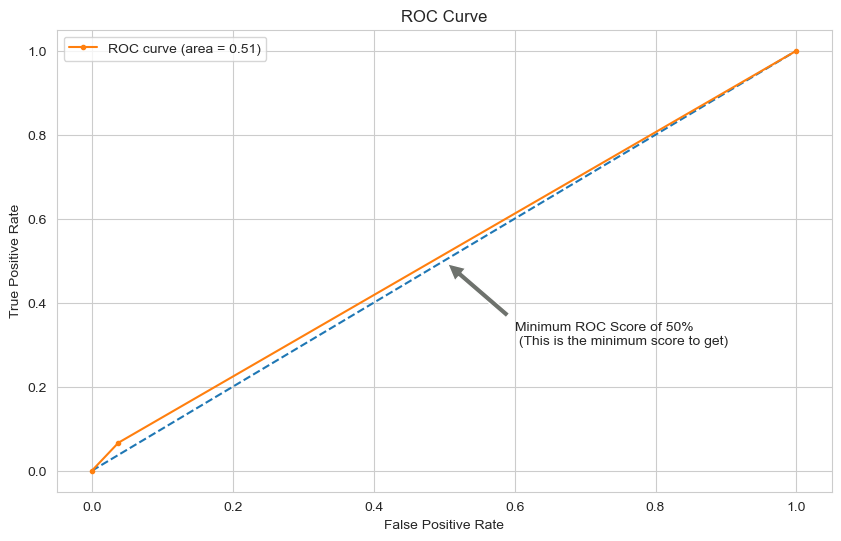

In [236]:
predIF = data_results.get('standardIF')
plot_roc(y_valid, predIF)

In [237]:
model = ScaledModelTrainValid("standard")
data_results, scores_pred = BasedLineTrainValid(X_train_imputed, X_test_imputed, y_test, model)

Classifier name : Error made
standardIF : 188
RMSE made : 0.43
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       836
           1       0.30      0.11      0.16       164

    accuracy                           0.81      1000
   macro avg       0.57      0.53      0.53      1000
weighted avg       0.76      0.81      0.77      1000

Classifier name : Error made
standardLOF : 297
RMSE made : 0.54
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       836
           1       0.12      0.12      0.12       164

    accuracy                           0.70      1000
   macro avg       0.47      0.47      0.47      1000
weighted avg       0.71      0.70      0.71      1000

Classifier name : Error made
standardSVM : 459
RMSE made : 0.68
              precision    recall  f1-score   support

           0       0.88      0.52      0.65       836
           1       0.21      0.65      0.32   

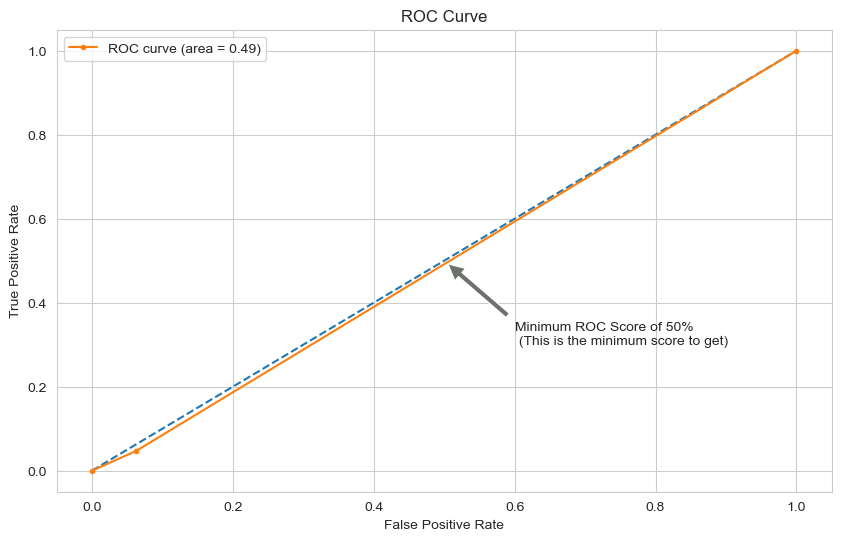

In [238]:
predIF = data_results.get('standardIF')
plot_roc(y_valid, predIF)

## Splitting Data

In [239]:
# Splitting the data by target class
important_df = df_clean[important_features_RF + ['Label']].reset_index()
# important_df = df_clean[important_features_Tree + ['Label']].reset_index()
df_0, df_1 = important_df[important_df['Label'] == 0], important_df[important_df['Label'] == 1]
# df_0, df_1 = df_clean[df_clean['Label'] == 0], df_clean[df_clean['Label'] == 1]

# Feature-target split
X_0, y_0 = df_0.drop('Label', axis = 1), df_0['Label']
X_1, y_1 = df_1.drop('Label', axis = 1), df_1['Label']

# Splitting the Normal class and constructing the training set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)
df_val_1, df_test_1 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Splitting the fraudulent class
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size = 0.5, random_state = 42)
df_val_2, df_test_2 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Merging data to construct the validation set and the test set
df_val, df_test = pd.concat([df_val_1, df_val_2], axis = 0), pd.concat([df_test_1, df_test_2], axis = 0)
X_val, y_val = df_val.drop('Label', axis = 1), df_val['Label']
X_test, y_test = df_test.drop('Label', axis = 1), df_test['Label']

In [240]:
# Distribution of Normal and fraudulent transactions over training, validation and test set
labels = ['Train', 'Validation', 'Test']
values_0 = [len(y_train[y_train == 0]), len(y_val[y_val == 0]), len(y_test[y_test == 0])]
values_1 = [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]

fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'domain'}, {'type': 'domain'}]])
fig.add_trace(go.Pie(values = values_0, labels = labels, hole = 0.5, textinfo = 'percent', title = "Normal"),
              row = 1, col = 1)
fig.add_trace(go.Pie(values = values_1, labels = labels, hole = 0.5, textinfo = 'percent', title = "Fraudulent"),
              row = 1, col = 2)
text_title = "Distribution of Normal and fraudulent transactions over training, validation and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

## Handling missing values

- **Mean**: It is preferred if data is numeric and not skewed.
- **Median**: It is preferred if data is numeric and skewed.
- **Mode**: It is preferred if the data is a string(object) or numeric.
- **Regressor**: Robust compare to the above imputation.

#### Imputation by median
- Simple to implement (Robust to outliers)
- Faster way to fill the missing values in the complete dataset 
- **Disadvantages**:
  - Change in the original variance
  - It impacts the Correlation

In [241]:
class ImputerSimple(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="median")
        X = imputer.fit_transform(X)
        return X

In [242]:
imp = ImputerSimple()

# Perform median imputation on the training set
X_train_imputed = pd.DataFrame(imp.transform(X_train), columns=X_train.columns)

# Apply the same imputer on the validation and test sets
X_val_imputed = pd.DataFrame(imp.transform(X_val), columns=X_val.columns)
X_test_imputed = pd.DataFrame(imp.transform(X_test), columns=X_test.columns)

#### Imputation by a regression 
- This is a big advantage over simpler imputation methods such as mean imputation or zero substitution because the relationships between X and Y (i.e. correlations, regression coefficients etc.) are preserved, since imputed values are based on regression models.
 - **Retains the original distribution**: Regression imputation retains the original distribution of the variable being imputed.
   - This is important because it preserves the variability and patterns in the data.
 - **Reduces bias**: Regression imputation can reduce bias in the imputed values.
   - By using a regression model that includes multiple predictors, regression imputation can adjust for confounding factors that may affect the missing values.
- **Disadvantages**:
  - Time-consuming
  - Can change rows numbers

In [243]:
class RegressorImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
        X = imputer.fit_transform(X)
        return X

# Model Training

### Data Normalization

> Normalize after spliting to avoid [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/) : when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.
- [Standardize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) | Normalize Contiuous Features ([MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) | [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) (it is less prone to outliers).

In [246]:
def plot_roc(y_test, pred):
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # Calculate the pseudo AUC score
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(16,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.title("ROC curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

In [247]:
class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """
        self.estimator = estimator

    def fit(self, X, y):
        self.estimator.fit(X, y)
        return self

    def predict(self, X):
        y_pred = np.where(self.estimator.predict(X) < 0, 1, 0)
        scores_pred = np.where(self.estimator.decision_function(X) < 0, 1, 0)
        return y_pred, scores_pred

    def fit_predict(self, X):
        y_pred = np.where(self.estimator.fit_predict(X) < 0, 1, 0)
        scores_pred = np.where(self.estimator.negative_outlier_factor_ < 0, 1, 0)
        return y_pred, scores_pred


In [248]:
class CombinedModel:
    def __init__(self):
        self.pipelines = []

    def add_pipeline(self, scaler_name, clf_name, clf, param_grid=None, n_iter=10):
        if scaler_name == 'standard':
            scaler = StandardScaler()
        elif scaler_name == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_name == 'robust':
            scaler = RobustScaler()
        else:
            raise ValueError(f"Scaler {scaler_name} not supported. Check your add_pipeline(sel,...) implementation!")

        if param_grid:
            clf = RandomizedSearchCV(clf, param_grid, n_iter=n_iter, scoring='precision', cv=5)
        pipeline = Pipeline([('Scaler', scaler), ('Classifier', clf)])
        self.pipelines.append((scaler_name + clf_name, pipeline))

    
    def fit(self, X, y):
        for _, pipeline in self.pipelines:
            pipeline.fit(X, y)

    def predict(self, X):
        results = {}
        decision_scores = {}
        for pipeline_name, pipeline in self.pipelines:
            clf_switcher = ClfSwitcher(pipeline)
            y_pred, scores = clf_switcher.predict(X)
            results[pipeline_name] = y_pred
            decision_scores[pipeline_name] = scores
        return results, decision_scores

    def fit_predict(self, X):
        results = {}
        scores_decision = {}
        for pipeline_name, pipeline in self.pipelines:
            clf_switcher = ClfSwitcher(pipeline)
            y_pred, scores = clf_switcher.predict(X)
            results[pipeline_name] = y_pred
            scores_decision[pipeline_name] = scores
        return results, scores_decision

In [249]:
# Create the combined model
combined_model12 = CombinedModel()
combined_model3 = CombinedModel()

# Parameter distributions for IsolationForest
param_grid_if = {
    'n_estimators': [100, 200, 300, 400],
    'max_samples': ['auto', 200, 300, 400],
    'contamination': [0.01, 0.02, 0.3, 0.4, 0.05],
}

# Parameter distributions for OneClassSVM
param_grid_svm = {
    'nu': [0.001, 0.01, 0.1, 0.5, 1],
    'gamma': [0.001, 0.01, 0.05, 0.1, 1 ],
}

# Example parameter distributions for LocalOutlierFactor
param_grid_lof = {
    'n_neighbors': [20, 30, 40, 50, 60],
    'contamination': [0.01, 0.03, 0.05, 0.07, 0.1],
}

# Add pipelines with different scalers and classifiers along with their parameter grids
combined_model12.add_pipeline('standard', 'IF', IsolationForest(), param_grid_if, n_iter=20)
combined_model12.add_pipeline('standard', 'SVM', OneClassSVM(), param_grid_svm, n_iter=20)

combined_model3.add_pipeline('standard', 'LOF', LocalOutlierFactor(novelty=True), param_grid_lof, n_iter=20)

In [250]:
# Fit and predict using the combined model
combined_model12.fit(X_train_imputed, y_train)
results, scores = combined_model12.predict(X_val_imputed)

# Calculate precision, recall, F1 score, and classification report for each pipeline
for pipeline_name, y_pred in results.items():
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    err = np.sqrt(mean_squared_error(y_val, y_pred))
    n_errors = (y_pred != y_val).sum()
    
    print(f"Pipeline : {pipeline_name}")
    print(f"Error made : {n_errors}")
    print(f"RMSE made : {err:.3f}")
    print(f"Precision : {precision:.3f}")
    print(f"Recall : {recall:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Classification Report:\n {report}")

Pipeline : standardIF
Error made : 566
RMSE made : 0.578
Precision : 0.744
Recall : 0.666
F1 Score : 0.641
Accuracy : 0.666
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.94      0.73       826
           1       0.88      0.40      0.55       869

    accuracy                           0.67      1695
   macro avg       0.74      0.67      0.64      1695
weighted avg       0.74      0.67      0.64      1695

Pipeline : standardSVM
Error made : 416
RMSE made : 0.495
Precision : 0.755
Recall : 0.755
F1 Score : 0.754
Accuracy : 0.755
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       826
           1       0.75      0.79      0.77       869

    accuracy                           0.75      1695
   macro avg       0.76      0.75      0.75      1695
weighted avg       0.76      0.75      0.75      1695



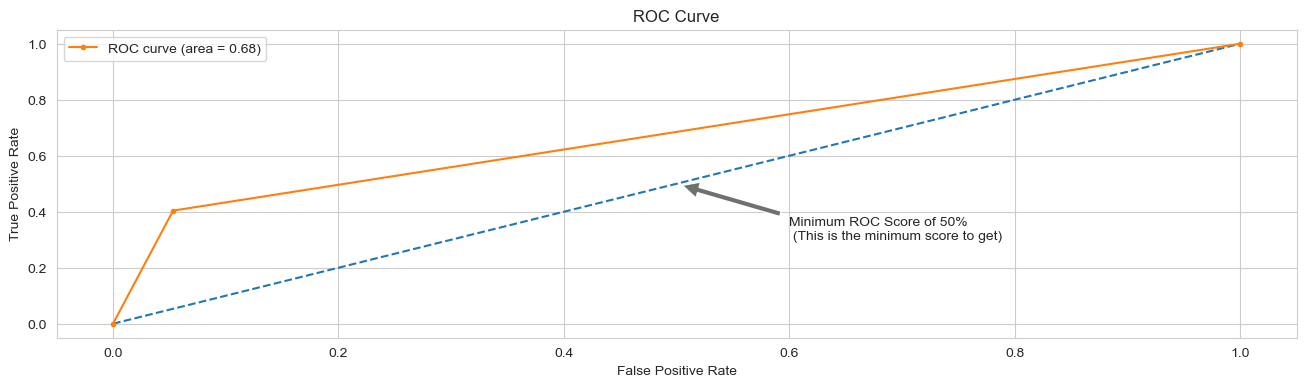

In [252]:
predIF = results.get('standardIF')
plot_roc(y_val, predIF)

In [253]:
# Fit and predict using the combined model
combined_model3.fit(X_train_imputed, y_train)
results, scores = combined_model3.fit_predict(X_val_imputed)

# Calculate precision, recall, F1 score, and classification report for each pipeline
for pipeline_name, y_pred in results.items():
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    err = np.sqrt(mean_squared_error(y_val, y_pred))
    n_errors = (y_pred != y_val).sum()
    
    print(f"Pipeline : {pipeline_name}")
    print(f"Error made : {n_errors}")
    print(f"RMSE made : {err:.3f}")
    print(f"Precision : {precision:.3f}")
    print(f"Recall : {recall:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Classification Report:\n {report}")

Pipeline : standardLOF
Error made : 328
RMSE made : 0.440
Precision : 0.826
Recall : 0.806
F1 Score : 0.804
Accuracy : 0.806
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       826
           1       0.91      0.69      0.79       869

    accuracy                           0.81      1695
   macro avg       0.82      0.81      0.80      1695
weighted avg       0.83      0.81      0.80      1695



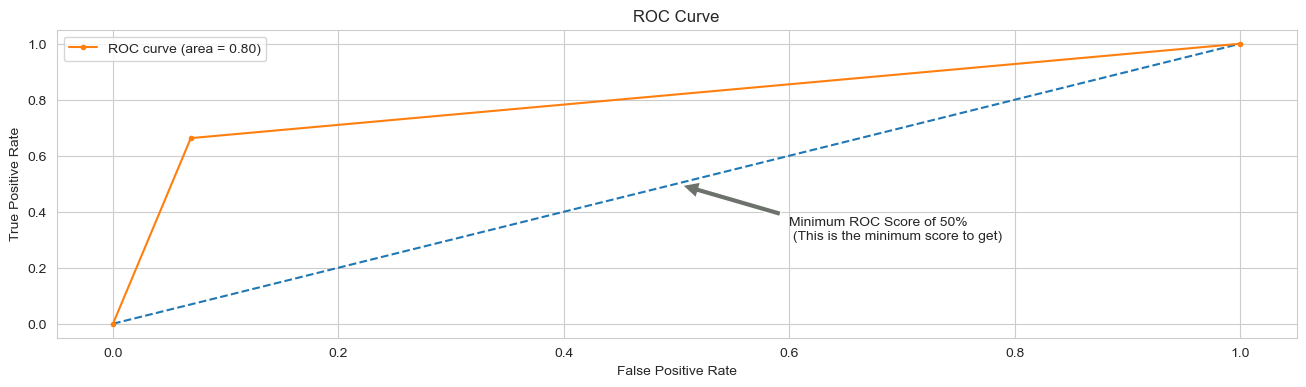

In [255]:
predIF = results.get('standardLOF')
plot_roc(y_val, predIF)

# Model Evaluation

In [257]:
# Fit and predict using the combined model
combined_model12.fit(X_test_imputed, y_test)
results, scores = combined_model12.predict(X_test_imputed)

# Calculate precision, recall, F1 score, and classification report for each pipeline
for pipeline_name, y_pred in results.items():
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    err = np.sqrt(mean_squared_error(y_test, y_pred))
    n_errors = (y_pred != y_test).sum()
    
    print(f"Pipeline : {pipeline_name}")
    print(f"Error made : {n_errors}")
    print(f"RMSE made : {err:.3f}")
    print(f"Precision : {precision:.3f}")
    print(f"Recall : {recall:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print(f"Classification Report:\n {report}")

Pipeline : standardIF
Error made : 904
RMSE made : 0.730
Precision : 0.383
Recall : 0.467
F1 Score : 0.334
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.93      0.63       827
           1       0.29      0.03      0.05       869

    accuracy                           0.47      1696
   macro avg       0.39      0.48      0.34      1696
weighted avg       0.38      0.47      0.33      1696

Pipeline : standardSVM
Error made : 974
RMSE made : 0.758
Precision : 0.419
Recall : 0.426
F1 Score : 0.405
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.61      0.51       827
           1       0.40      0.25      0.31       869

    accuracy                           0.43      1696
   macro avg       0.42      0.43      0.41      1696
weighted avg       0.42      0.43      0.41      1696



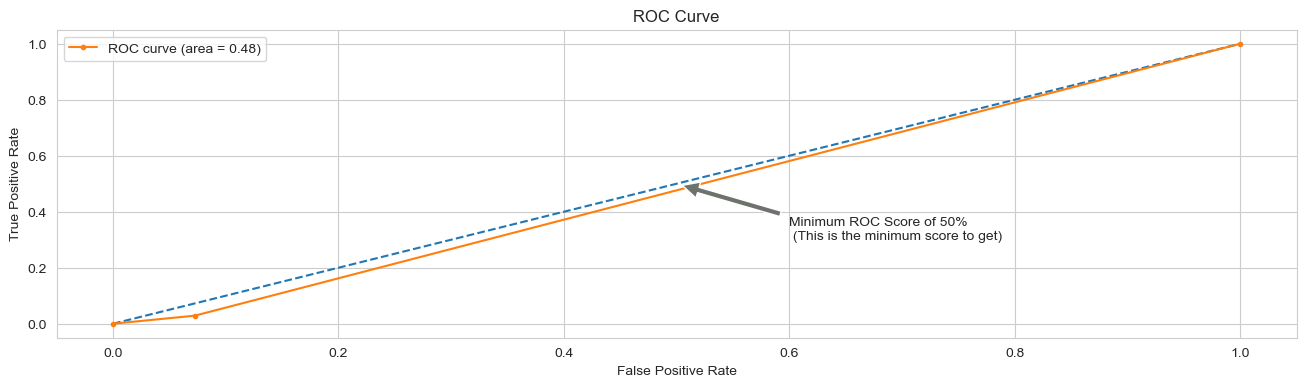

In [258]:
pred = scores.get('standardIF')
plot_roc(y_test, pred)

In [259]:
# Fit and predict using the combined model
combined_model3.fit(X_test_imputed, y_test)
results, scores = combined_model3.fit_predict(X_test_imputed)

# Calculate precision, recall, F1 score, and classification report for each pipeline
for pipeline_name, y_pred in results.items():
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    err = np.sqrt(mean_squared_error(y_test, y_pred))
    n_errors = (y_pred != y_test).sum()
    
    print(f"Pipeline : {pipeline_name}")
    print(f"Error made : {n_errors}")
    print(f"RMSE made : {err:.3f}")
    print(f"Precision : {precision:.3f}")
    print(f"Recall : {recall:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print(f"Classification Report:\n {report}")

Pipeline : standardLOF
Error made : 903
RMSE made : 0.730
Precision : 0.385
Recall : 0.468
F1 Score : 0.334
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.93      0.63       827
           1       0.30      0.03      0.05       869

    accuracy                           0.47      1696
   macro avg       0.39      0.48      0.34      1696
weighted avg       0.38      0.47      0.33      1696



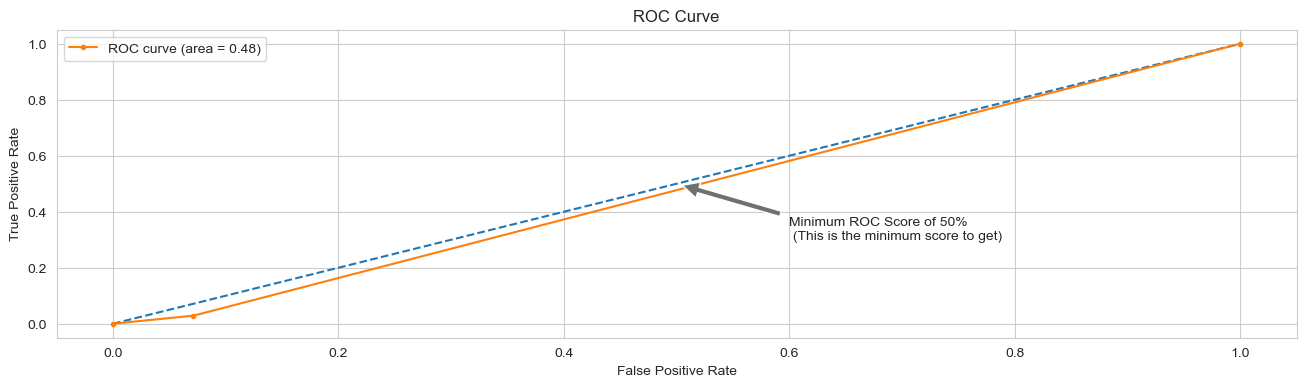

In [260]:
pred = scores.get('standardLOF')
plot_roc(y_test, pred)